# Análisis EVI y NDVI

## Dependencias

In [1]:
# Para el manejo de los datos
import pandas as pd
import numpy as np
import datetime

# Para maejar el S.O
import os

# Para la visualziación
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Lectura de los datos

Se leerán los datos de ambas métricas, para ambas localizaciones y para todas las especies. Estos datos se incluirán en un solo dataframe.

In [2]:
root = 'Material Sara Dennis' # Ruta raíz de los datos
metricas = ['EVI', 'NDVI']
localizaciones = ['DENTRO', 'FUERA']

In [3]:
# Dataframe en donde se incluirán todos los datos
df = pd.DataFrame()
# Se iteran las métricas
for metrica in metricas:
    # Se iteran los lugares
    for localizacion in localizaciones:
        # Se crea el path de la carpeta desde donde se intentarán leer 
        # los archivos de datos
        path = f'{root}/{metrica}/{metrica}-{localizacion}'
        # Se itera la carpeta y se leen los conjuntos de datos
        for f in os.listdir(path):
            # Se revisa si el objeto actual es un archivo (para no intentar)
            # leer carpetas
            path_dataset = f'{path}/{f}'
            if os.path.isfile(path_dataset):
                # Se obtiene el nombre de la especie en cuestión
                especie = f.split('.')[0]
                # Se lee el conjunto de datos y se añaden las columnas de
                # 'especie' y 'localizacion'
                df_tmp = pd.read_csv(path_dataset)
                df_tmp['especie'] = especie
                df_tmp['localizacion'] = localizacion
                df_tmp['metrica'] = metrica
                # Se concatenan los datos actuales en el DataFrame total
                df = df.append(df_tmp)

In [4]:
df

X            Y  18-feb.  5-mar.  21-mar.  6-abr.  22-abr.  \
0   675860.246  3265951.634   1715.0  1477.0   1731.0  1496.0   1516.0   
1   676300.806  3265951.634   1547.0  1506.0   1654.0  1480.0   1484.0   
2   676521.087  3262427.148   1543.0  1651.0   1749.0  1622.0   1506.0   
3   675419.685  3260444.625   1517.0  1178.0   1572.0  1508.0   1486.0   
4   675639.965  3260444.625   1531.0  1369.0   1669.0  1606.0   1536.0   
..         ...          ...      ...     ...      ...     ...      ...   
27  692158.117  3226767.581   3634.0  3468.0   3272.0  3052.0   2734.0   
28  692598.684  3226547.297   3016.0  3122.0   3063.0  2891.0   2623.0   
29  693039.250  3225886.447   2842.0  3045.0   2847.0  2872.0   2566.0   
30  688853.867  3223022.764   3157.0  3803.0   3577.0  3371.0   3453.0   
31  690616.133  3221921.347   3922.0  3935.0   3346.0  3280.0   3057.0   

    8-may.  24-may.  9-jun.  ...  29-sep..5  15-oct..5  31-oct..5  16-nov..5  \
0   1362.0   1508.0  1361.0  ...     2155.0     1973.0     1978.0     2020.0   
1   1352.0   1453.0  1478.0  ...     2749.0     2512.0     2409.0     2105.0   
2   1356.0   1518.0  1673.0  ...     2430.0     2090.0     2065.0     2012.0   
3   1556.0   1488.0  1657.0  ...     2486.0     2378.0     1922.0     2169.0   
4   1665.0   1632.0  1782.0  ...     2922.0     2759.0     2537.0     2653.0   
..     ...      ...     ...  ...        ...        ...        ...        ...   
27  2777.0   2629.0  3770.0  ...     5376.0     5035.0     4767.0     4536.0   
28  2623.0   2484.0  4249.0  ...     4764.0     4213.0     3847.0     3671.0   
29  2567.0   2461.0  2453.0  ...     4568.0     4042.0     3743.0     3693.0   
30  2926.0   3296.0  5553.0  ...     4904.0     4776.0     4399.0     4151.0   
31  3039.0   3386.0  5758.0  ...     4912.0     4395.0     4039.0     3924.0   

    2-dic..5  18-dic..5  01-ene.  especie  localizacion  metrica  
0     2000.0     1885.0   1819.0  ENCINAR        DENTRO      EVI  
1     2188.0     1991.0   2036.0  ENCINAR        DENTRO      EVI  
2     1829.0     2309.0   1826.0  ENCINAR        DENTRO      EVI  
3     2144.0     2147.0   1751.0  ENCINAR        DENTRO      EVI  
4     2369.0     2639.0   2296.0  ENCINAR        DENTRO      EVI  
..       ...        ...      ...      ...           ...      ...  
27    4437.0     4143.0   3930.0  VEGARRO         FUERA     NDVI  
28    3427.0     3652.0   3349.0  VEGARRO         FUERA     NDVI  
29    3587.0     3500.0   3228.0  VEGARRO         FUERA     NDVI  
30    4245.0     4250.0   4083.0  VEGARRO         FUERA     NDVI  
31    4129.0     3956.0   3578.0  VEGARRO         FUERA     NDVI  

[1092 rows x 486 columns]

###  Corrección del formato de las fechas

Se cambiará el formato de las fechas que aparece en el nombre de las columnas para utilizar el formato estándar de fechas. `(yyyy-mm-dd)` 

In [5]:
# Diccionario para mapear los meses de string a int
meses = {
    'ene':1,'feb':2,'mar':3,'abr':4,'may':5,'jun':6,
    'jul':7,'ago':8,'sep':9,'oct':10,'nov':11,'dic':12
}

In [6]:
# Año del inicio de las mediciones
anio = 2000
# Diccionario para almacenar las nuevas fechas
nuevas_cols = {}
# Bandera para indicar si ha comenzado un año nuevo
mes_anterior = 0
# Se iteran todas las columnas correspondientes a fechas
for fecha in df.columns[2:-3]:
    # Se obtiene el día y el mes
    dia = int(fecha.split('-')[0])
    mes = meses[fecha.split('.')[0].split('-')[1]]
    # Si el mes actual es enero, pero el mes anterior fue diciembre, entonces
    # acaba de iniciar un año nuevo y se actualiza
    if mes == 1 and mes_anterior == 12:
        anio += 1
    # Se actualiza la bandera del mes anterior
    mes_anterior = mes
    # La fecha tipo string se relaciona con la misma fecha pero en formato datetime
    nuevas_cols[fecha] = pd.to_datetime(datetime.datetime(anio, mes, dia).strftime('%Y-%m-%d'))

# Se renombran las columnas con las fechas en formato datetime
df = df.rename(columns=nuevas_cols)
df

X            Y  2000-02-18 00:00:00  2000-03-05 00:00:00  \
0   675860.246  3265951.634               1715.0               1477.0   
1   676300.806  3265951.634               1547.0               1506.0   
2   676521.087  3262427.148               1543.0               1651.0   
3   675419.685  3260444.625               1517.0               1178.0   
4   675639.965  3260444.625               1531.0               1369.0   
..         ...          ...                  ...                  ...   
27  692158.117  3226767.581               3634.0               3468.0   
28  692598.684  3226547.297               3016.0               3122.0   
29  693039.250  3225886.447               2842.0               3045.0   
30  688853.867  3223022.764               3157.0               3803.0   
31  690616.133  3221921.347               3922.0               3935.0   

    2000-03-21 00:00:00  2000-04-06 00:00:00  2000-04-22 00:00:00  \
0                1731.0               1496.0               1516.0   
1                1654.0               1480.0               1484.0   
2                1749.0               1622.0               1506.0   
3                1572.0               1508.0               1486.0   
4                1669.0               1606.0               1536.0   
..                  ...                  ...                  ...   
27               3272.0               3052.0               2734.0   
28               3063.0               2891.0               2623.0   
29               2847.0               2872.0               2566.0   
30               3577.0               3371.0               3453.0   
31               3346.0               3280.0               3057.0   

    2000-05-08 00:00:00  2000-05-24 00:00:00  2000-06-09 00:00:00  ...  \
0                1362.0               1508.0               1361.0  ...   
1                1352.0               1453.0               1478.0  ...   
2                1356.0               1518.0               1673.0  ...   
3                1556.0               1488.0               1657.0  ...   
4                1665.0               1632.0               1782.0  ...   
..                  ...                  ...                  ...  ...   
27               2777.0               2629.0               3770.0  ...   
28               2623.0               2484.0               4249.0  ...   
29               2567.0               2461.0               2453.0  ...   
30               2926.0               3296.0               5553.0  ...   
31               3039.0               3386.0               5758.0  ...   

    2020-09-29 00:00:00  2020-10-15 00:00:00  2020-10-31 00:00:00  \
0                2155.0               1973.0               1978.0   
1                2749.0               2512.0               2409.0   
2                2430.0               2090.0               2065.0   
3                2486.0               2378.0               1922.0   
4                2922.0               2759.0               2537.0   
..                  ...                  ...                  ...   
27               5376.0               5035.0               4767.0   
28               4764.0               4213.0               3847.0   
29               4568.0               4042.0               3743.0   
30               4904.0               4776.0               4399.0   
31               4912.0               4395.0               4039.0   

    2020-11-16 00:00:00  2020-12-02 00:00:00  2020-12-18 00:00:00  \
0                2020.0               2000.0               1885.0   
1                2105.0               2188.0               1991.0   
2                2012.0               1829.0               2309.0   
3                2169.0               2144.0               2147.0   
4                2653.0               2369.0               2639.0   
..                  ...                  ...                  ...   
27               4536.0               4437.0               4143.0   
28               3671.0              

### 'Tidyficación' de los datos

Un conjunto **Tidy** de datos es aquel en el que cada renglón corresponde a una observación única y cada columna corresponde a una variable única. Como podemos ver en los datos originales, la fecha debería ser una variable; sin embargo, los valores de esta variable se encuentra disperso a lo largo de 486 columnas. A continuación se corregirá este detalle.

In [7]:
df = df.melt(
    id_vars=['X','Y','especie','localizacion','metrica'],
    value_vars=df.columns[2:-3],
    var_name='fecha',
    value_name='valor'
)
df.fecha = pd.to_datetime(df.fecha)
df = df[['X','Y','fecha','especie','localizacion','metrica','valor']]

In [8]:
df

X            Y      fecha  especie localizacion metrica  \
0       675860.246  3265951.634 2000-02-18  ENCINAR       DENTRO     EVI   
1       676300.806  3265951.634 2000-02-18  ENCINAR       DENTRO     EVI   
2       676521.087  3262427.148 2000-02-18  ENCINAR       DENTRO     EVI   
3       675419.685  3260444.625 2000-02-18  ENCINAR       DENTRO     EVI   
4       675639.965  3260444.625 2000-02-18  ENCINAR       DENTRO     EVI   
...            ...          ...        ...      ...          ...     ...   
525247  692158.117  3226767.581 2021-01-01  VEGARRO        FUERA    NDVI   
525248  692598.684  3226547.297 2021-01-01  VEGARRO        FUERA    NDVI   
525249  693039.250  3225886.447 2021-01-01  VEGARRO        FUERA    NDVI   
525250  688853.867  3223022.764 2021-01-01  VEGARRO        FUERA    NDVI   
525251  690616.133  3221921.347 2021-01-01  VEGARRO        FUERA    NDVI   

         valor  
0       1715.0  
1       1547.0  
2       1543.0  
3       1517.0  
4       1531.0  
...        ...  
525247  3930.0  
525248  3349.0  
525249  3228.0  
525250  4083.0  
525251  3578.0  

[525252 rows x 7 columns]

## Análisis exploratorio

### Valores nulos

In [9]:
df.isnull().sum()

X               1924
Y               1924
fecha              0
especie            0
localizacion       0
metrica            0
valor            962
dtype: int64

In [10]:
print("Porcentaje de valores nulos por columna\n")
total_rows = len(df)
for c in df.columns:
    num_nans = df[c].isna().sum()
    print(f"{c}: {num_nans} -> ({str(num_nans/total_rows*100)[:5]}%)")

Porcentaje de valores nulos por columna

X: 1924 -> (0.366%)
Y: 1924 -> (0.366%)
fecha: 0 -> (0.0%)
especie: 0 -> (0.0%)
localizacion: 0 -> (0.0%)
metrica: 0 -> (0.0%)
valor: 962 -> (0.183%)


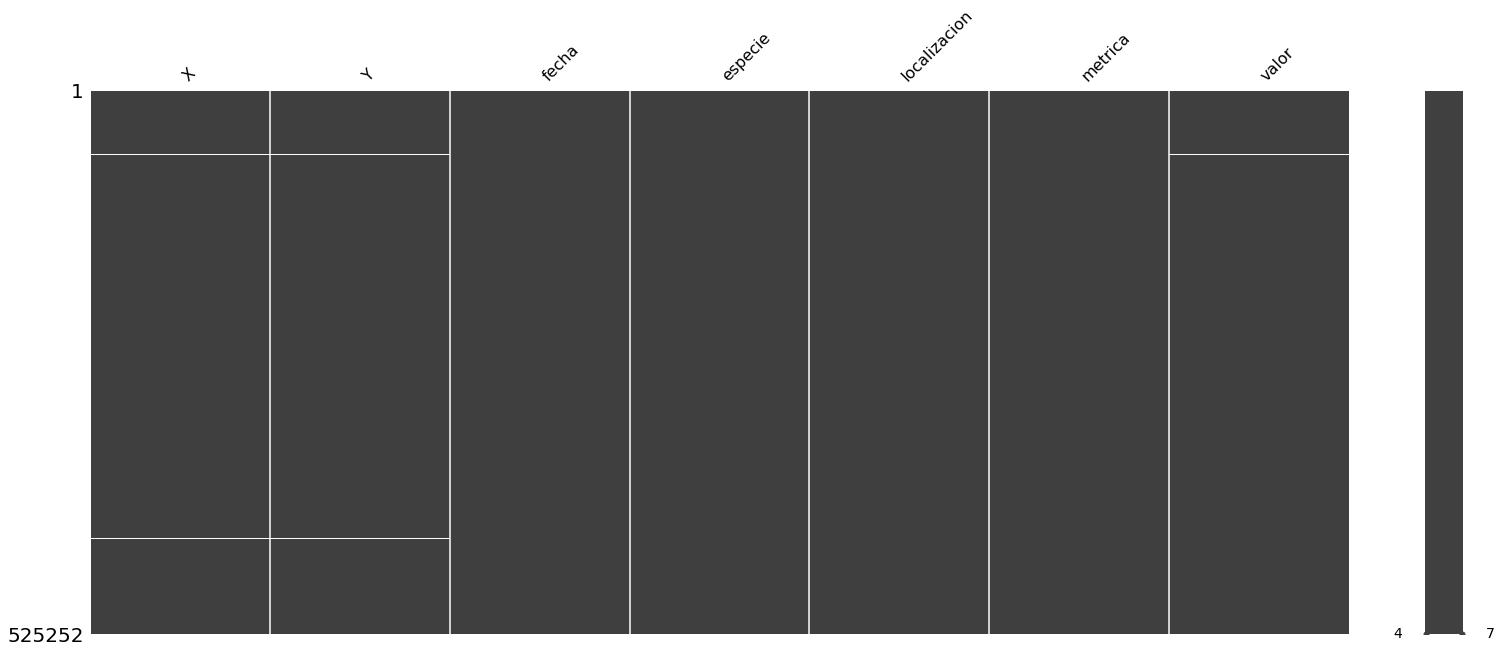

In [11]:
_ = msno.matrix(df)

In [12]:
renglones_con_nans = df.isnull().any(axis=1)
nans = df[renglones_con_nans]
nans

X   Y      fecha  especie localizacion metrica        valor
33     NaN NaN 2000-02-18  ENCINAR       DENTRO     EVI          NaN
34     NaN NaN 2000-02-18  ENCINAR       DENTRO     EVI  1603.696970
610    NaN NaN 2000-02-18   MATSUB       DENTRO    NDVI          NaN
611    NaN NaN 2000-02-18   MATSUB       DENTRO    NDVI  2694.967742
1125   NaN NaN 2000-03-05  ENCINAR       DENTRO     EVI          NaN
...     ..  ..        ...      ...          ...     ...          ...
523679 NaN NaN 2020-12-18   MATSUB       DENTRO    NDVI  3916.806452
524193 NaN NaN 2021-01-01  ENCINAR       DENTRO     EVI          NaN
524194 NaN NaN 2021-01-01  ENCINAR       DENTRO     EVI  2121.000000
524770 NaN NaN 2021-01-01   MATSUB       DENTRO    NDVI          NaN
524771 NaN NaN 2021-01-01   MATSUB       DENTRO    NDVI  3945.483871

[1924 rows x 7 columns]

In [13]:
nans.groupby(['especie','localizacion','metrica']).size()

especie  localizacion  metrica
ENCINAR  DENTRO        EVI        962
MATSUB   DENTRO        NDVI       962
dtype: int64

In [14]:
df = df[~renglones_con_nans].reset_index(drop=True)
df

X            Y      fecha  especie localizacion metrica  \
0       675860.246  3265951.634 2000-02-18  ENCINAR       DENTRO     EVI   
1       676300.806  3265951.634 2000-02-18  ENCINAR       DENTRO     EVI   
2       676521.087  3262427.148 2000-02-18  ENCINAR       DENTRO     EVI   
3       675419.685  3260444.625 2000-02-18  ENCINAR       DENTRO     EVI   
4       675639.965  3260444.625 2000-02-18  ENCINAR       DENTRO     EVI   
...            ...          ...        ...      ...          ...     ...   
523323  692158.117  3226767.581 2021-01-01  VEGARRO        FUERA    NDVI   
523324  692598.684  3226547.297 2021-01-01  VEGARRO        FUERA    NDVI   
523325  693039.250  3225886.447 2021-01-01  VEGARRO        FUERA    NDVI   
523326  688853.867  3223022.764 2021-01-01  VEGARRO        FUERA    NDVI   
523327  690616.133  3221921.347 2021-01-01  VEGARRO        FUERA    NDVI   

         valor  
0       1715.0  
1       1547.0  
2       1543.0  
3       1517.0  
4       1531.0  
...        ...  
523323  3930.0  
523324  3349.0  
523325  3228.0  
523326  4083.0  
523327  3578.0  

[523328 rows x 7 columns]

### Análisis de EVI y NDVI por especie y localización

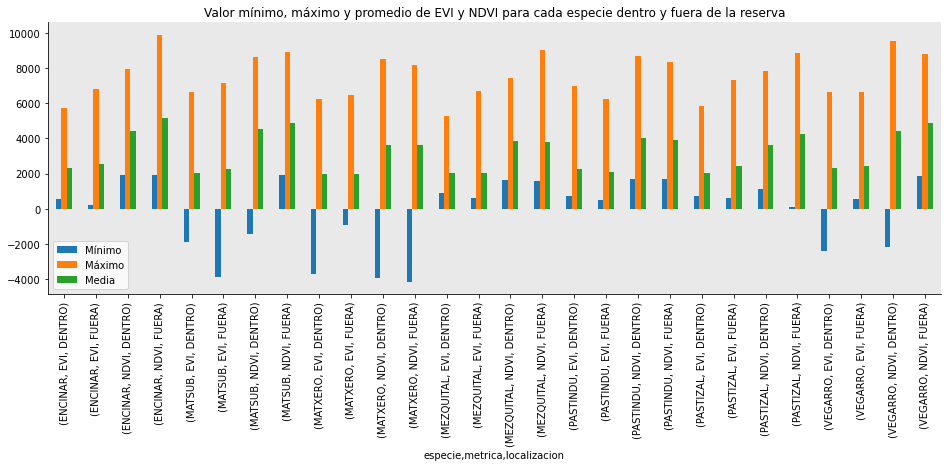

In [15]:
agrupacion = df.groupby(['especie', 'metrica', 'localizacion']).agg(Mínimo=('valor', 'min'),
                                                                    Máximo=('valor','max'),
                                                                    Media=('valor','mean')
                                                                   ).sort_values(by=['especie','metrica'])
plot = agrupacion.plot(kind='bar',
                figsize=(16,5),
                title='Valor mínimo, máximo y promedio de EVI y NDVI para cada especie dentro y fuera de la reserva',
                )
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.set_facecolor((200/255,200/255,200/255,.4))

Como podemos observar, existen valores negativos. Vamos a revisar estos registros

#### Revisión de valores anormales

In [16]:
df[df.valor < 0].sort_values(['especie','X','Y','fecha']).reset_index(drop=True)

X            Y      fecha  especie localizacion metrica   valor
0   677637.854  3265751.659 2001-06-26   MATSUB       DENTRO     EVI -1867.0
1   677637.854  3265751.659 2008-08-12   MATSUB       DENTRO     EVI -1422.0
2   677637.920  3265751.895 2001-06-26   MATSUB       DENTRO    NDVI -1445.0
3   677637.920  3265751.895 2008-08-12   MATSUB       DENTRO    NDVI -1081.0
4   689963.697  3248134.625 2008-07-11   MATSUB        FUERA     EVI -3875.0
5   680463.046  3253406.562 2011-08-13  MATXERO       DENTRO     EVI -1609.0
6   680463.046  3253626.843 2011-08-13  MATXERO       DENTRO     EVI -3653.0
7   680463.157  3253406.605 2011-08-13  MATXERO       DENTRO    NDVI -1031.0
8   680463.157  3253626.888 2011-08-13  MATXERO       DENTRO    NDVI -3885.0
9   680683.326  3253406.562 2011-08-13  MATXERO       DENTRO     EVI -3697.0
10  680683.326  3253626.843 2011-08-13  MATXERO       DENTRO     EVI   -79.0
11  680683.441  3253406.605 2011-08-13  MATXERO       DENTRO    NDVI -3947.0
12  690640.225  3249436.978 2006-07-28  MATXERO        FUERA     EVI  -900.0
13  690640.379  3249437.292 2006-07-28  MATXERO        FUERA    NDVI -4146.0
14  690860.505  3249436.978 2006-07-28  MATXERO        FUERA     EVI  -843.0
15  680493.519  3252952.981 2011-08-13  VEGARRO       DENTRO     EVI -2404.0
16  680493.610  3252953.053 2011-08-13  VEGARRO       DENTRO    NDVI -2152.0

* Los primeros dos registros corresponden exactamente al mismo pixel pero con una diferencia de 7 años, 1 mes y 17 días para el EVI.
* Los registros 2-3 corresponden exactamente al mismo pixel pero con una diferencia de 7 años, 1 mes y 17 días para el NDVI (Mismas fechas que en el caso anterior).
* Los registros 5-11 corresponden todos al matorral xerófilo dentro de la reserva el día 13 de agosto del 2011. Podemos notar que las coordenadas X e Y se repiten en varias filas y son muy similares entre ellas.
* Los registros 12-14 también corresponden al matorral xerófilo, pero fuera de la reserva y en una fecha diferente al caso anterior (28 de julio del 2006). También podemos observar que las coordenadas X e Y se parecen mucho, de hecho, las coordenadas Y en el registro 12 y en el 14 son exactamente las mismas.
* Los registros 15-16 corresponden a la vegetación de arroyo dentro de la reserva el día 13 de agosto del 2011 (Mismo día que en el caso del Matorral Xerófilo). Aquí también las coordenadas son muy parecidas. 

In [17]:
df[df.valor < 0].groupby(['especie', 'fecha','metrica']).size()

especie  fecha       metrica
MATSUB   2001-06-26  EVI        1
                     NDVI       1
         2008-07-11  EVI        1
         2008-08-12  EVI        1
                     NDVI       1
MATXERO  2006-07-28  EVI        2
                     NDVI       1
         2011-08-13  EVI        4
                     NDVI       3
VEGARRO  2011-08-13  EVI        1
                     NDVI       1
dtype: int64

A continuación, se reemplazarán los valores negativos con valores `NaN` para posteriormente intentar imputarlos y de esta forma no perder información

In [18]:
df[df.valor<0]

X            Y      fecha  especie localizacion metrica  \
33779   677637.854  3265751.659 2001-06-26   MATSUB       DENTRO     EVI   
34323   677637.920  3265751.895 2001-06-26   MATSUB       DENTRO    NDVI   
161376  690640.225  3249436.978 2006-07-28  MATXERO        FUERA     EVI   
161377  690860.505  3249436.978 2006-07-28  MATXERO        FUERA     EVI   
161920  690640.379  3249437.292 2006-07-28  MATXERO        FUERA    NDVI   
210266  689963.697  3248134.625 2008-07-11   MATSUB        FUERA     EVI   
212211  677637.854  3265751.659 2008-08-12   MATSUB       DENTRO     EVI   
212755  677637.920  3265751.895 2008-08-12   MATSUB       DENTRO    NDVI   
287330  680463.046  3253626.843 2011-08-13  MATXERO       DENTRO     EVI   
287331  680683.326  3253626.843 2011-08-13  MATXERO       DENTRO     EVI   
287334  680463.046  3253406.562 2011-08-13  MATXERO       DENTRO     EVI   
287335  680683.326  3253406.562 2011-08-13  MATXERO       DENTRO     EVI   
287441  680493.519  3252952.981 2011-08-13  VEGARRO       DENTRO     EVI   
287874  680463.157  3253626.888 2011-08-13  MATXERO       DENTRO    NDVI   
287878  680463.157  3253406.605 2011-08-13  MATXERO       DENTRO    NDVI   
287879  680683.441  3253406.605 2011-08-13  MATXERO       DENTRO    NDVI   
287985  680493.610  3252953.053 2011-08-13  VEGARRO       DENTRO    NDVI   

         valor  
33779  -1867.0  
34323  -1445.0  
161376  -900.0  
161377  -843.0  
161920 -4146.0  
210266 -3875.0  
212211 -1422.0  
212755 -1081.0  
287330 -3653.0  
287331   -79.0  
287334 -1609.0  
287335 -3697.0  
287441 -2404.0  
287874 -3885.0  
287878 -1031.0  
287879 -3947.0  
287985 -2152.0

In [19]:
valores_neg = df[df.valor<0].index
valores_neg

Int64Index([ 33779,  34323, 161376, 161377, 161920, 210266, 212211, 212755,
            287330, 287331, 287334, 287335, 287441, 287874, 287878, 287879,
            287985],
           dtype='int64')

In [20]:
df.iloc[valores_neg,6]=np.nan

In [21]:
df[df.valor.isnull()]

X            Y      fecha  especie localizacion metrica  \
33779   677637.854  3265751.659 2001-06-26   MATSUB       DENTRO     EVI   
34323   677637.920  3265751.895 2001-06-26   MATSUB       DENTRO    NDVI   
161376  690640.225  3249436.978 2006-07-28  MATXERO        FUERA     EVI   
161377  690860.505  3249436.978 2006-07-28  MATXERO        FUERA     EVI   
161920  690640.379  3249437.292 2006-07-28  MATXERO        FUERA    NDVI   
210266  689963.697  3248134.625 2008-07-11   MATSUB        FUERA     EVI   
212211  677637.854  3265751.659 2008-08-12   MATSUB       DENTRO     EVI   
212755  677637.920  3265751.895 2008-08-12   MATSUB       DENTRO    NDVI   
287330  680463.046  3253626.843 2011-08-13  MATXERO       DENTRO     EVI   
287331  680683.326  3253626.843 2011-08-13  MATXERO       DENTRO     EVI   
287334  680463.046  3253406.562 2011-08-13  MATXERO       DENTRO     EVI   
287335  680683.326  3253406.562 2011-08-13  MATXERO       DENTRO     EVI   
287441  680493.519  3252952.981 2011-08-13  VEGARRO       DENTRO     EVI   
287874  680463.157  3253626.888 2011-08-13  MATXERO       DENTRO    NDVI   
287878  680463.157  3253406.605 2011-08-13  MATXERO       DENTRO    NDVI   
287879  680683.441  3253406.605 2011-08-13  MATXERO       DENTRO    NDVI   
287985  680493.610  3252953.053 2011-08-13  VEGARRO       DENTRO    NDVI   

        valor  
33779     NaN  
34323     NaN  
161376    NaN  
161377    NaN  
161920    NaN  
210266    NaN  
212211    NaN  
212755    NaN  
287330    NaN  
287331    NaN  
287334    NaN  
287335    NaN  
287441    NaN  
287874    NaN  
287878    NaN  
287879    NaN  
287985    NaN

#### Valores máximos, mínimos y promedio de las métricas dentro y fuera de la reserva

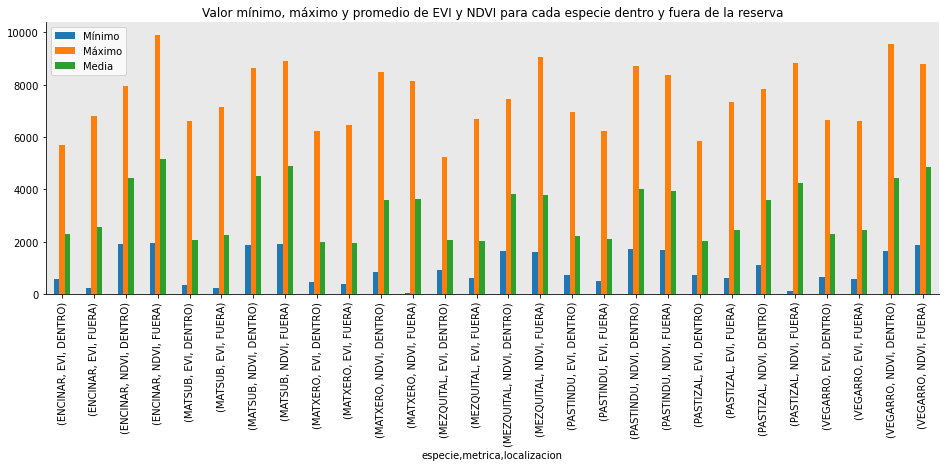

In [22]:
agrupacion = df.groupby(['especie', 'metrica', 'localizacion']).agg(Mínimo=('valor', 'min'),
                                                                    Máximo=('valor','max'),
                                                                    Media=('valor','mean')
                                                                   ).sort_values(by=['especie','metrica'])
plot = agrupacion.plot(kind='bar',
                figsize=(16,5),
                title='Valor mínimo, máximo y promedio de EVI y NDVI para cada especie dentro y fuera de la reserva',
                )
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.set_facecolor((200/255,200/255,200/255,.4))

##### Valores mínimos

In [23]:
# Agrupamos los datos por especie, métrica y localización. Posteriormente se calcula
# la función de agregación deseada en la columna "valor" por cada grupo
agrupacion = df.groupby(
                        ['especie', 'metrica', 'localizacion']
                        ).agg(
                              Mínimo=('valor', 'min')
                             )
# Se realiza la operación Unstack
agrupacion = agrupacion.unstack()
agrupacion

Mínimo        
localizacion       DENTRO   FUERA
especie   metrica                
ENCINAR   EVI       565.0   235.0
          NDVI     1932.0  1945.0
MATSUB    EVI       333.0   253.0
          NDVI     1863.0  1913.0
MATXERO   EVI       464.0   395.0
          NDVI      829.0    48.0
MEZQUITAL EVI       907.0   613.0
          NDVI     1660.0  1597.0
PASTINDU  EVI       733.0   490.0
          NDVI     1713.0  1704.0
PASTIZAL  EVI       735.0   627.0
          NDVI     1103.0   116.0
VEGARRO   EVI       666.0   579.0
          NDVI     1658.0  1867.0

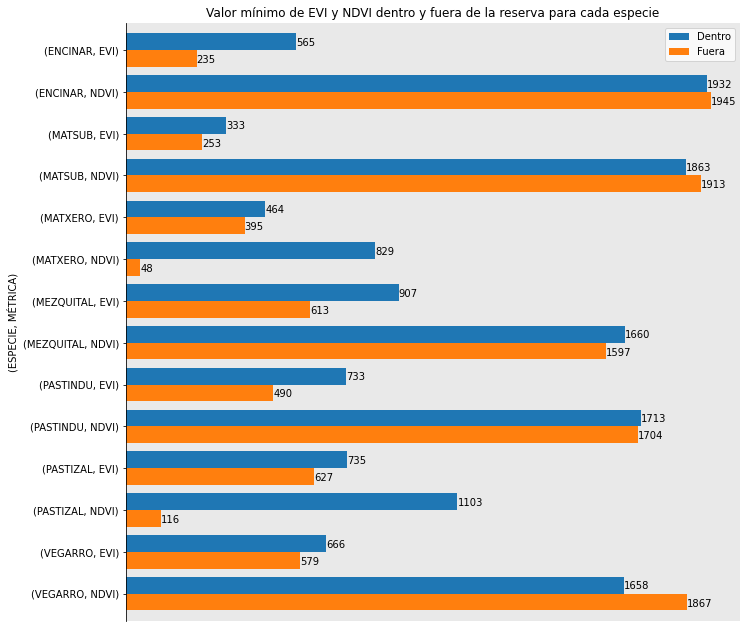

In [24]:
# Se crea una gráfica de barras agrupadas horizontal para cada grupo
plot = agrupacion.plot(kind='barh',
                figsize=(11,11),
                title='Valor mínimo de EVI y NDVI dentro y fuera de la reserva para cada especie',
                width=.8
                )

# Se esconden los márgenes de la imagen
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.spines['bottom'].set_visible(False)

# Se cambia el color de fondo de la imagen
plot.set_facecolor((200/255,200/255,200/255,.4))

# Se asignan las leyendas a la gráfica y el orden en el que aparecerán
plot.legend(['Dentro', 'Fuera'])
plt.gca().invert_yaxis()

# Se remueve el texto en el eje X
plot.set_xlabel("")
# Se asigna un texto en el eje Y
plot.set_ylabel("(ESPECIE, MÉTRICA)")
# Se esconden las marcas del eje x
plot.set_xticks([])

# Se añade el valor correspondiente a cada barra
for i in range(len(agrupacion)):    
    plt.text(agrupacion.iloc[i,1],i+.3,int(agrupacion.iloc[i,1]))
    plt.text(agrupacion.iloc[i,0],i-.11,int(agrupacion.iloc[i,0]))
    


_ = plt.show()

* Los valores mínimos de EVI dentro de la reserva siempre son más pequeños que los valores mínimos de NDVI dentro de la reserva.
* Los valores mínimos de EVI fuera de la reserva siempre son más pequeños que los valores mínimos de NDVI fuera de la reserva a excepción del Matorral Xerófilo y el Pastizal.
* EVI mínimo dentro de la reserva más grande que EVI mínimo fuera de la reserva: **SIEMPRE**
* NDVI mínimo dentro de la reserva más grande que NDVI mínimo fuera de la reserva
    * Matorral xerófilo (Por mucho)
    * Mezquital (Por poco)
    * Pastizal inducido (Casi iguales)
    * Pastizal (Por mucho)
* NDVI mínimo fuera de la reserva más grande que NDVI mínimo dentro de la reserva
    * Encinar (casi iguales)
    * Matorral subtropical (por poco)
    * Vegetación de arroyo

##### Valores máximos

In [25]:
# Agrupamos los datos por especie, métrica y localización. Posteriormente se calcula
# la función de agregación deseada en la columna "valor" por cada grupo
agrupacion = df.groupby(
                        ['especie', 'metrica', 'localizacion']
                        ).agg(
                              Máximo=('valor', 'max')
                             )
# Se realiza la operación Unstack
agrupacion = agrupacion.unstack()
agrupacion

Máximo        
localizacion       DENTRO   FUERA
especie   metrica                
ENCINAR   EVI      5702.0  6822.0
          NDVI     7951.0  9891.0
MATSUB    EVI      6625.0  7143.0
          NDVI     8626.0  8922.0
MATXERO   EVI      6228.0  6462.0
          NDVI     8485.0  8151.0
MEZQUITAL EVI      5248.0  6677.0
          NDVI     7444.0  9050.0
PASTINDU  EVI      6955.0  6227.0
          NDVI     8700.0  8361.0
PASTIZAL  EVI      5842.0  7342.0
          NDVI     7831.0  8834.0
VEGARRO   EVI      6654.0  6624.0
          NDVI     9553.0  8786.0

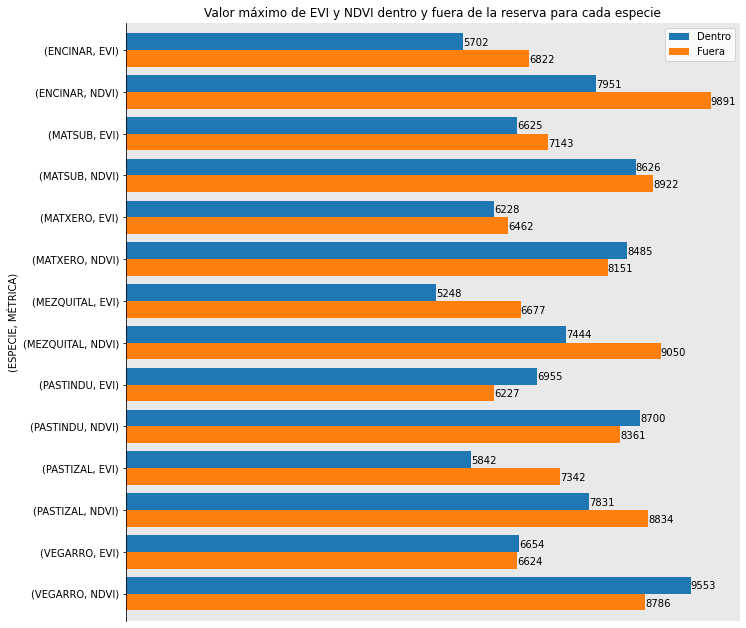

In [26]:
# Se crea una gráfica de barras agrupadas horizontal para cada grupo
plot = agrupacion.plot(kind='barh',
                figsize=(11,11),
                title='Valor máximo de EVI y NDVI dentro y fuera de la reserva para cada especie',
                width=.8
                )

# Se esconden los márgenes de la imagen
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.spines['bottom'].set_visible(False)

# Se cambia el color de fondo de la imagen
plot.set_facecolor((200/255,200/255,200/255,.4))

# Se asignan las leyendas a la gráfica y el orden en el que aparecerán
plot.legend(['Dentro', 'Fuera'])
plt.gca().invert_yaxis()

# Se remueve el texto en el eje X
plot.set_xlabel("")
# Se asigna un texto en el eje Y
plot.set_ylabel("(ESPECIE, MÉTRICA)")
# Se esconden las marcas del eje x
plot.set_xticks([])

# Se añade el valor correspondiente a cada barra
for i in range(len(agrupacion)):    
    plt.text(agrupacion.iloc[i,1],i+.3,int(agrupacion.iloc[i,1]))
    plt.text(agrupacion.iloc[i,0],i-.11,int(agrupacion.iloc[i,0]))
    


_ = plt.show()

* Los valores máximos de EVI dentro de la reserva siempre son más pequeños que los valores máximos de NDVI dentro de la reserva.
* Los valores máximos de EVI fuera de la reserva siempre son más pequeños que los valores máximos de NDVI fuera de la reserva.
* EVI máximo dentro de la reserva más grande que EVI máximo fuera de la reserva:
    * Pastizal inducido
    * Vegetación de arroyo (Casi iguales)
* EVI máximo dentro de la reserva más pequeño que EVI máximo fuera de la reserva:
    * Encinar
    * Matorral subtropical
    * Matorral xerófilo (por poco)
    * Mesquital
    * Pastizal
* NDVI máximo dentro de la reserva más grande que NDVI máximo fuera de la reserva:
    * Matorral xerófilo (por poco)
    * Pastizal inducido (por poco)
    * Vegetación de arroyo
* NDVI máximo dentro de la reserva más pequeño que NDVI máximo fuera de la reserva:
    * Encinar
    * Matorral subtropical (por poco)
    * Mezquital
    * Pastizal

##### Valor promedio

In [27]:
# Agrupamos los datos por especie, métrica y localización. Posteriormente se calcula
# la función de agregación deseada en la columna "valor" por cada grupo
agrupacion = df.groupby(
                        ['especie', 'metrica', 'localizacion']
                        ).agg(
                              promedio=('valor', 'mean')
                             )
# Se realiza la operación Unstack
agrupacion = agrupacion.unstack()
agrupacion

promedio             
localizacion            DENTRO        FUERA
especie   metrica                          
ENCINAR   EVI      2297.162414  2548.172072
          NDVI     4438.267939  5157.814900
MATSUB    EVI      2061.912804  2276.006982
          NDVI     4527.460058  4893.142644
MATXERO   EVI      1982.765323  1951.358900
          NDVI     3611.101144  3637.682125
MEZQUITAL EVI      2058.531532  2020.986417
          NDVI     3838.224532  3779.403049
PASTINDU  EVI      2238.802162  2118.055556
          NDVI     4036.965738  3937.301686
PASTIZAL  EVI      2043.795729  2440.374807
          NDVI     3612.558042  4236.539782
VEGARRO   EVI      2292.956337  2440.229665
          NDVI     4429.157325  4868.917814

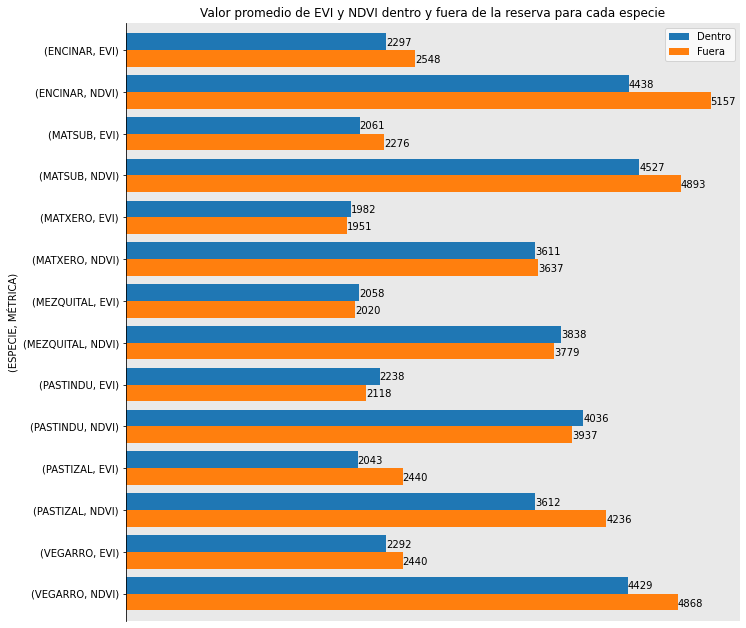

In [28]:
# Se crea una gráfica de barras agrupadas horizontal para cada grupo
plot = agrupacion.plot(kind='barh',
                figsize=(11,11),
                title='Valor promedio de EVI y NDVI dentro y fuera de la reserva para cada especie',
                width=.8
                )

# Se esconden los márgenes de la imagen
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.spines['bottom'].set_visible(False)

# Se cambia el color de fondo de la imagen
plot.set_facecolor((200/255,200/255,200/255,.4))

# Se asignan las leyendas a la gráfica y el orden en el que aparecerán
plot.legend(['Dentro', 'Fuera'])
plt.gca().invert_yaxis()

# Se remueve el texto en el eje X
plot.set_xlabel("")
# Se asigna un texto en el eje Y
plot.set_ylabel("(ESPECIE, MÉTRICA)")
# Se esconden las marcas del eje x
plot.set_xticks([])

# Se añade el valor correspondiente a cada barra
for i in range(len(agrupacion)):    
    plt.text(agrupacion.iloc[i,1],i+.3,int(agrupacion.iloc[i,1]))
    plt.text(agrupacion.iloc[i,0],i-.11,int(agrupacion.iloc[i,0]))
    


_ = plt.show()

* Los valores promedio de EVI dentro de la reserva siempre son más pequeños que los valores promedio de NDVI dentro de la reserva.
* Los valores promedio de EVI fuera de la reserva siempre son más pequeños que los valores promedio de NDVI fuera de la reserva.
* EVI promedio dentro de la reserva más grande que EVI promedio fuera de la reserva:
    * Matorral xerófilo (casi iguales)
    * Mezquital (casi iguales)
    * Pastizal inducido (por poco)
* EVI promedio dentro de la reserva más pequeño que EVI promedio fuera de la reserva:
    * Encinar
    * Matorral subtropical
    * Pastizal
    * Vegetación de arroyo
* NDVI promedio dentro de la reserva más grande que NDVI promedio fuera de la reserva:
    * Mezquital (por poco)
    * Pastizal inducido (por poco)
* NDVI promedio dentro de la reserva más pequeño que NDVI promedio fuera de la reserva:
    * Encinar
    * Matorral subtropical
    * Matorral xerófilo (casi iguales)
    * Pastizal
    * Vegetación de arroyo

### Análisis de la distribución de los datos

#### Distribución general de EVI y NDVI 

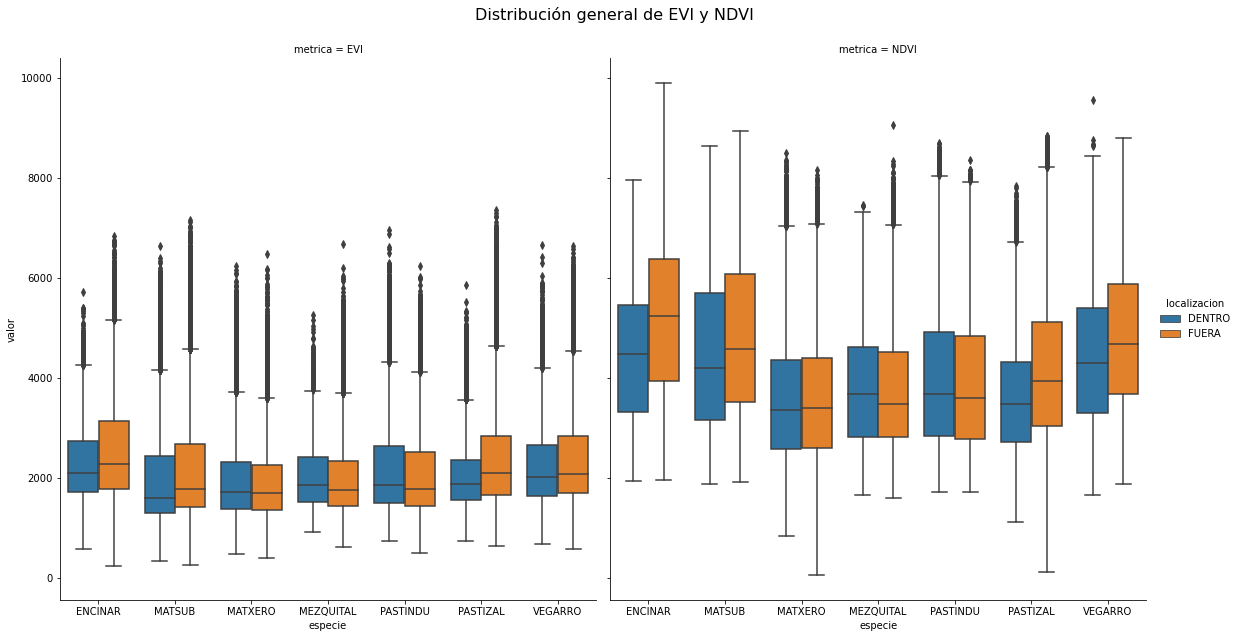

In [29]:
plot = sns.catplot(x="especie", y="valor",
                hue="localizacion", col="metrica",
                data=df, kind="box",
                height=9, aspect=.9)

# Se configura la posición y el texto del título
plot.fig.subplots_adjust(top=0.9)
_ = plot.fig.suptitle('Distribución general de EVI y NDVI', fontsize=16)


##### Análisis por medio de diagramas "Letter-Values"

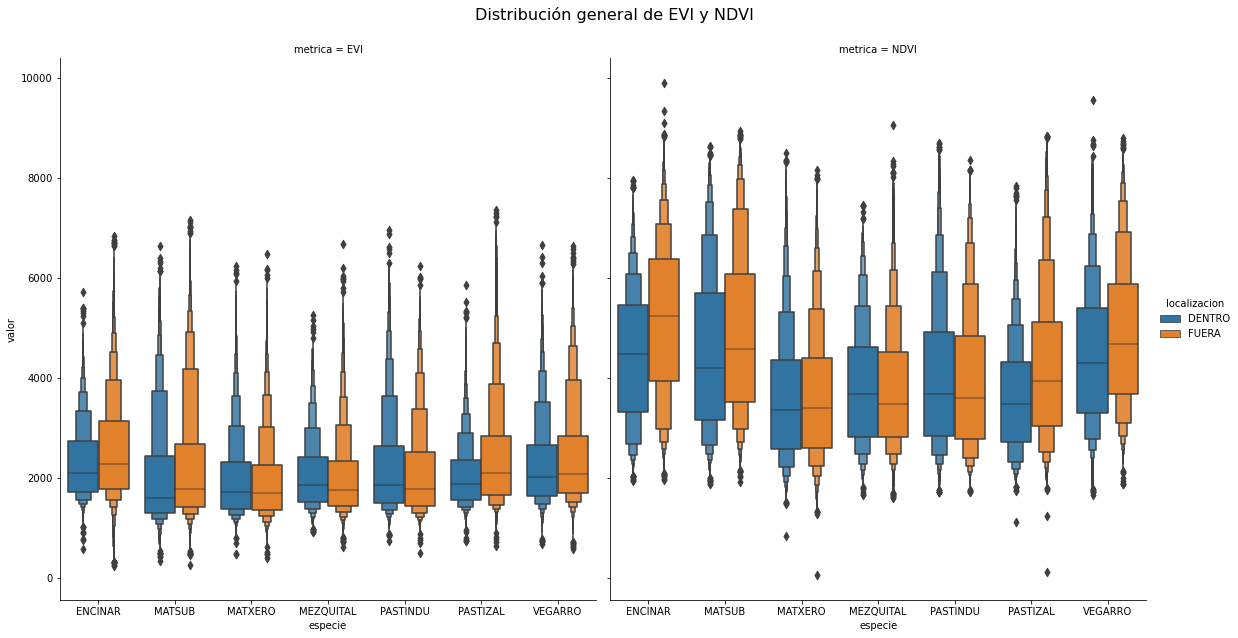

In [30]:
plot = sns.catplot(x="especie", y="valor",
                hue="localizacion", col="metrica",
                data=df, kind="boxen",
                height=9, aspect=.9)

# Se configura la posición y el texto del título
plot.fig.subplots_adjust(top=0.9)
_ = plot.fig.suptitle('Distribución general de EVI y NDVI', fontsize=16)

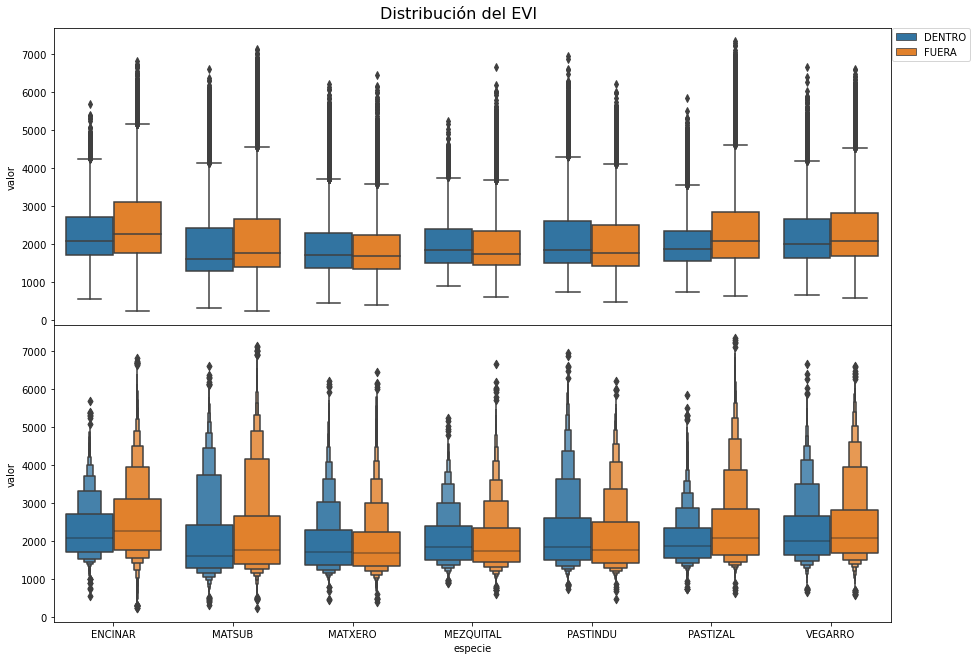

In [31]:
# Se crea una figura con 2 renglones y 1 columna
fig, axs = plt.subplots(2,1,figsize=(15, 10))
# Se configura el límite superior de la figura, el espacio entre los renglones
# y el texto del título
plt.subplots_adjust(top=.95, hspace=0)
fig.suptitle('Distribución del EVI', fontsize=16)

# Se grafican el boxplot y el boxenplot, cada uno en un renglón diferente
sns.boxplot(x="especie", y="valor", hue='localizacion',data=df[df.metrica=='EVI'], ax=axs[0])
sns.boxenplot(x="especie", y="valor", hue='localizacion',data=df[df.metrica=='EVI'], ax=axs[1])

# Se eliminan las etiquetas del primer renglón
axs[0].set_xticks([])
axs[0].set_xlabel('')

# Se configura la posición de la leyenda
axs[0].legend(bbox_to_anchor=(1.095, 1), loc=0, borderaxespad=0.)
_ = axs[1].get_legend().remove()

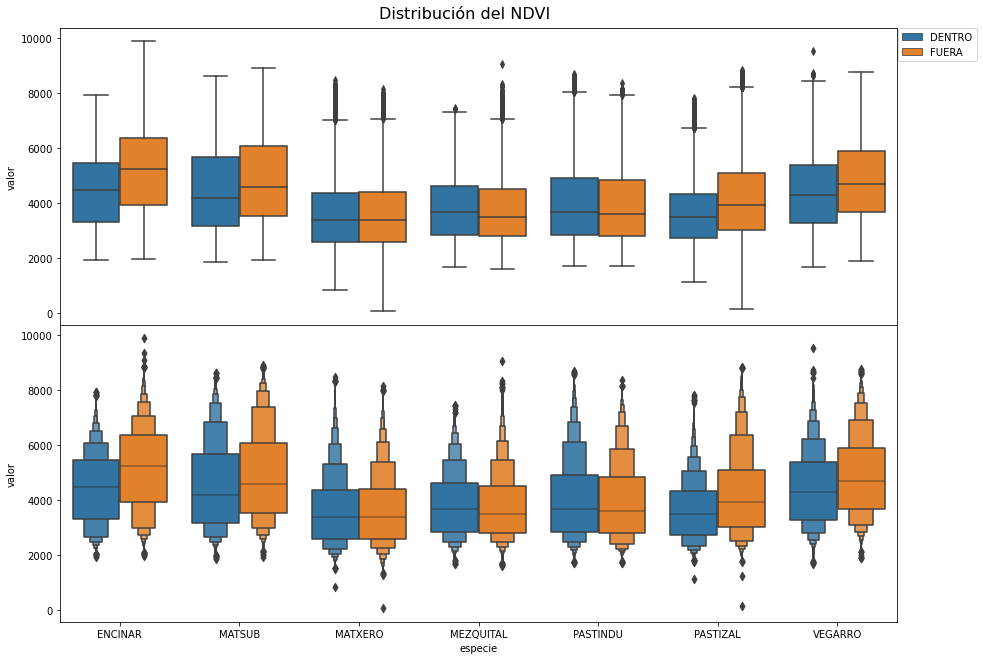

In [32]:
# Se crea una figura con 2 renglones y 1 columna
fig, axs = plt.subplots(2,1,figsize=(15, 10))
# Se configura el límite superior de la figura, el espacio entre los renglones
# y el texto del título
plt.subplots_adjust(top=.95, hspace=0)
fig.suptitle('Distribución del NDVI', fontsize=16)
# Se grafican el boxplot y el boxenplot, cada uno en un renglón diferente
sns.boxplot(x="especie", y="valor", hue='localizacion',data=df[df.metrica=='NDVI'], ax=axs[0])
sns.boxenplot(x="especie", y="valor", hue='localizacion',data=df[df.metrica=='NDVI'], ax=axs[1])
# Se eliminan las etiquetas del primer renglón
axs[0].set_xticks([])
axs[0].set_xlabel('')
# Se configura la posición de la leyenda
axs[0].legend(bbox_to_anchor=(1.095, 1), loc=0, borderaxespad=0.)
_ = axs[1].get_legend().remove()

### Distribución de los datos en las temporadas húmedas

Primeramente, desde el dataframe original, se van a extraer únicamente las lecturas tomadas dentro de las temporadas húmedas de cada año; esto son, los meses de julio, agosto, septiembre y octubre. 

In [33]:
# Se crea un dataframe vacío
temps_hum = pd.DataFrame()

# Por cada año desde el 2000 hasta el 2020 se van a tomar las lecturas tomadas
# entre el 1ro de julio del año en curso y el 31 de octubre del mismo año.
# Dichas lecturas se añadirán al dataframe "temps_hum" que acabamos de crear
for anio in range(2000,2021):
    temp_hum_actual = df[(df.fecha >= f'{anio}-07-01') & (df.fecha <= f'{anio}-10-31')]
    temps_hum = pd.concat([temps_hum, temp_hum_actual])

# Tomamos todas las especies y las contamos para utilizar esta información
# posteriormente
especies = df.especie.unique()
n_especies = len(especies)

#### EVI con histogramas

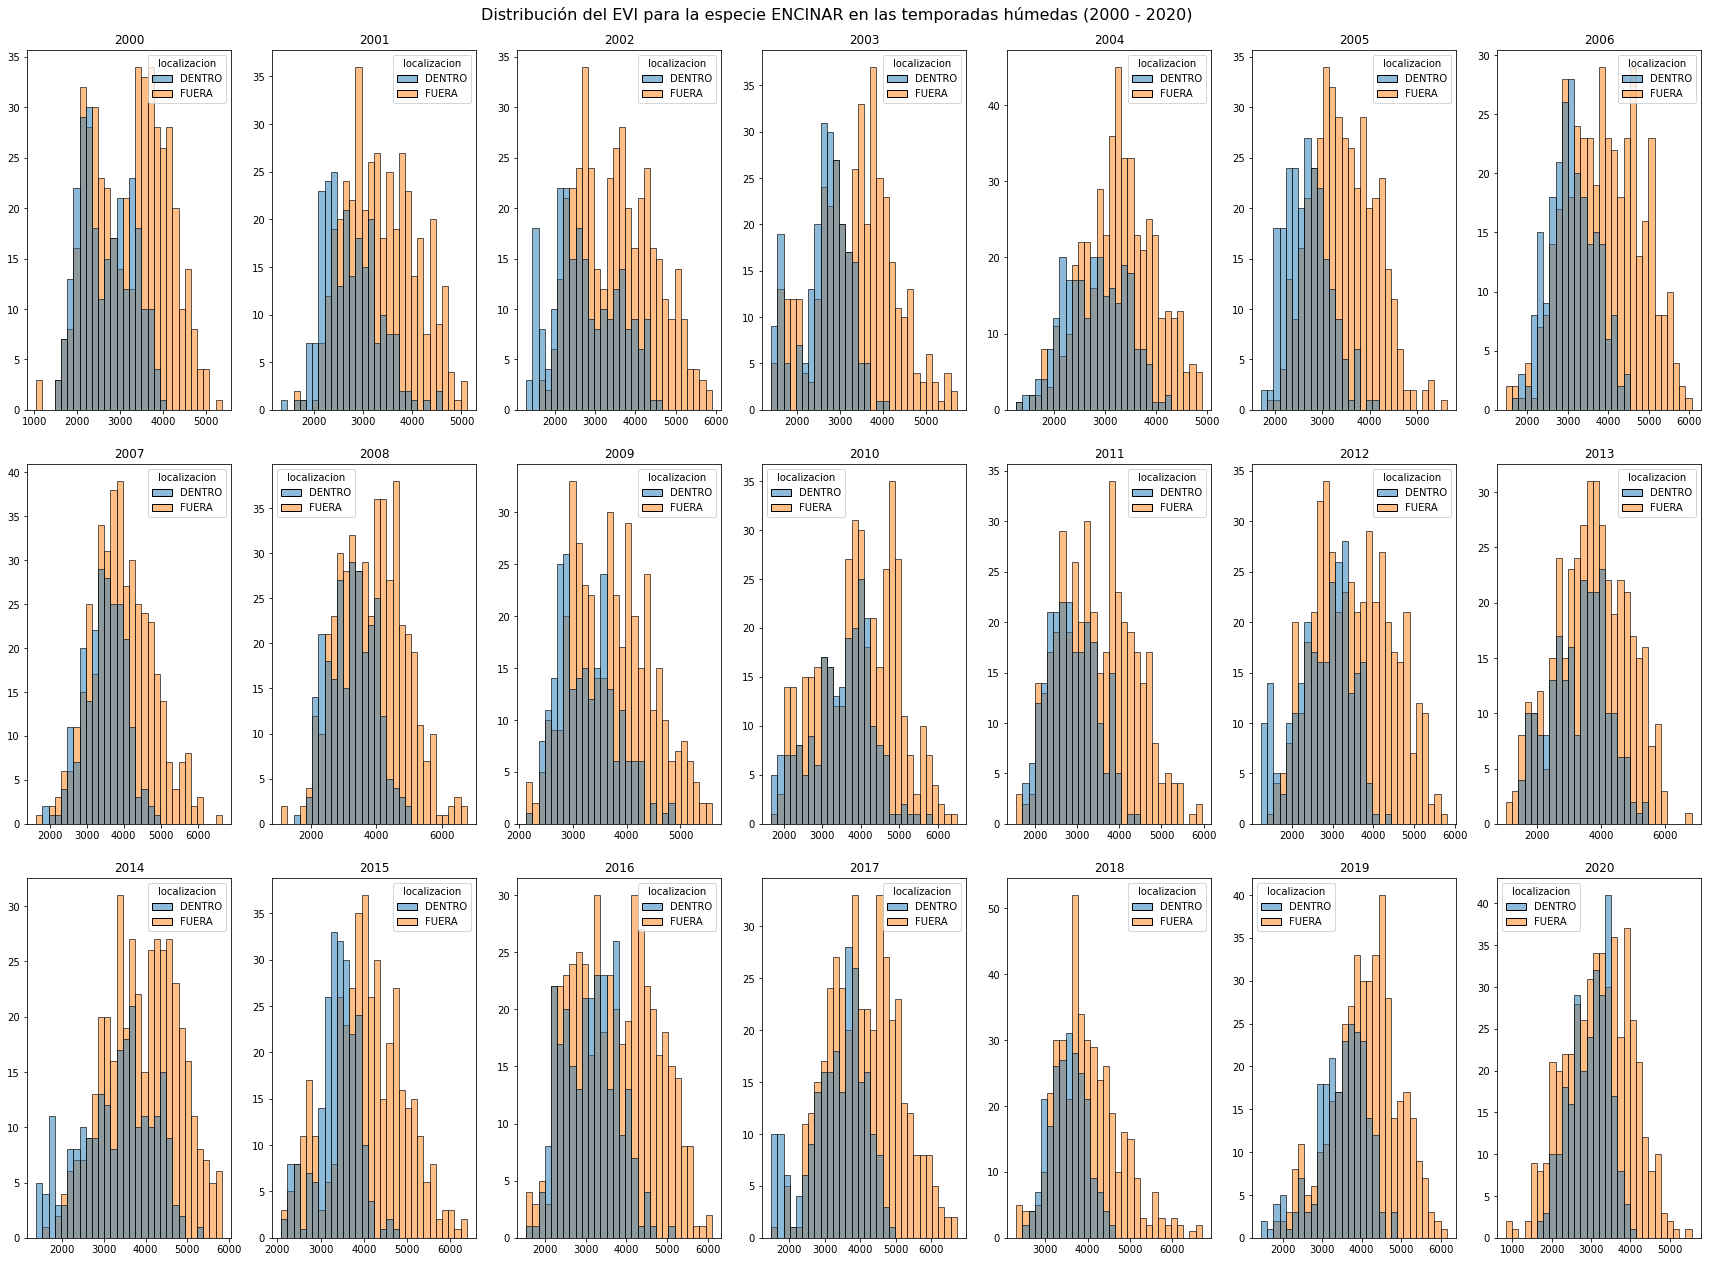

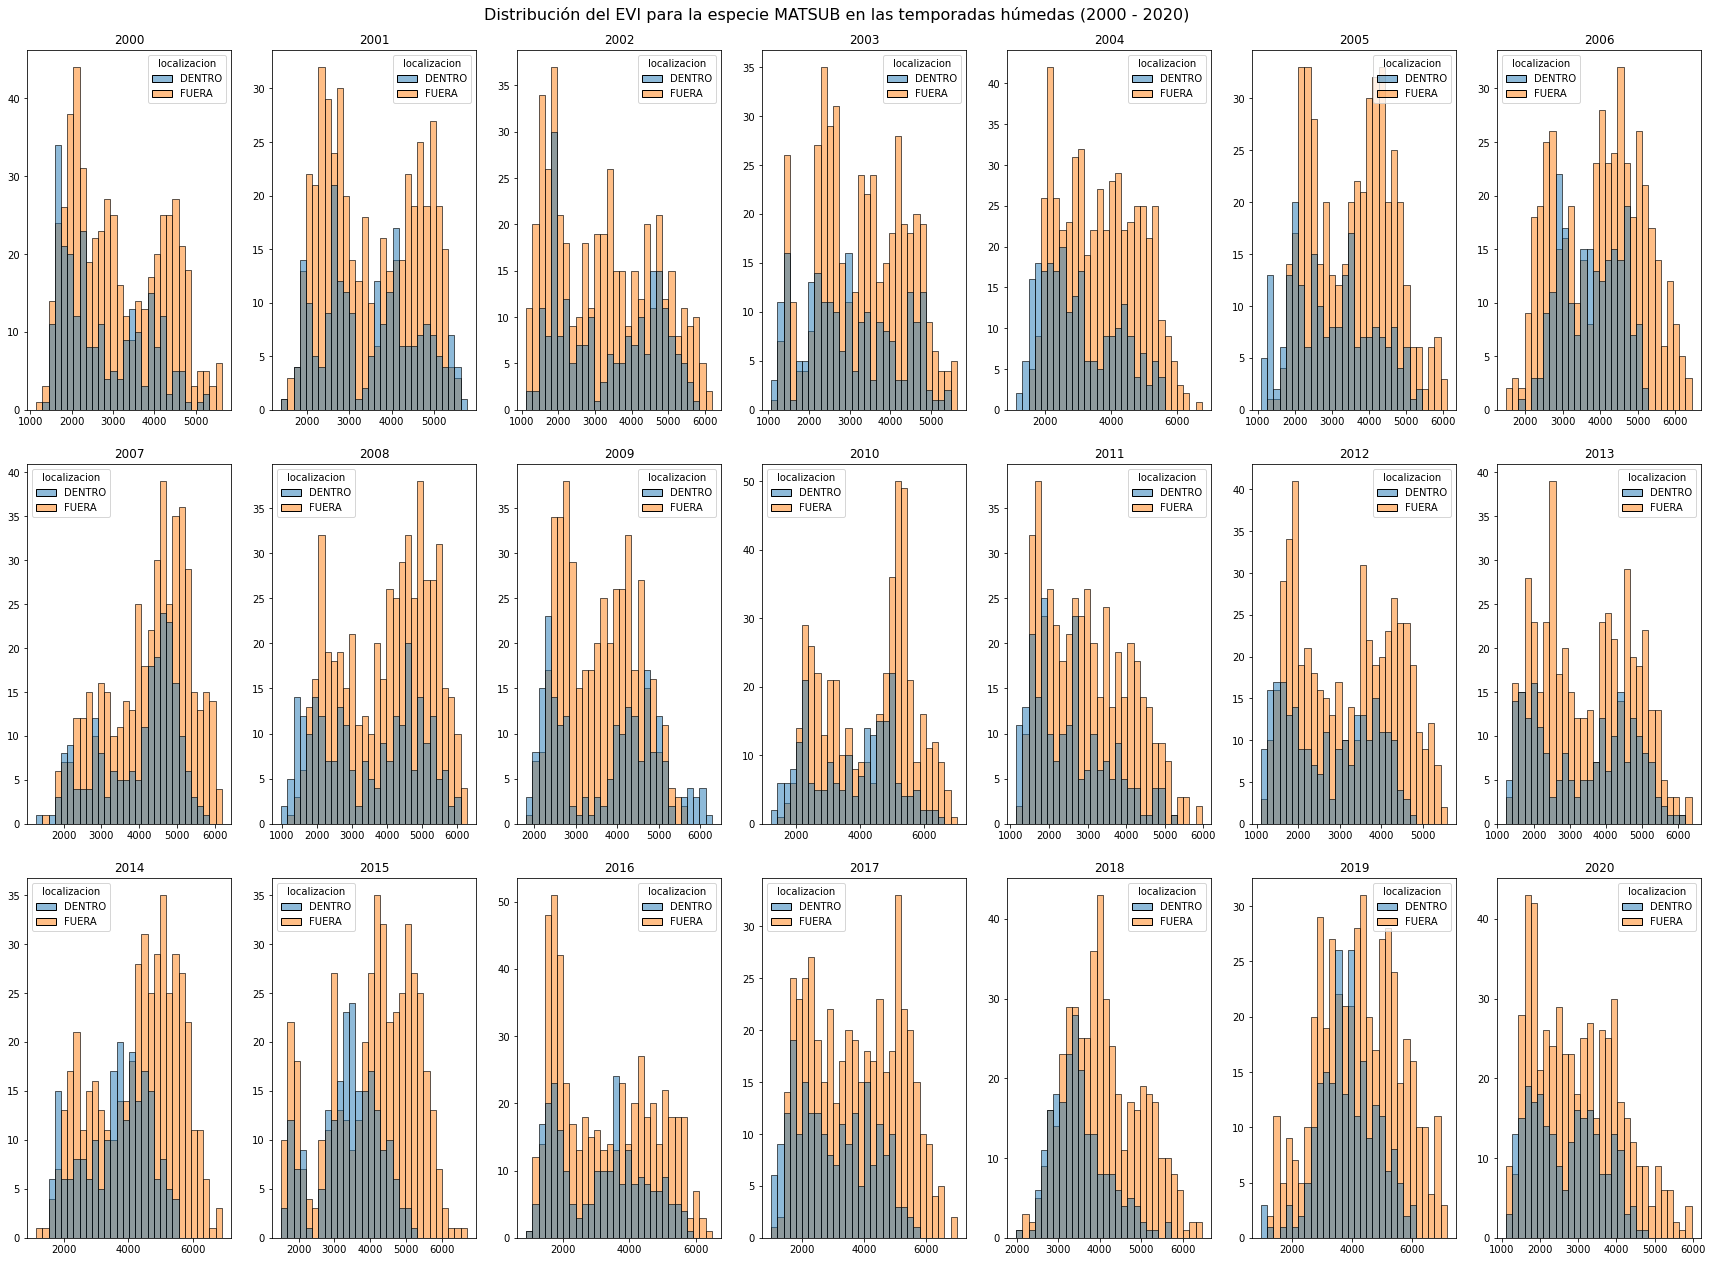

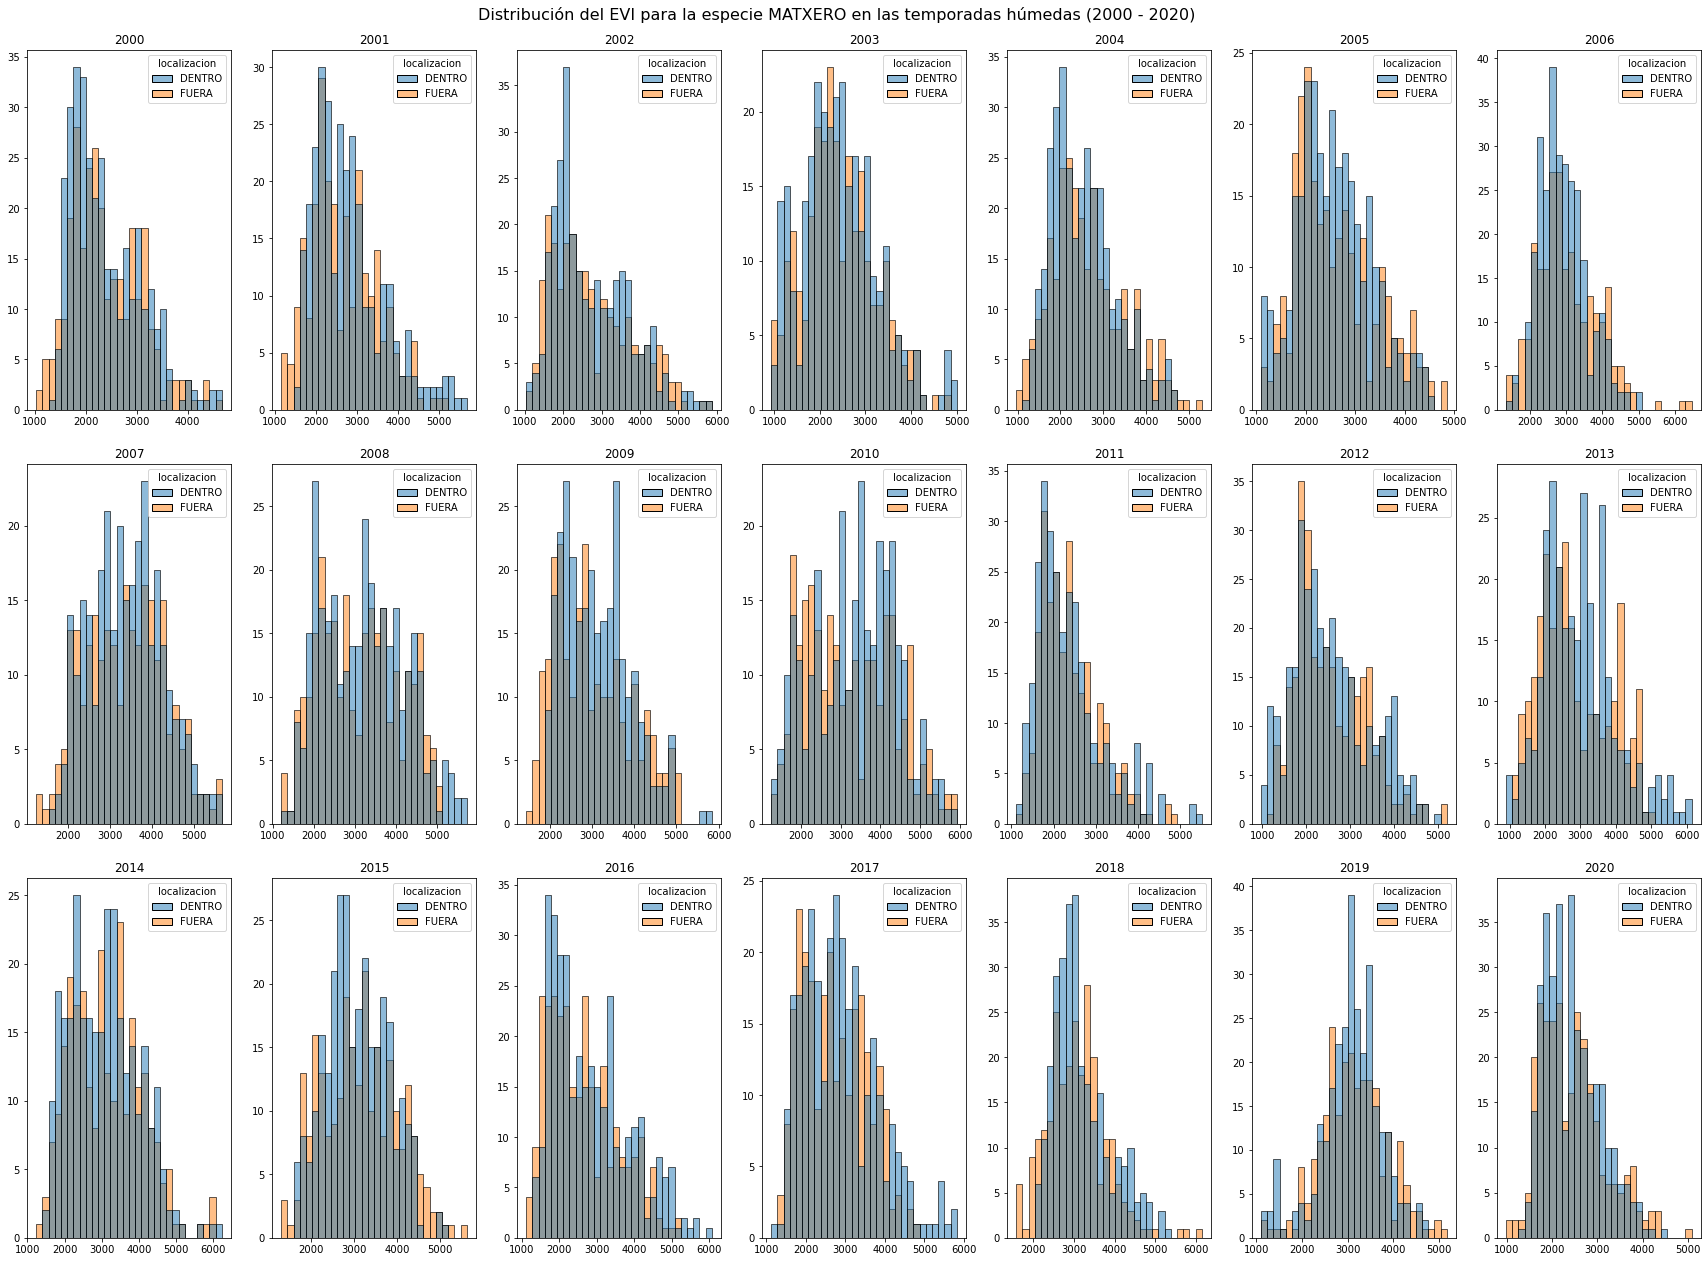

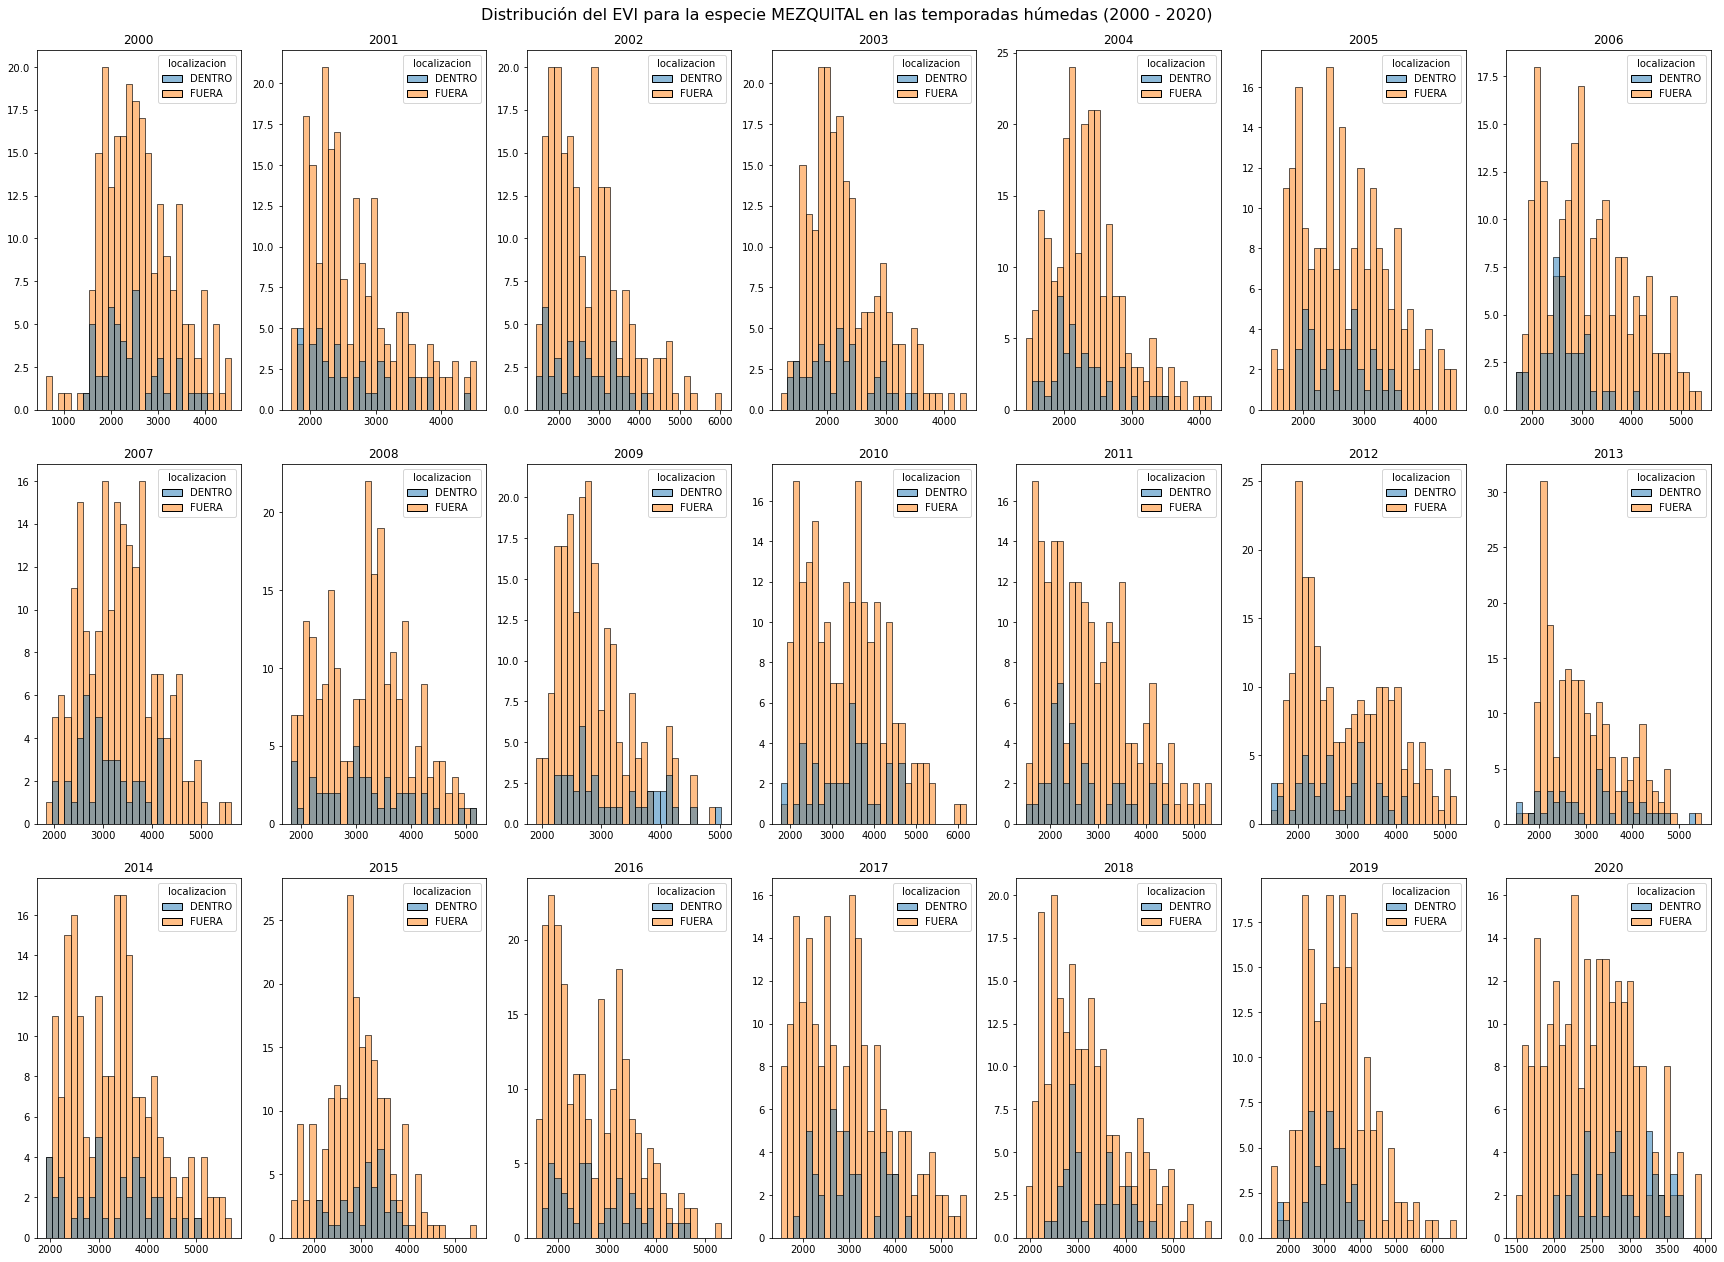

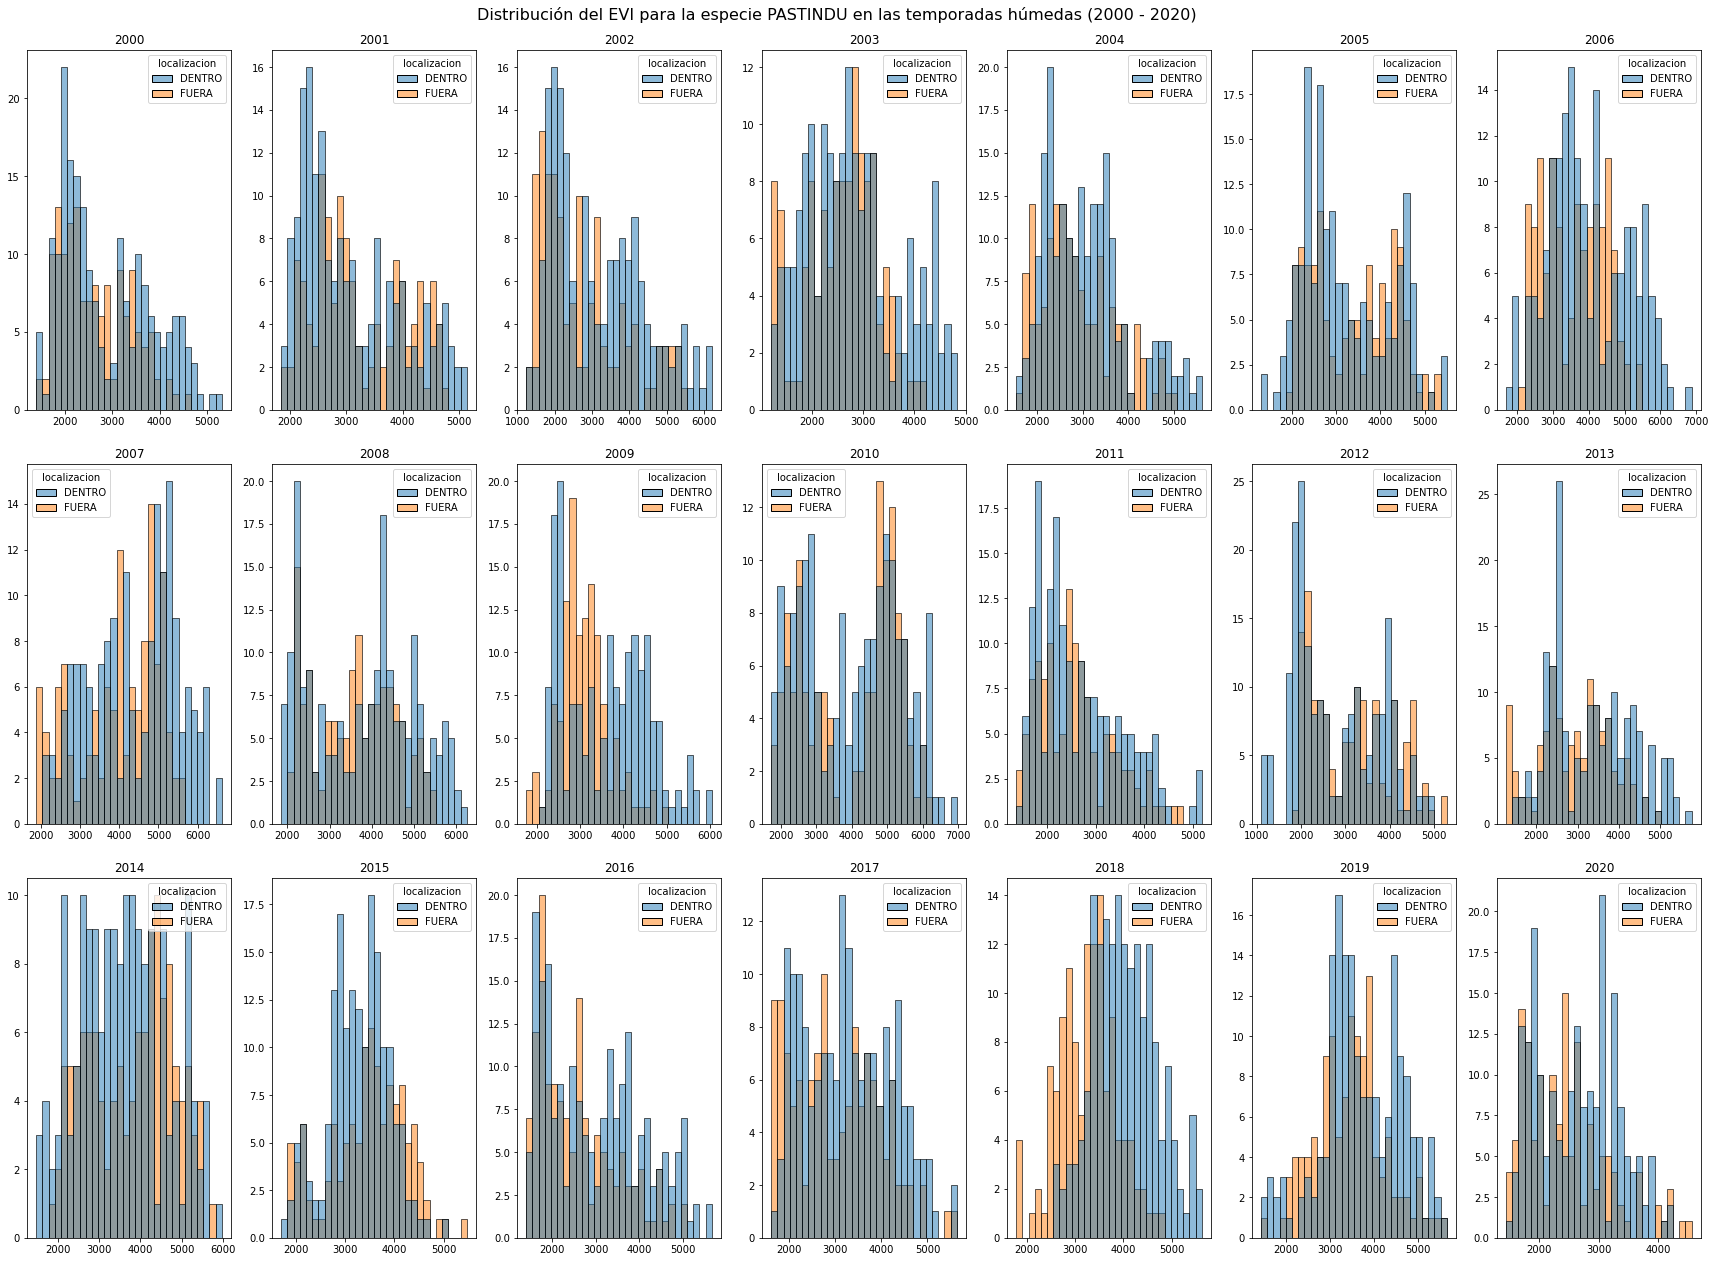

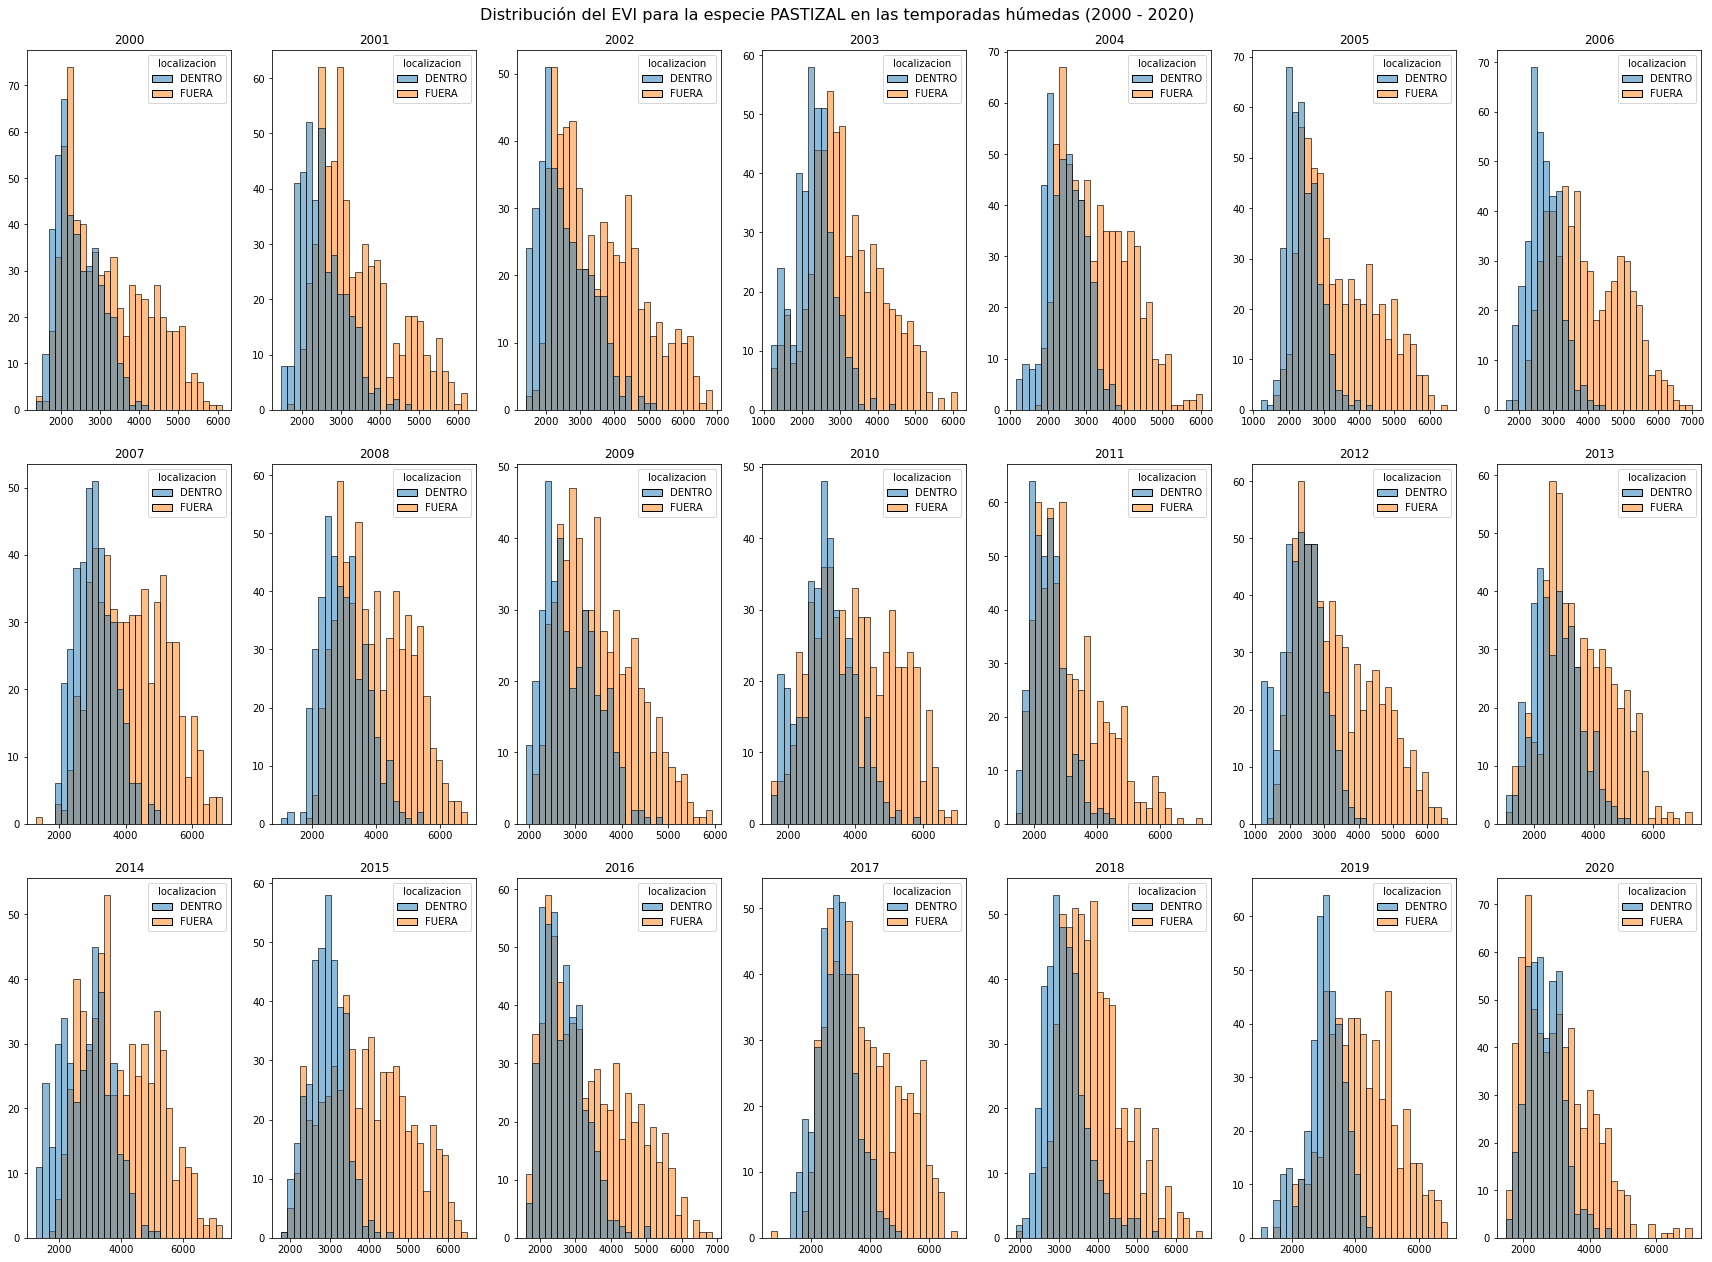

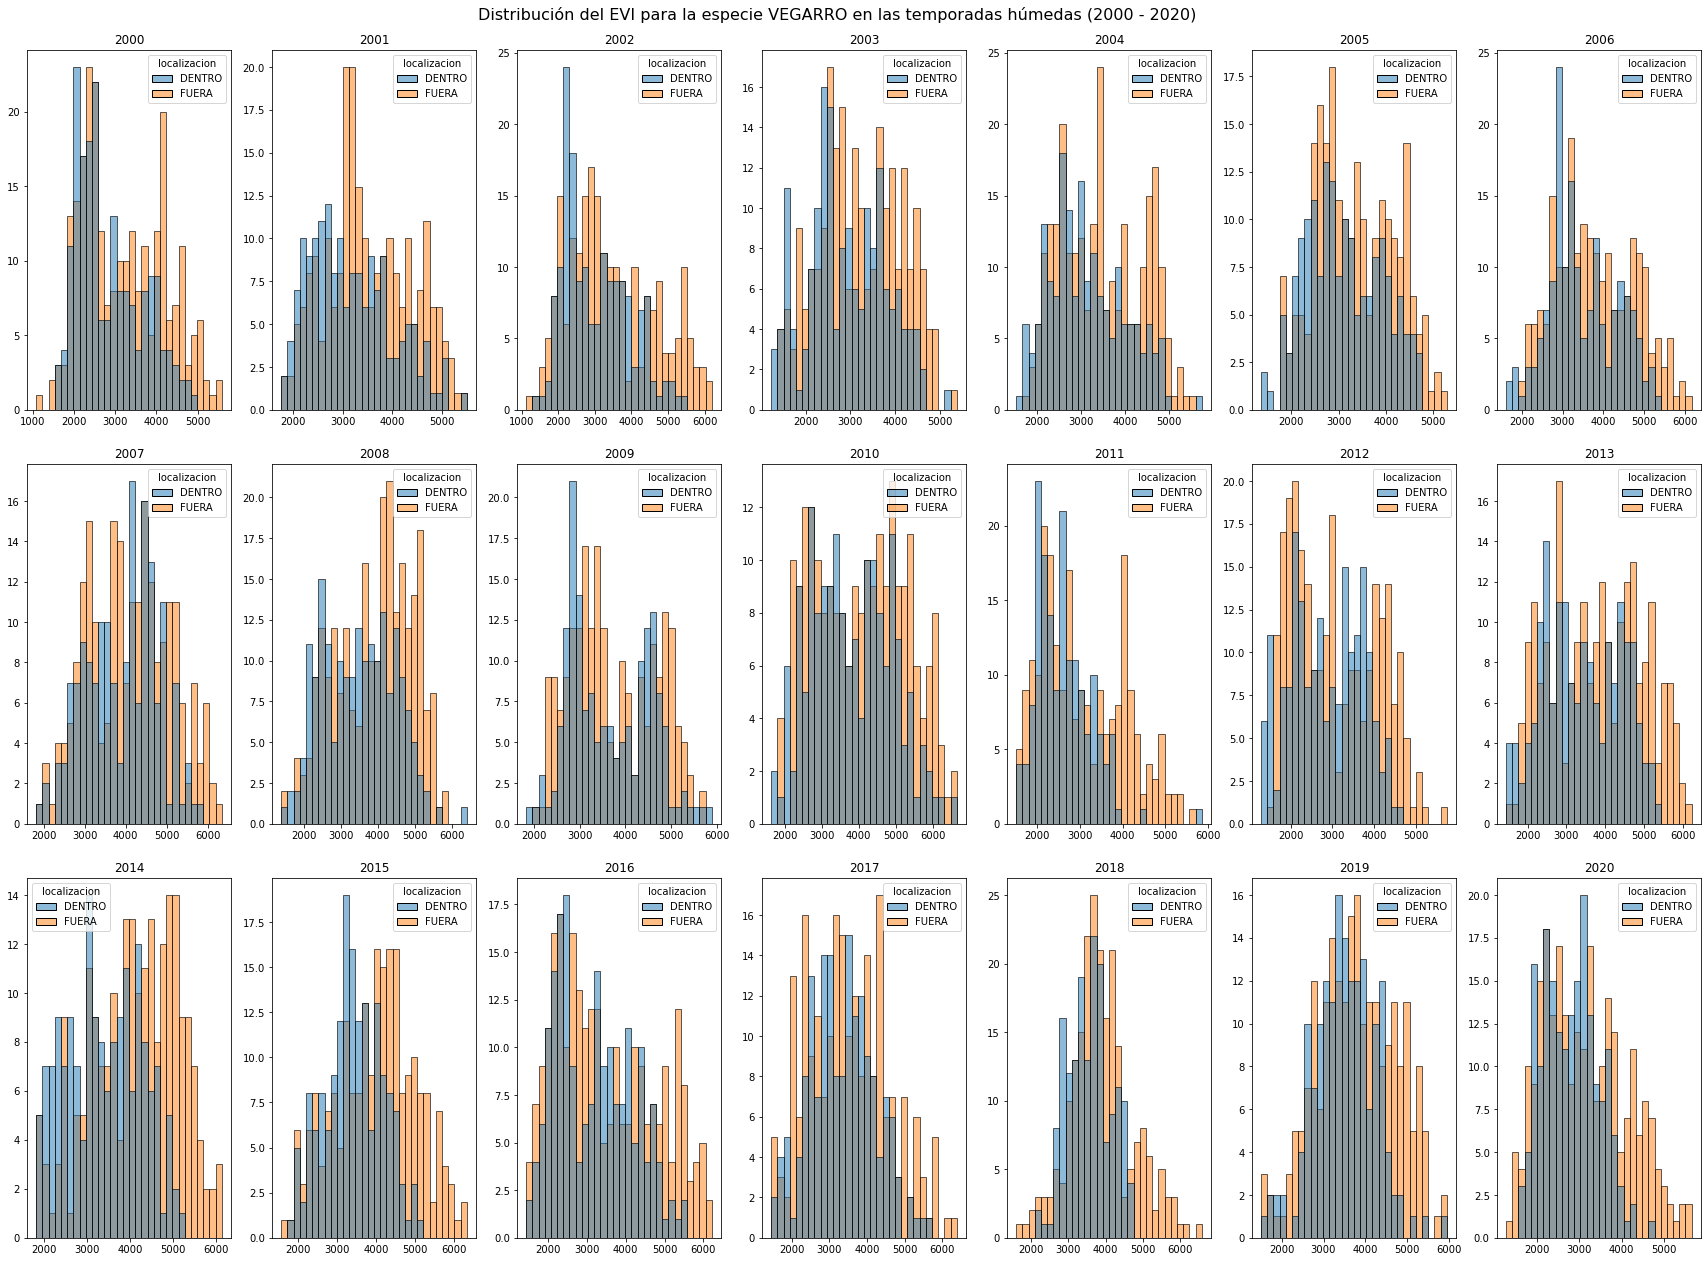

In [34]:
# Por cada especie y año, se va a graficar la distribución del EVI dentro y
# fuera de la reserva en las temporadas húmedas
for esp in especies:
    # Se crea una figura con 3 renglones y 7 columnas
    fig, axs = plt.subplots(3,7,figsize=(30, 20))
    # Se configura el límite superior de la figura y el espacio horizontal 
    # entre los renglones
    plt.subplots_adjust(top=.95, hspace=.15)
    # Se añade un título
    fig.suptitle(f'Distribución del EVI para la especie {esp} en las temporadas húmedas (2000 - 2020)', fontsize=16)
    
    # Contadores para localizar en qué eje se va a graficar cada histograma
    i = 0
    j = 0
    # Se grafican los datos por año
    for anio in range(2000,2021):
        # Se obtienen las lecturas de EVI en temporada húmeda para la especie
        # y año en cuestión
        datos = temps_hum[(temps_hum.metrica=='EVI')&(temps_hum.especie==esp)&(temps_hum.fecha.dt.year==anio)]
        # Se grafica un histograma
        sns.histplot(x=datos.valor, hue=datos.localizacion ,ax=axs[i][j], bins=30)
        # Se añade un título al histograma y se ocultan las etiquetas de los
        # ejes
        axs[i][j].set_title(anio)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')
        
        # Como la figura es de 3x7, entonces cambiamos de renglón cada 7
        # histogramas
        j += 1 
        if j == 7:
            j = 0
            i += 1
    # Se muestra la gráfica de la especie
    _ = plt.show()

#### EVI con diagramas de caja

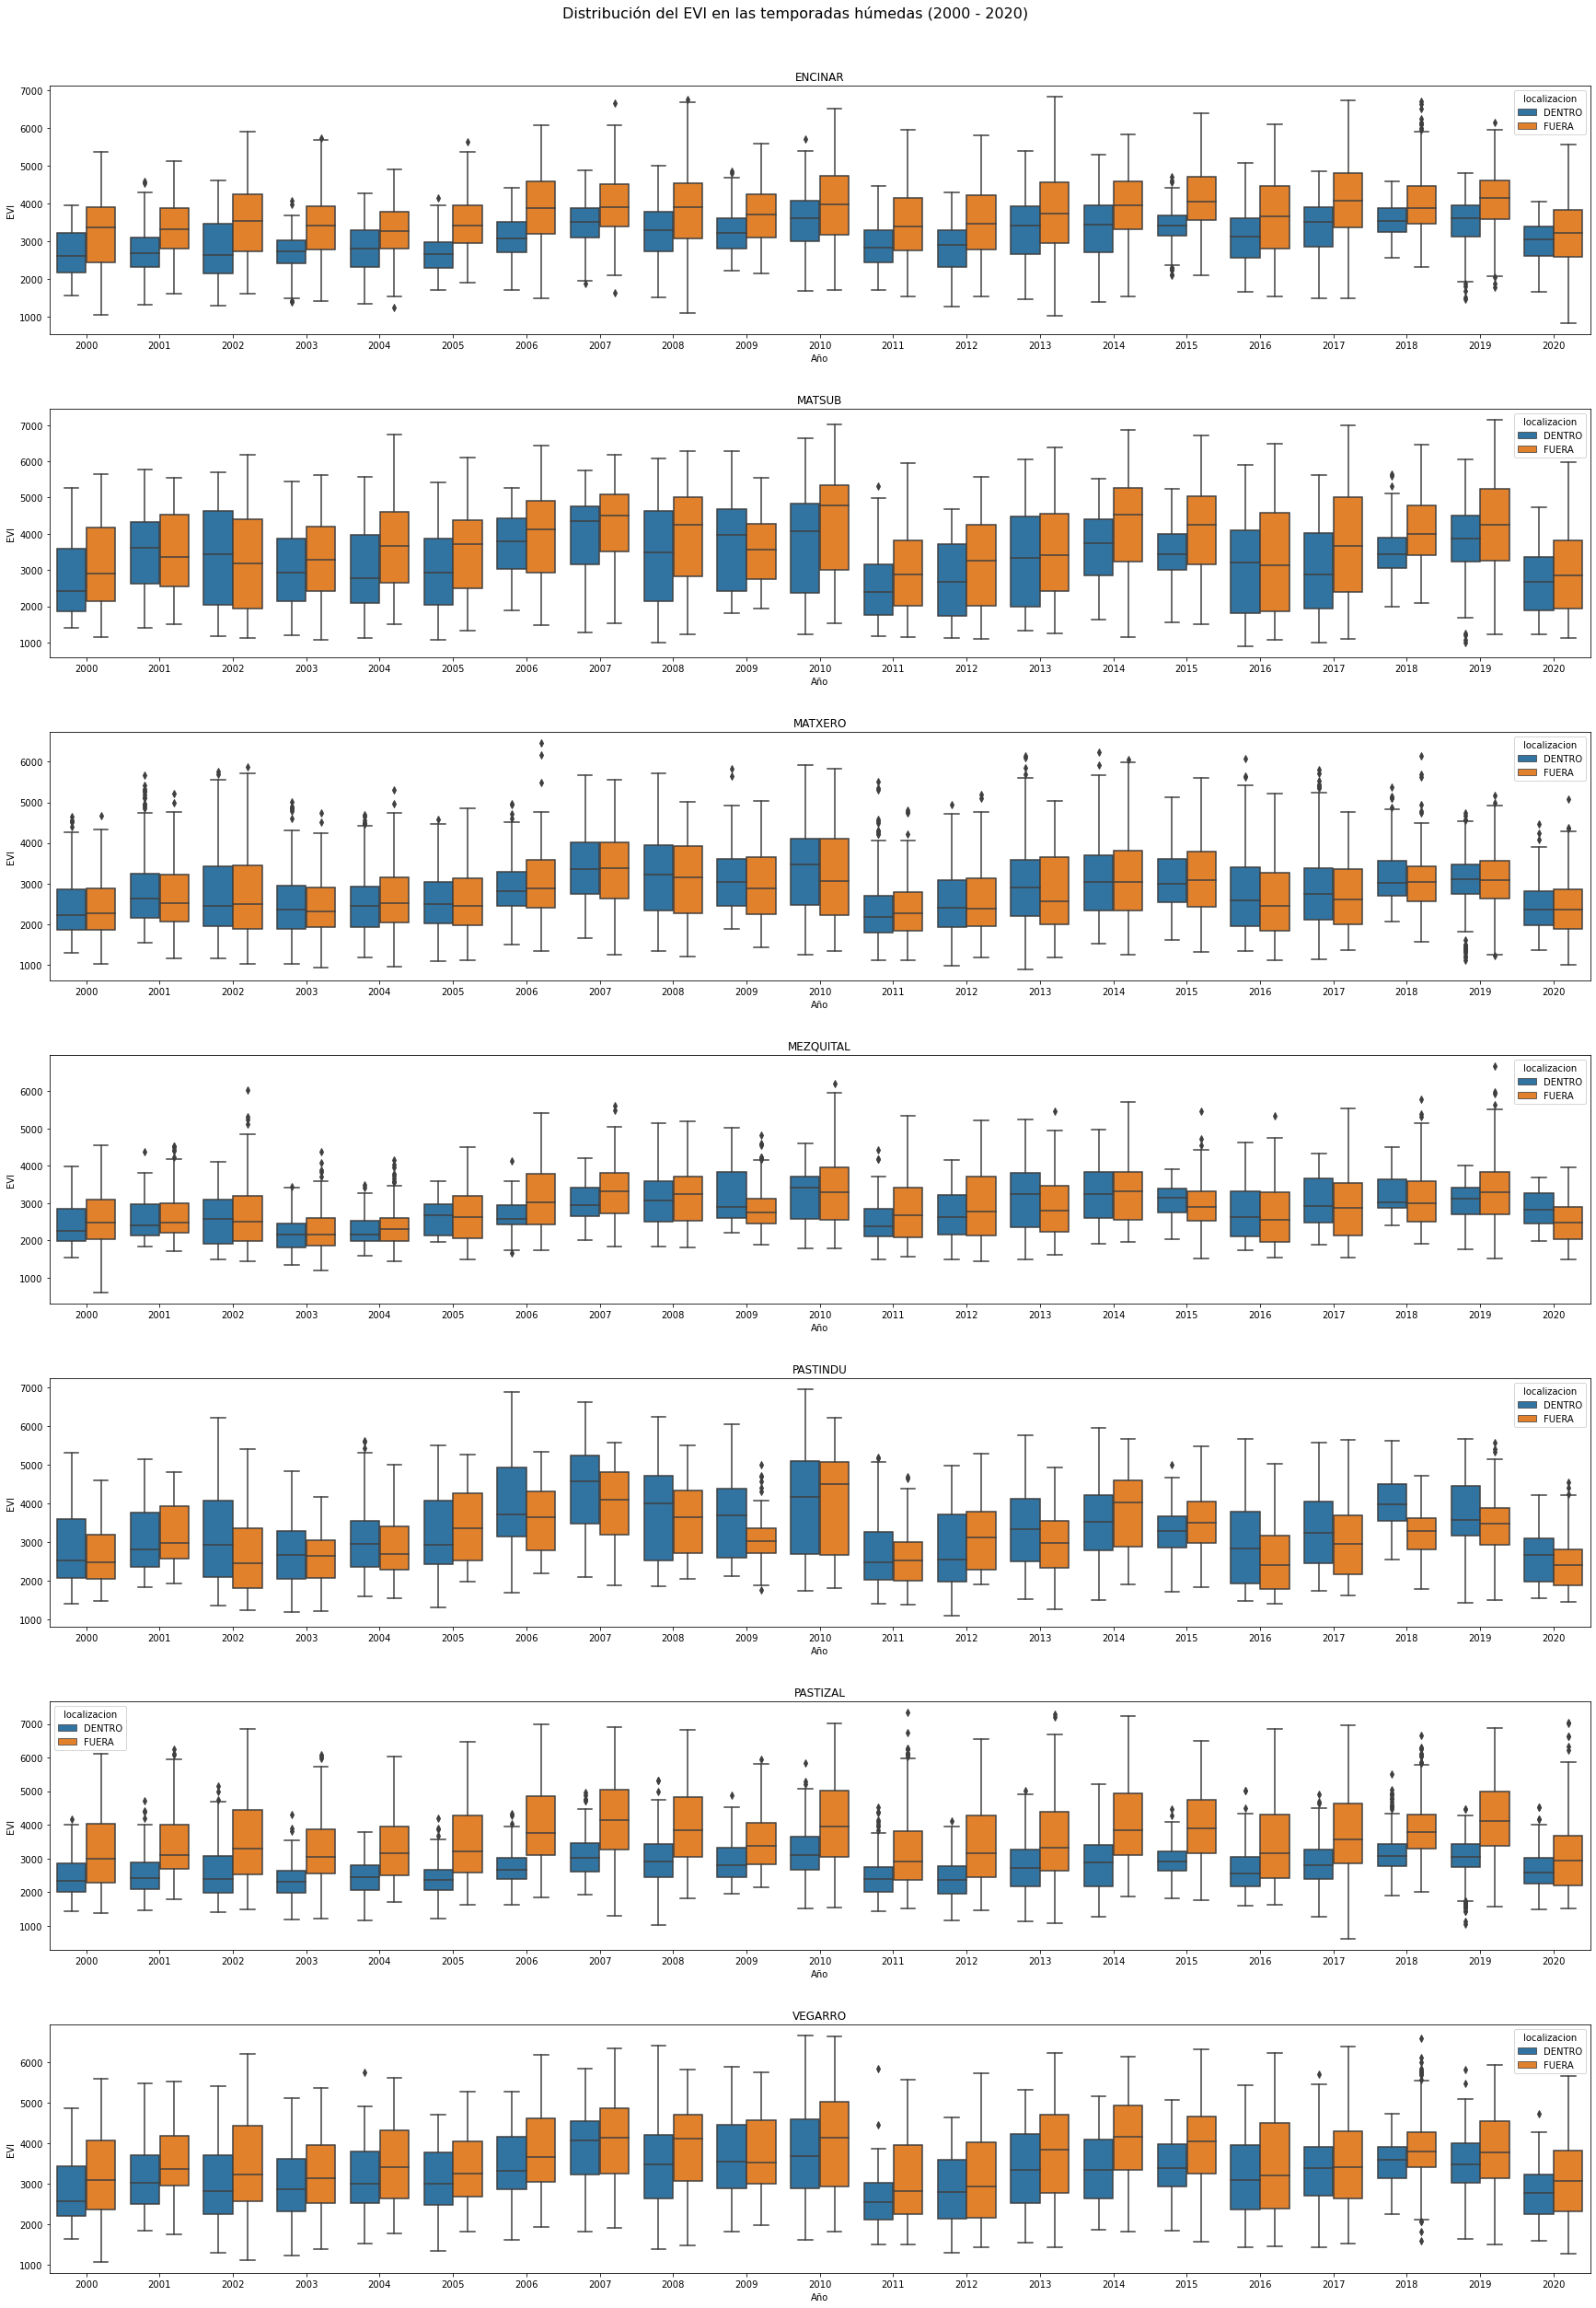

In [35]:
# Se crea una figura con tantos renglones como especies existan y se configura
# el límite superior y el espaciado entre renglones
fig, axs = plt.subplots(n_especies,1,figsize=(30, 40))
plt.subplots_adjust(top=.95, hspace=.3)
# Se añade un título a la figura
fig.suptitle('Distribución del EVI en las temporadas húmedas (2000 - 2020)', fontsize=16)

# Por cada especie se grafican los diagramas de caja
for i in range(n_especies):
    # Se selecciona la especie
    esp = especies[i]
    # Se selecciona el EVI en temporada húmerda para la especie en cuestión 
    datos = temps_hum[(temps_hum.especie==esp) & (temps_hum.metrica=='EVI') ]
    # Se grafican los diagramas de caja agrupados por localización y por año
    sns.boxplot(x=datos.fecha.dt.year, y=datos.valor, hue=datos.localizacion, ax=axs[i])
    # Se añade el título al axis  y se ocultan las etiquetas de los ejes
    axs[i].set_title(esp)
    axs[i].set_xlabel('Año')
    axs[i].set_ylabel('EVI')

#### NDVI con histogramas

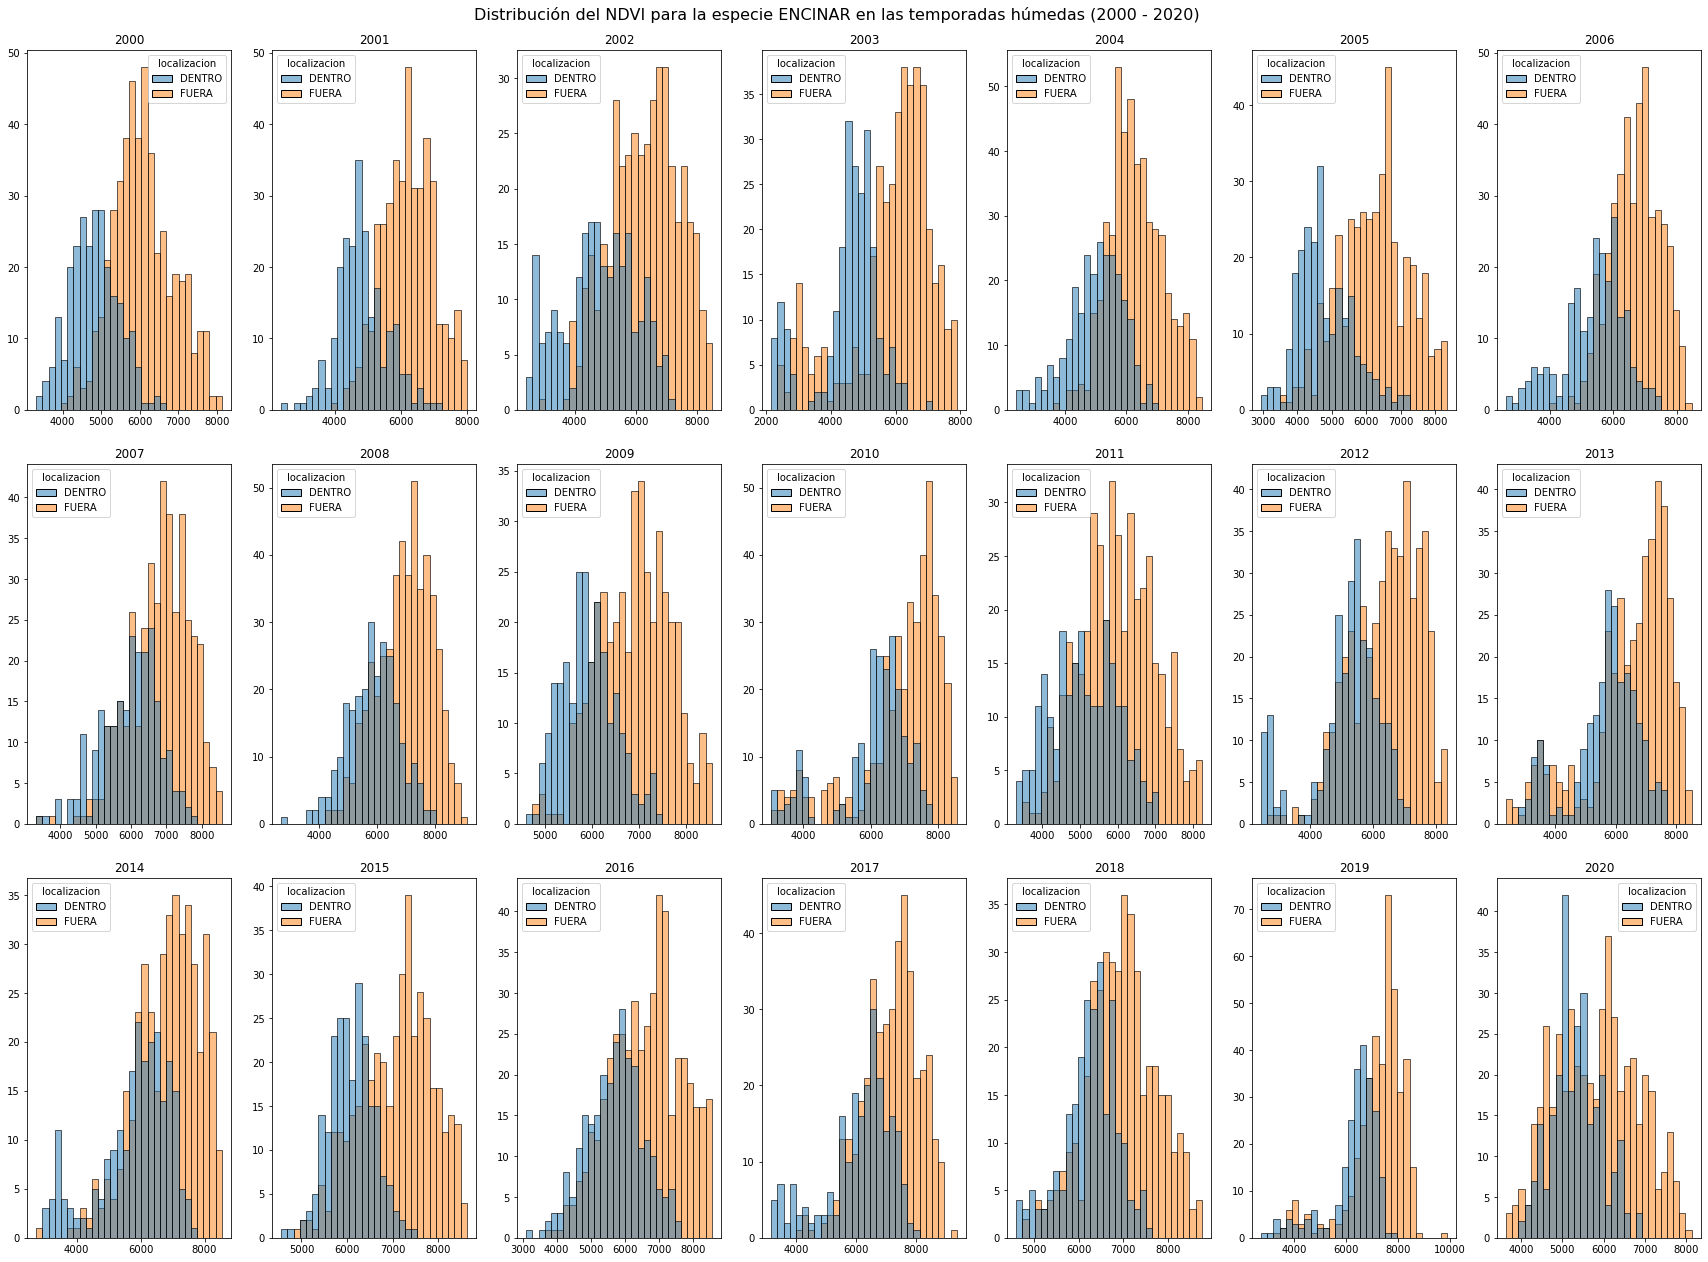

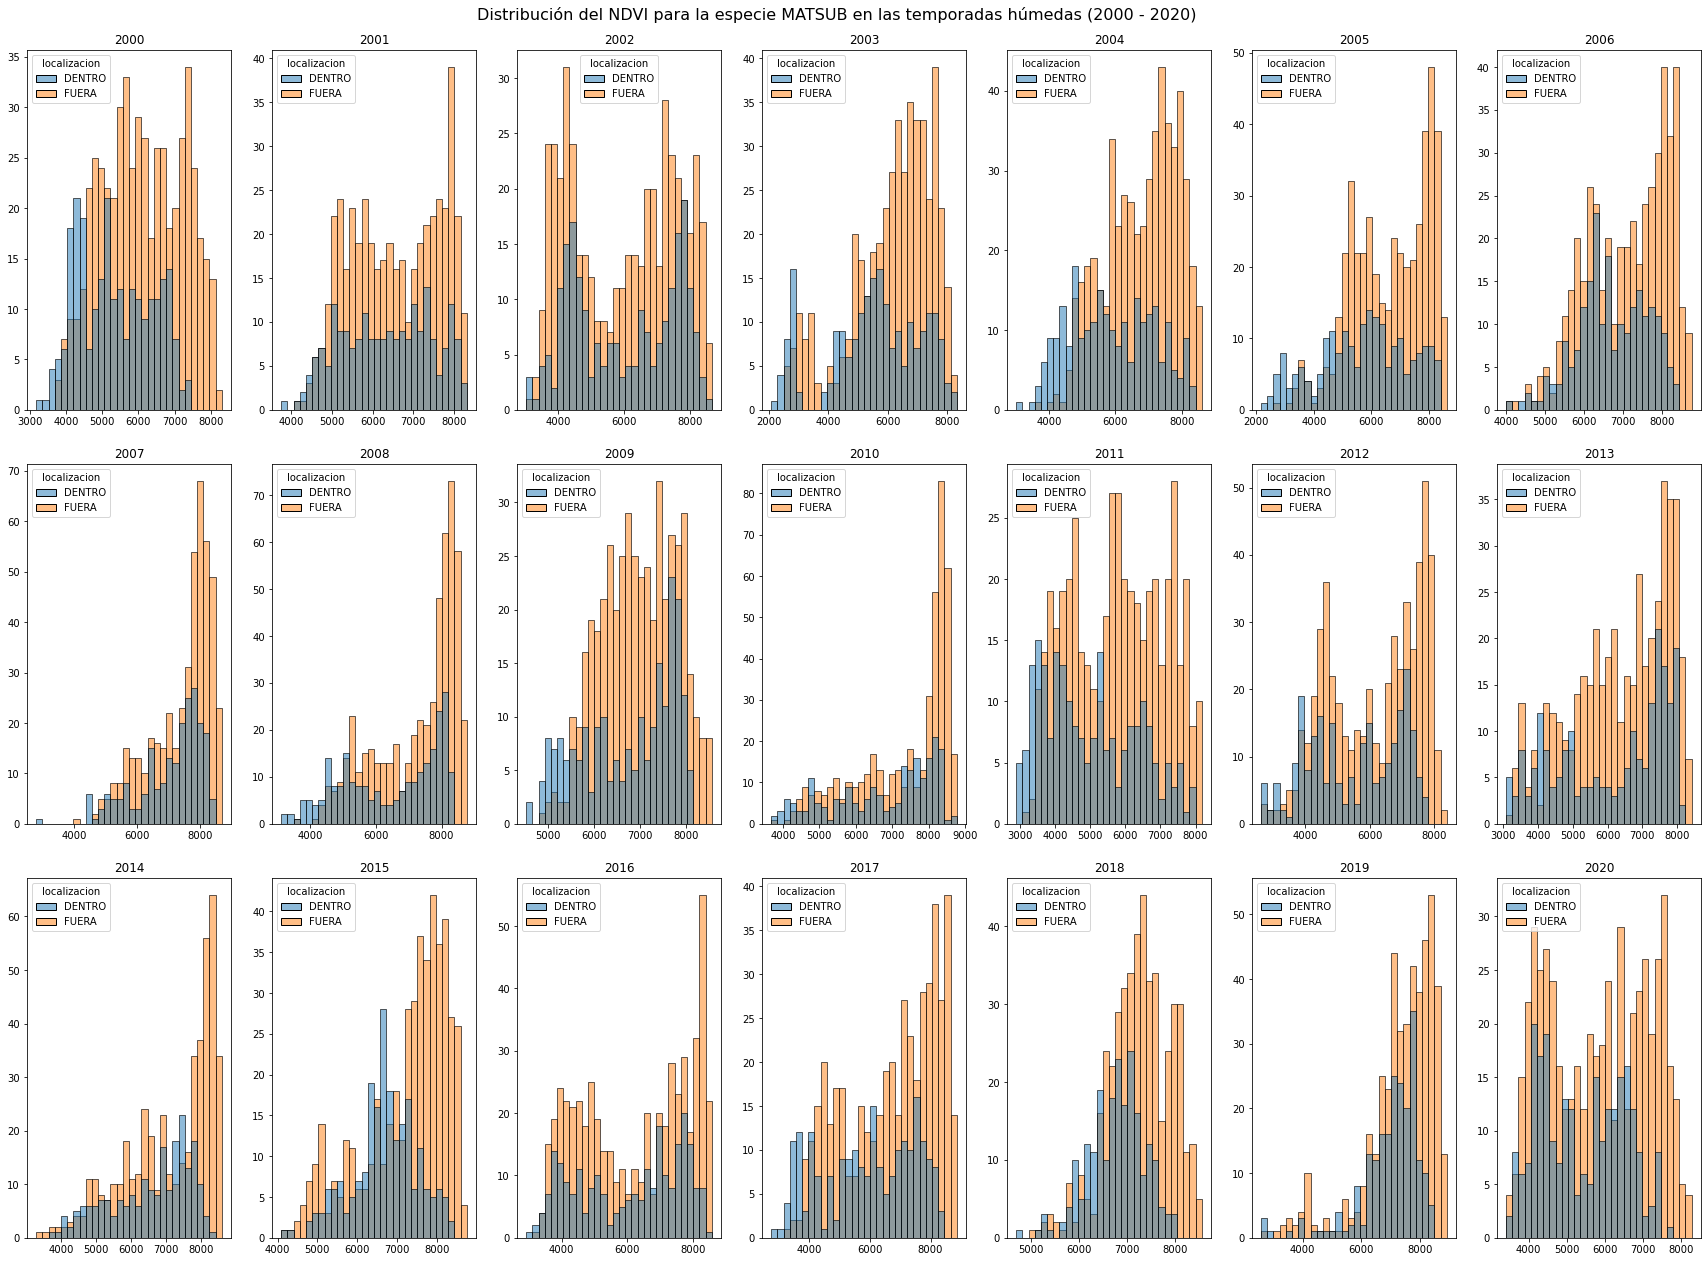

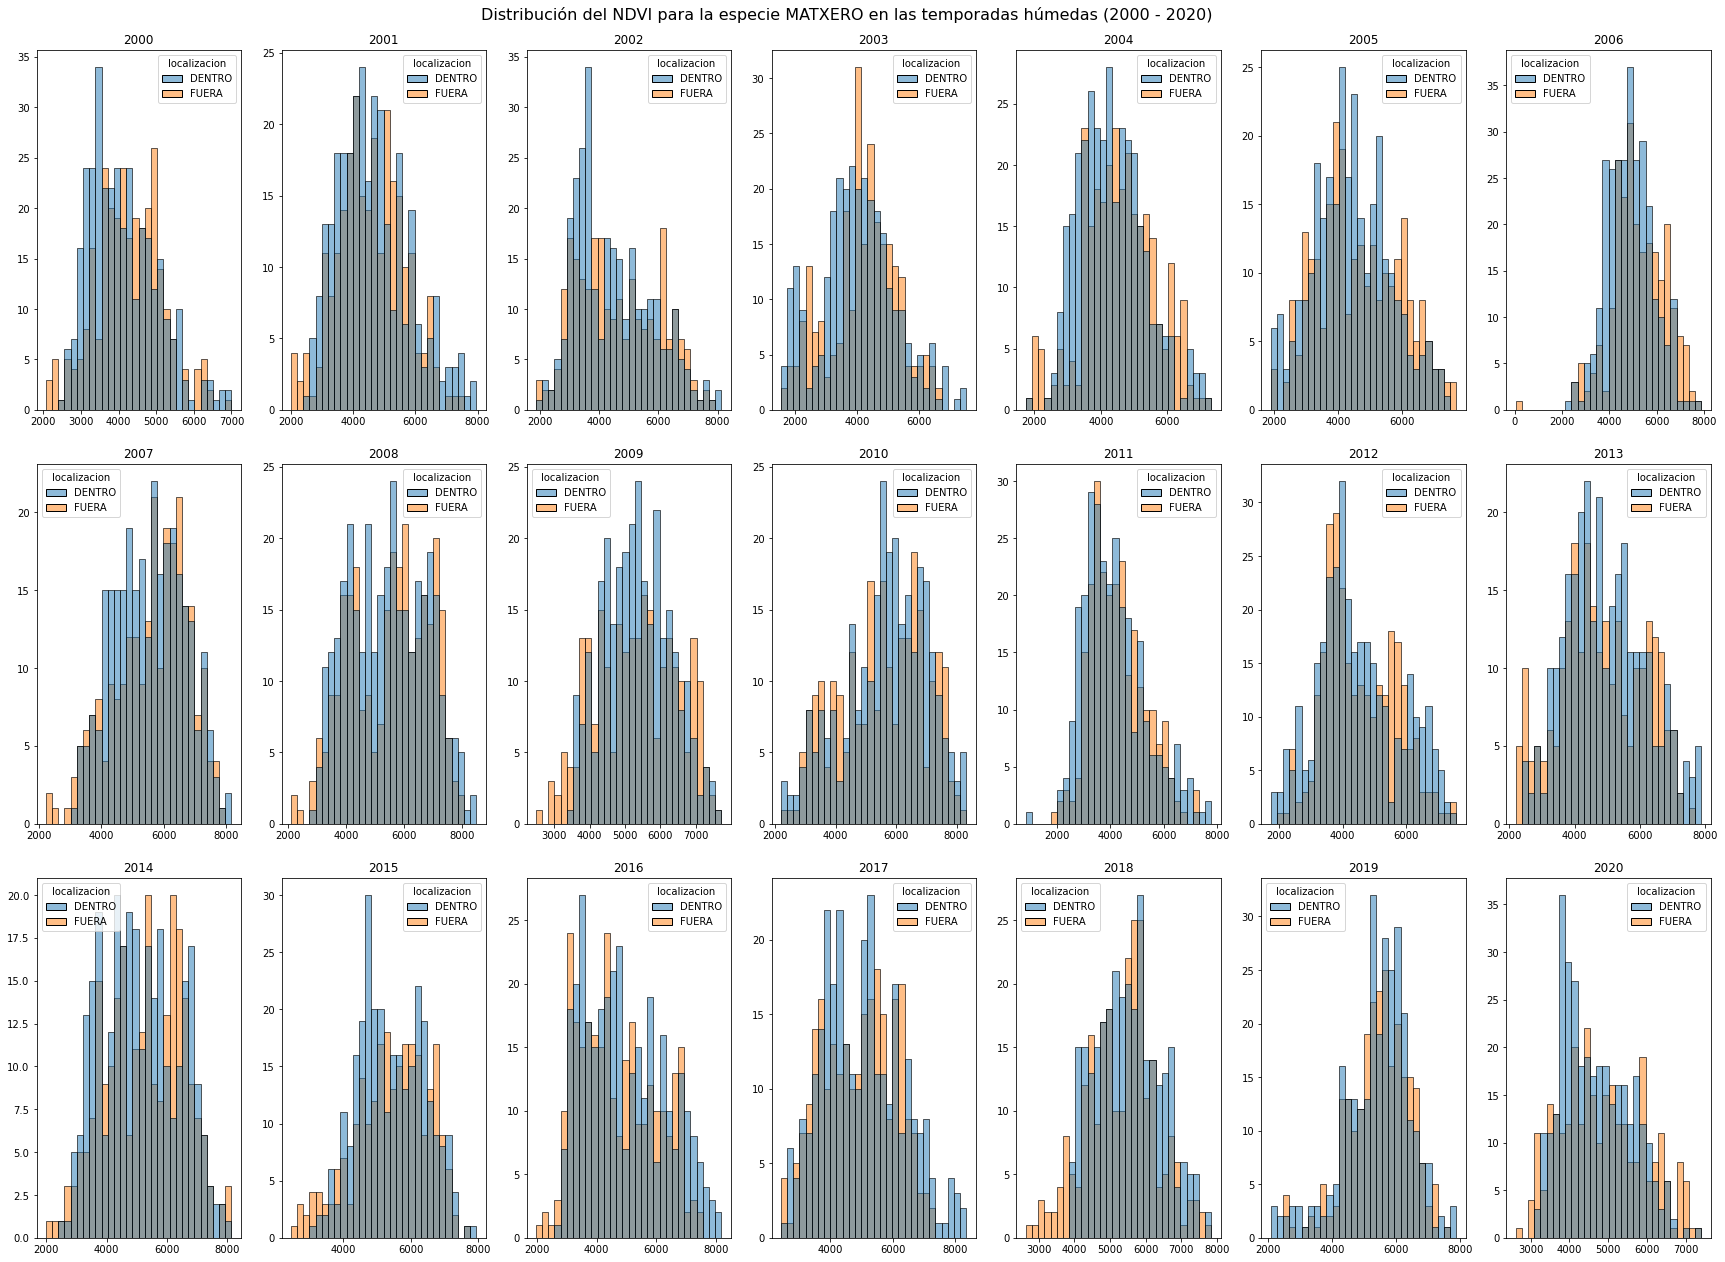

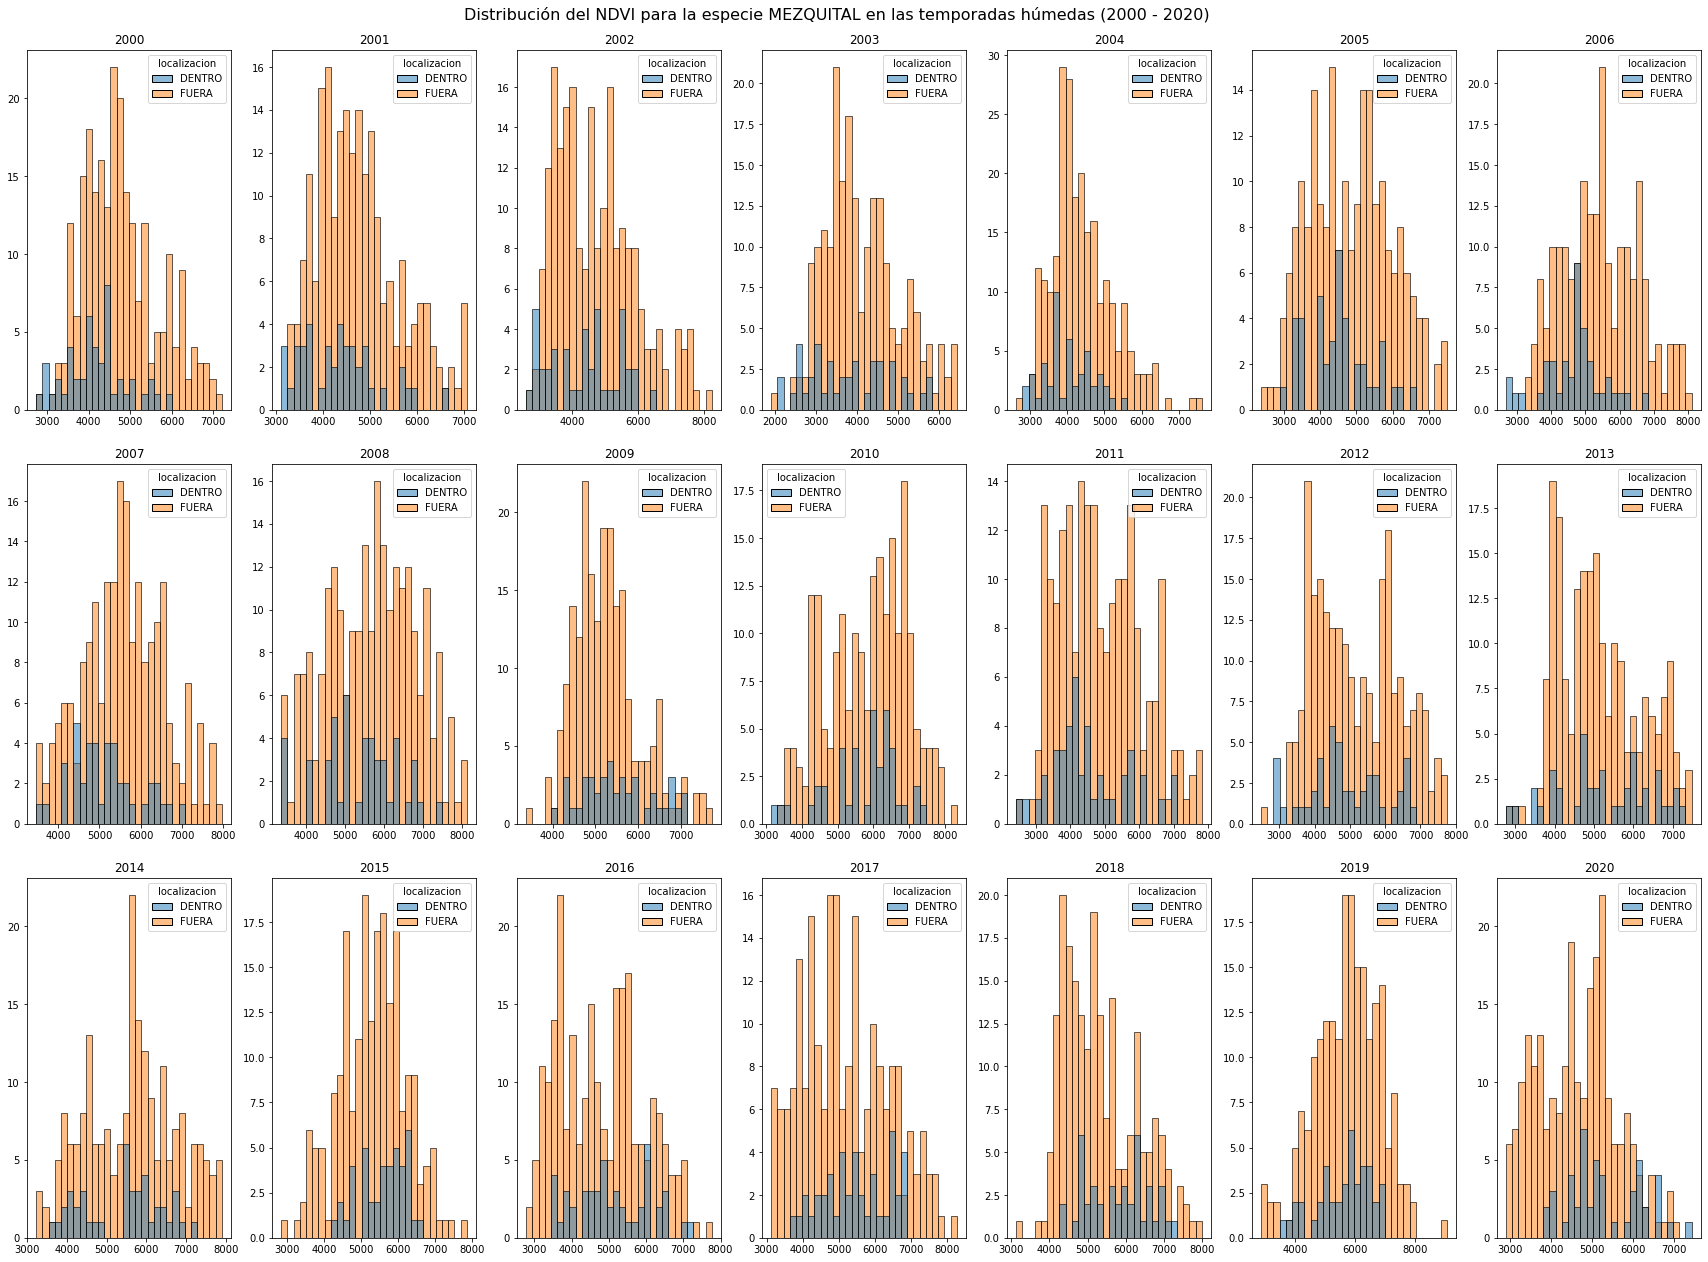

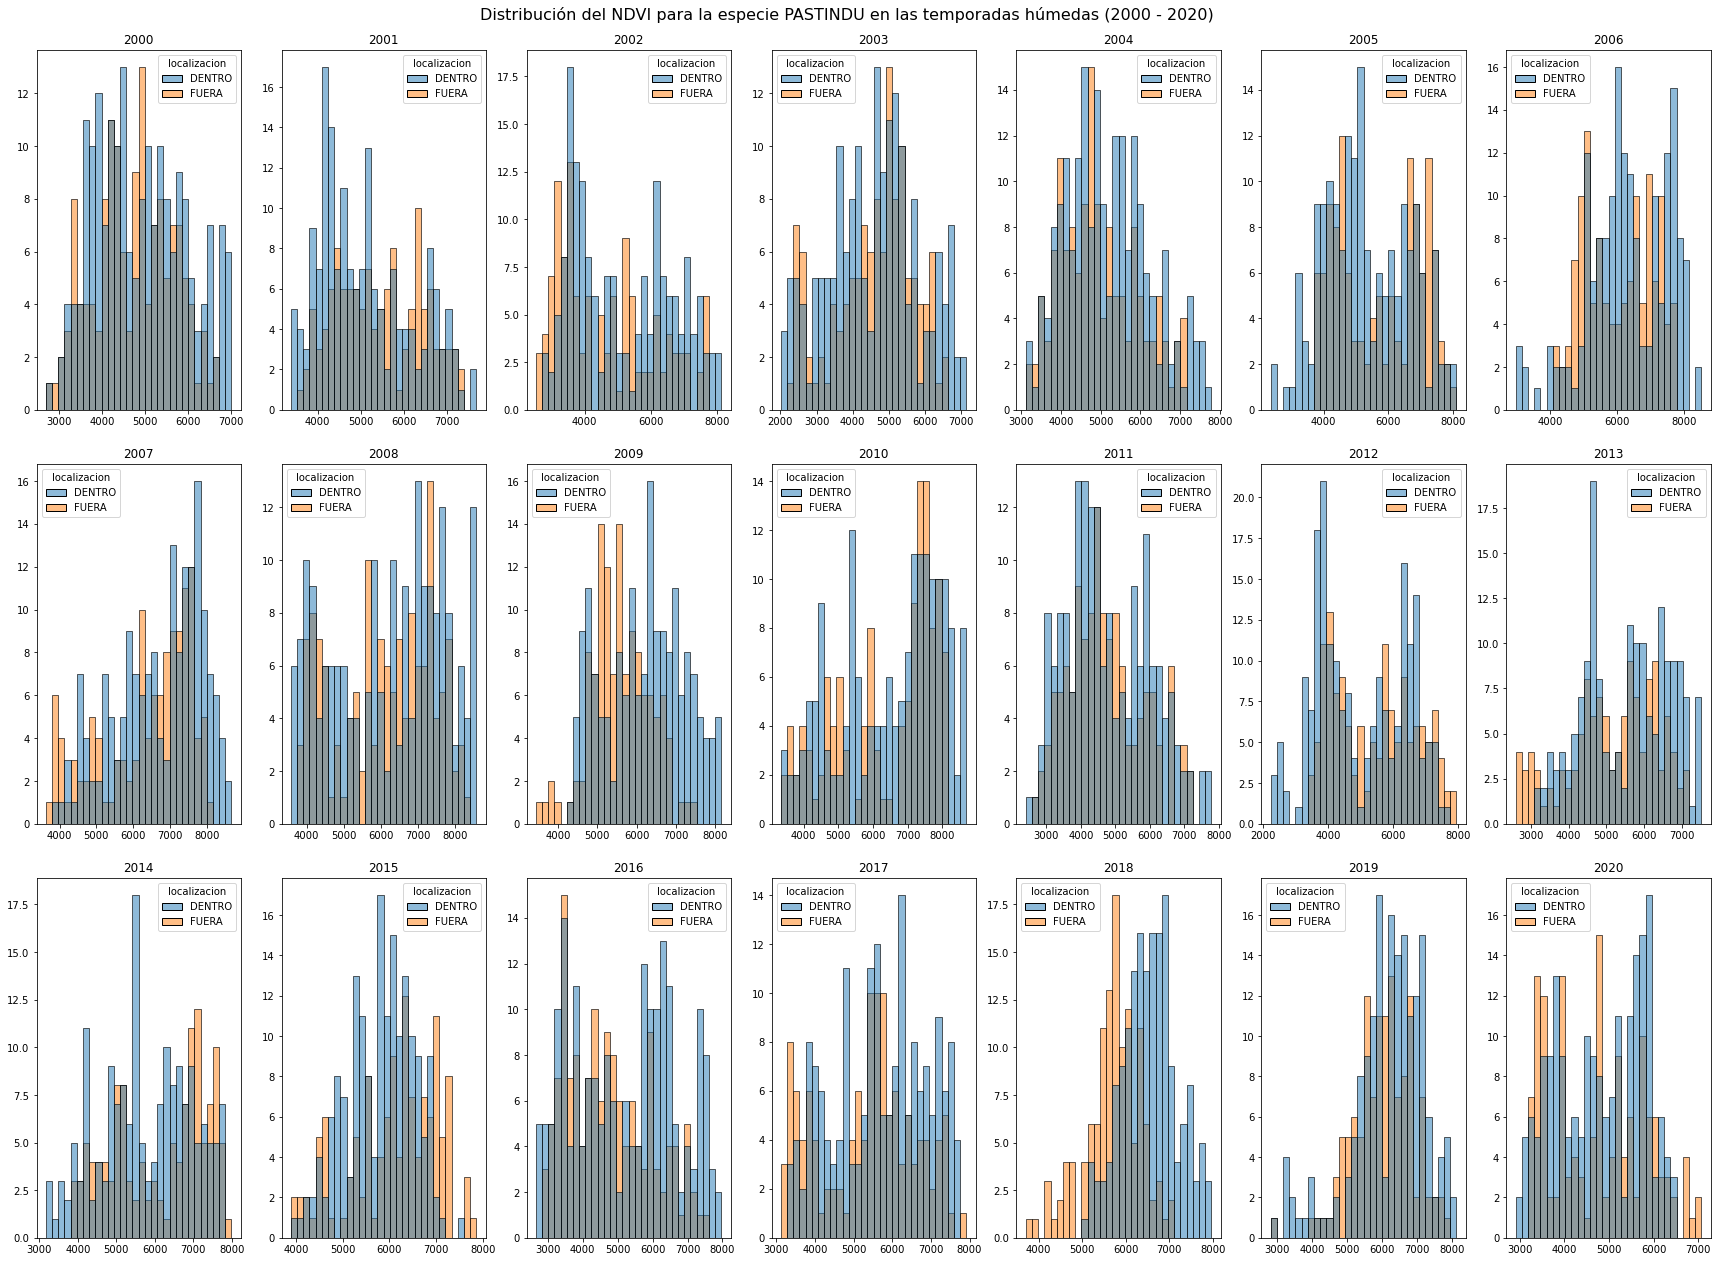

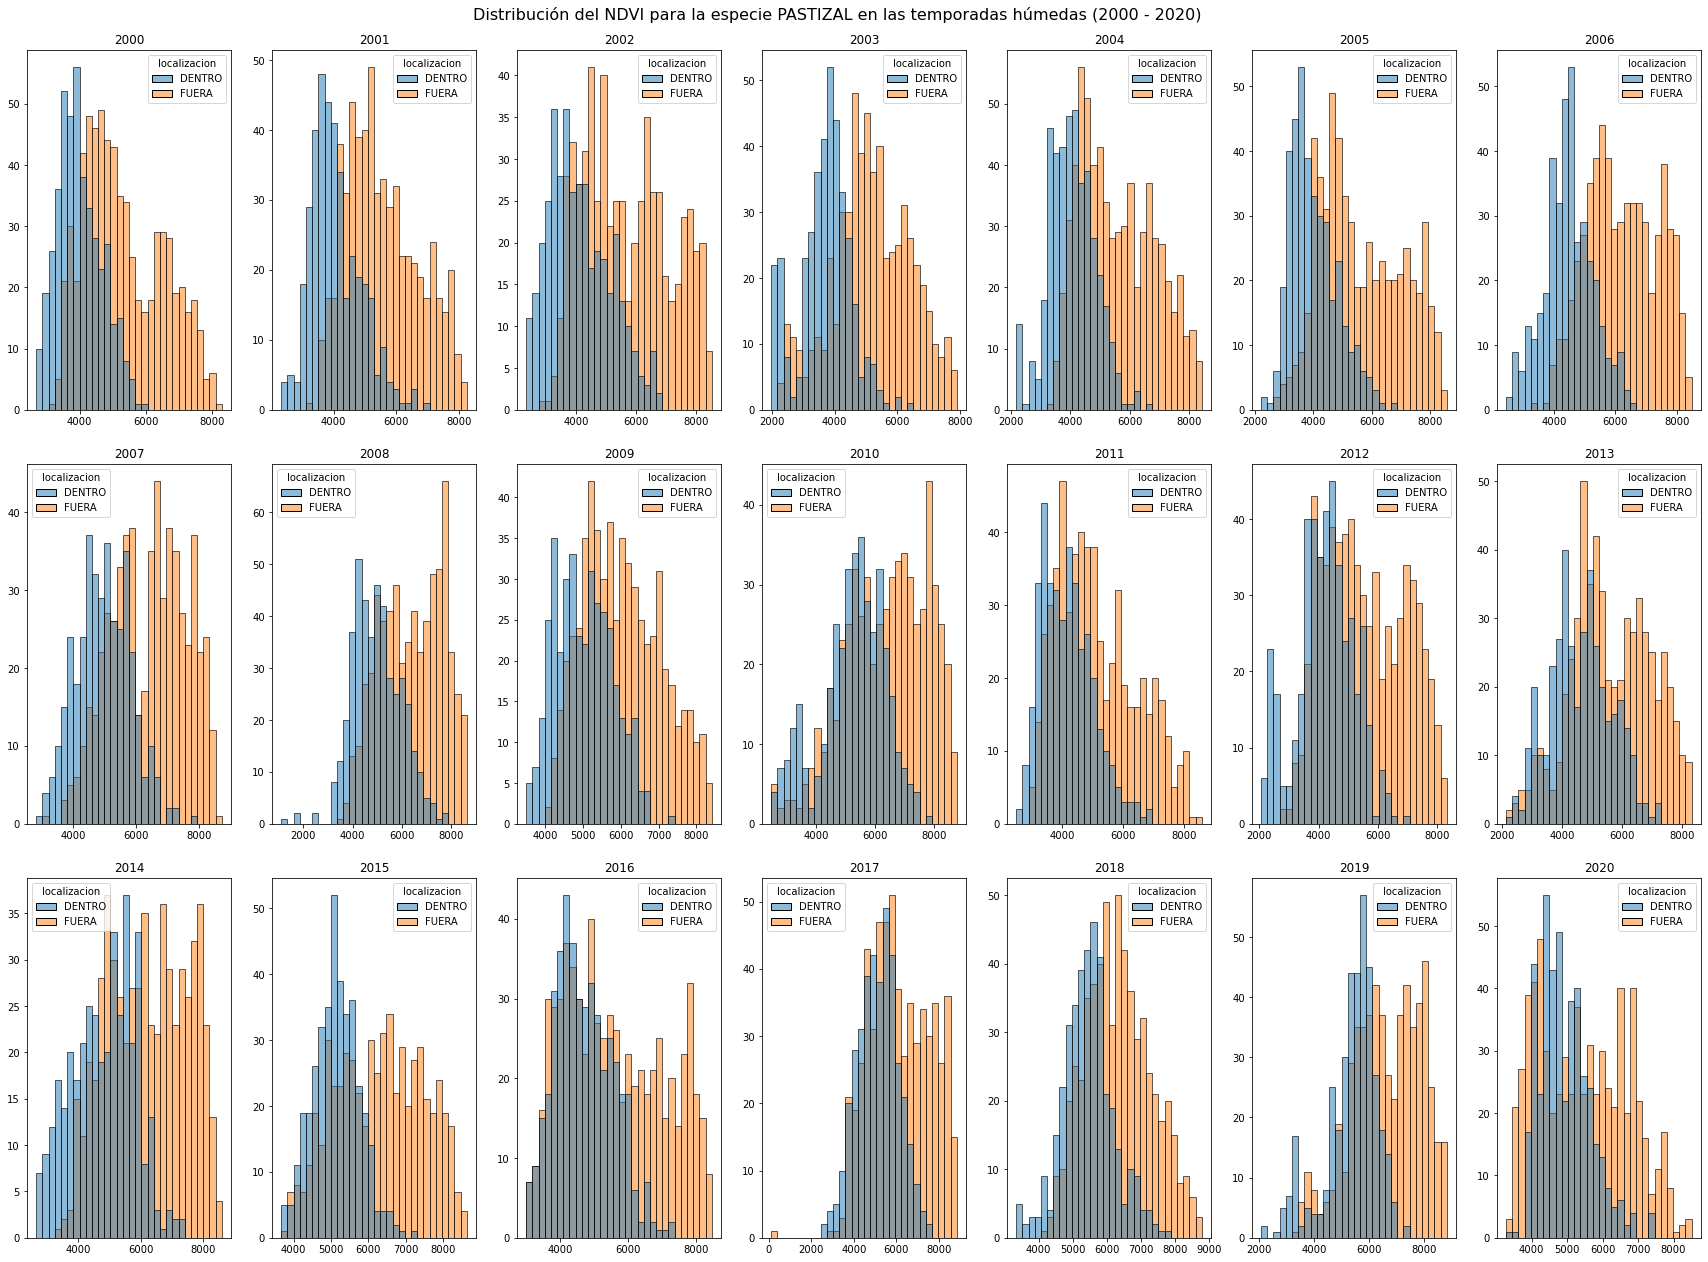

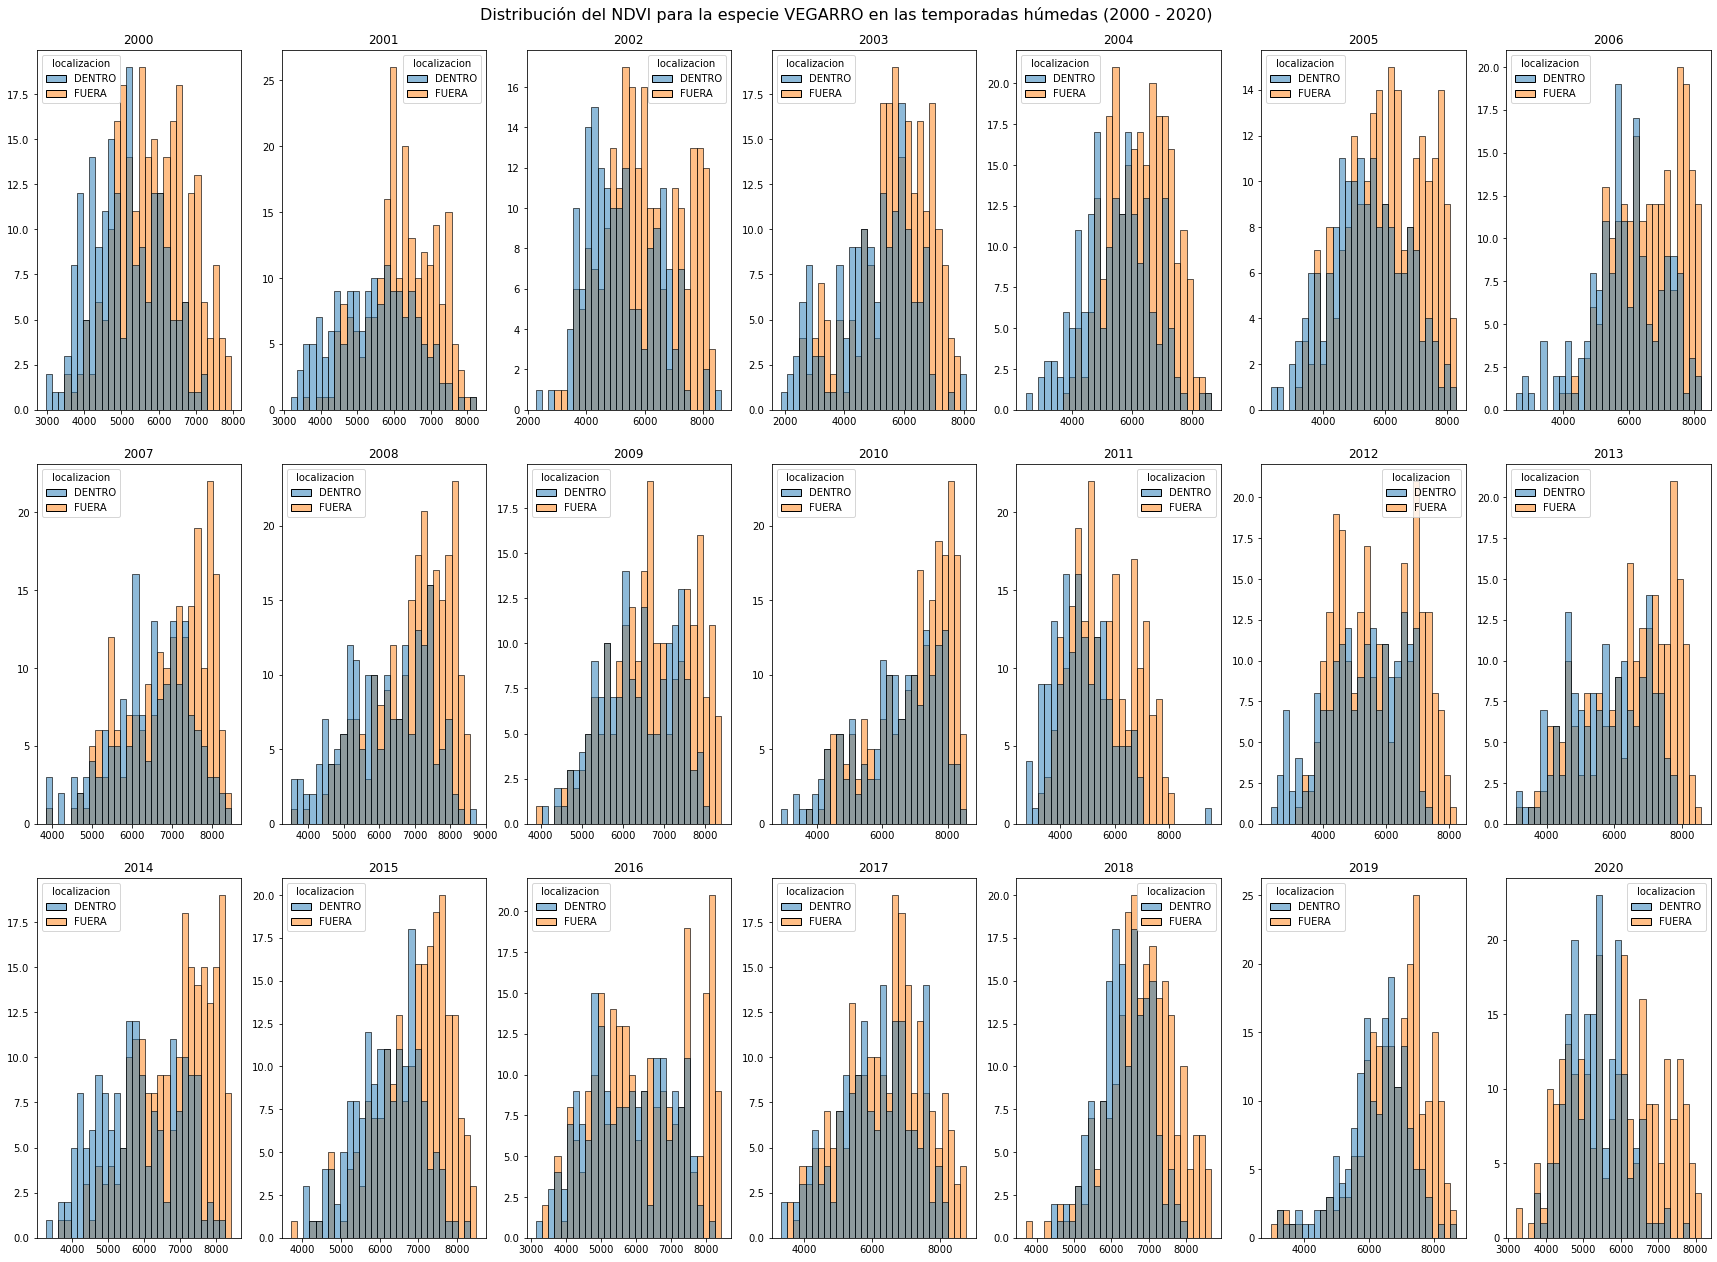

In [36]:
# Por cada especie y año, se va a graficar la distribución del NDVI dentro y
# fuera de la reserva en las temporadas húmedas
for esp in especies:
    # Se crea una figura con 3 renglones y 7 columnas
    fig, axs = plt.subplots(3,7,figsize=(30, 20))
    # Se configura el límite superior de la figura y el espacio horizontal 
    # entre los renglones
    plt.subplots_adjust(top=.95, hspace=.15)
    # Se añade un título
    fig.suptitle(f'Distribución del NDVI para la especie {esp} en las temporadas húmedas (2000 - 2020)', fontsize=16)
    # Contadores para localizar en qué eje se va a graficar cada histograma
    i = 0
    j = 0
    # Se grafican los datos por año
    for anio in range(2000,2021):
        # Se obtienen las lecturas de NDVI en temporada húmeda para la especie
        # y año en cuestión
        datos = temps_hum[(temps_hum.metrica=='NDVI')&(temps_hum.especie==esp)&(temps_hum.fecha.dt.year==anio)]
        # Se grafica un histograma
        sns.histplot(x=datos.valor, hue=datos.localizacion ,ax=axs[i][j], bins=30)
        # Se añade un título al histograma y se ocultan las etiquetas de los
        # ejes
        axs[i][j].set_title(anio)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')
        
        # Como la figura es de 3x7, entonces cambiamos de renglón cada 7
        # histogramas
        j += 1 
        if j == 7:
            j = 0
            i += 1
            
    # Se muestra la gráfica de la especie    
    _ = plt.show()

#### NDVI con diagramas de caja

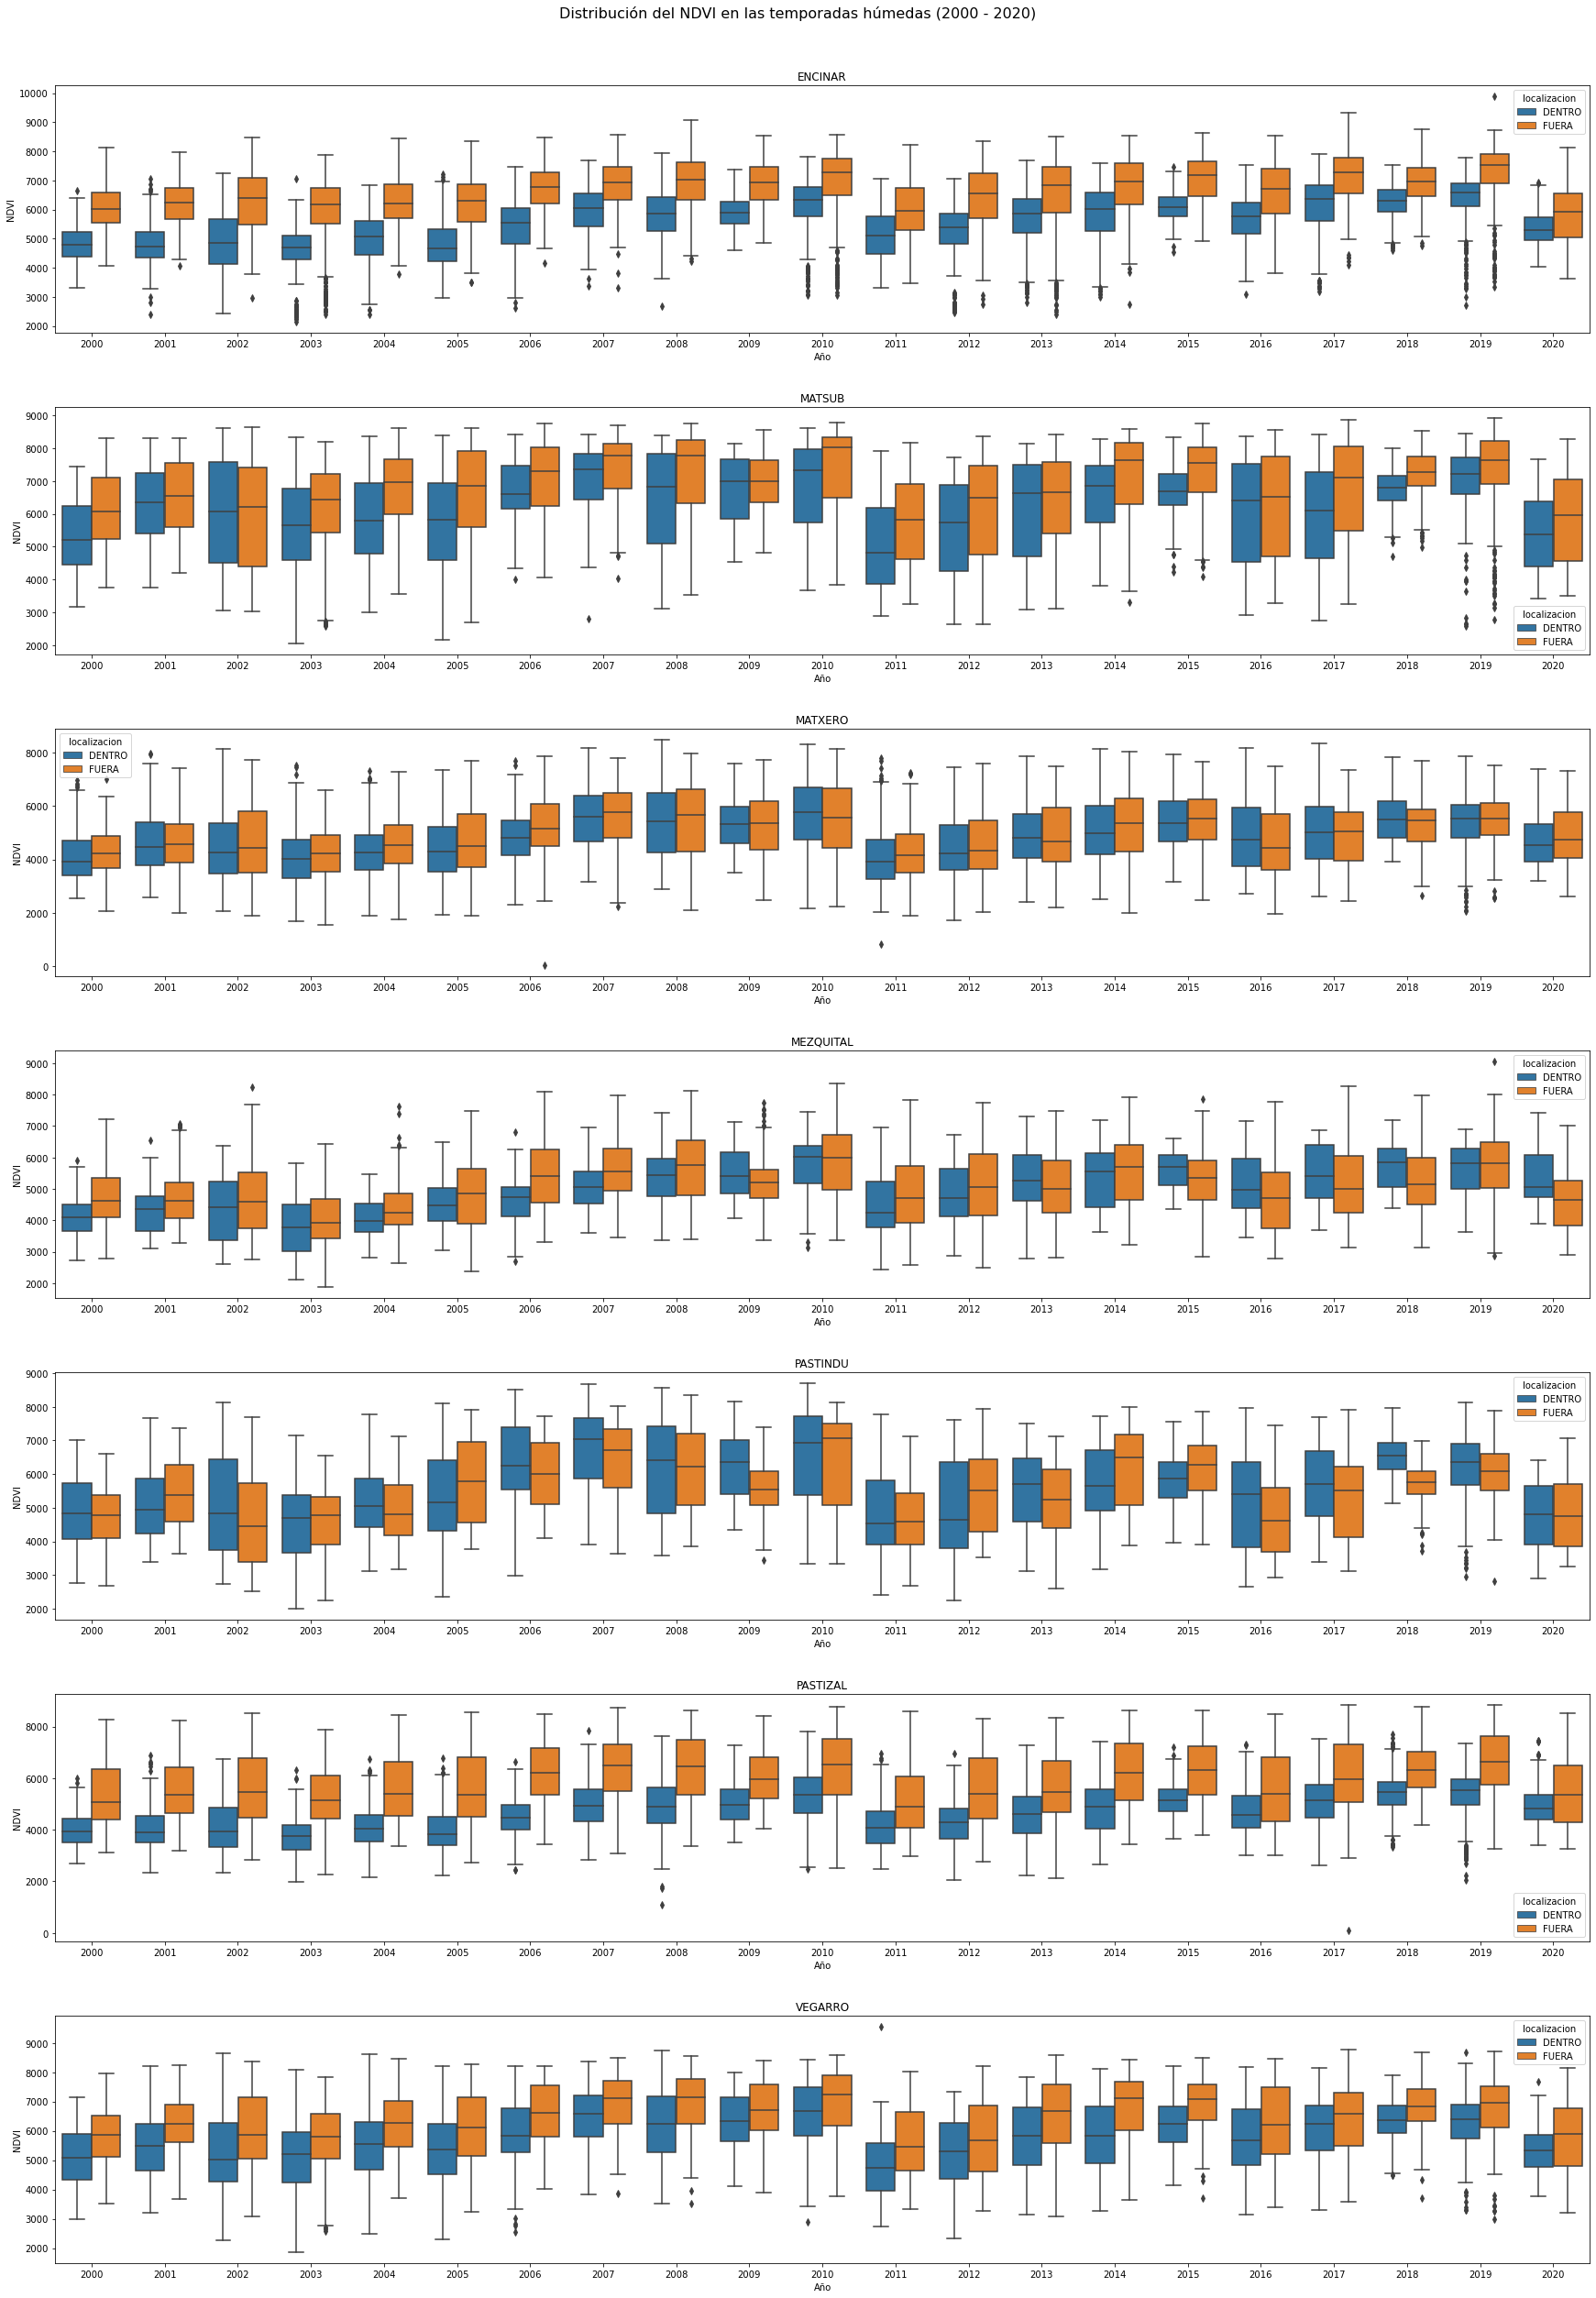

In [37]:
# Se crea una figura con tantos renglones como especies existan y se configura
# el límite superior y el espaciado entre renglones
fig, axs = plt.subplots(n_especies,1,figsize=(30, 40))
plt.subplots_adjust(top=.95, hspace=.3)
# Se añade un título a la figura
fig.suptitle('Distribución del NDVI en las temporadas húmedas (2000 - 2020)', fontsize=16)

# Por cada especie se grafican los diagramas de caja
for i in range(n_especies):
    # Se selecciona la especie
    esp = especies[i]
    # Se selecciona el EVI en temporada húmerda para la especie en cuestión 
    datos = temps_hum[(temps_hum.especie==esp) & (temps_hum.metrica=='NDVI')]
    # Se grafican los diagramas de caja agrupados por localización y por año
    sns.boxplot(x=datos.fecha.dt.year, y=datos.valor, hue=datos.localizacion, ax=axs[i])
    # Se añade el título al axis  y se ocultan las etiquetas de los ejes
    axs[i].set_title(esp)
    axs[i].set_xlabel('Año')
    axs[i].set_ylabel('NDVI')

### Identificación de Outliers

La identificación de otuliers se realizará mediante el Z-Score. Para calcular la media y la desviación estándar se tomarán en cuenta los datos agrupados por especie, año, métrica y localización.

In [38]:
def zscore(datos, n_stds):
    """
        Esta función calcula el Z-score para cada renglón de algún subconjunto
        de los datos de EVI y NDVI utilizados en este análisis
        
        Params
        ------
           - datos <pandas.DataFrame>: Subconjunto del dataframe original
           - n_stds: <int>: Número de desviaciones estándar que se tomarán en
             cuenta para determinar si un valor es un outlier.
             
        Regresa
        -------
           - outliers <list>: Lista con los índices correspondientes a los
             outliers.
           - mean <float>: Media del conjunto de datos.
           - std <float>: Desviación estándar del conjunto de datos
    """
    
    # Lista para almacenar los outliers
    outliers = []
    # Se calcula la media y la desviación estándar
    mean = np.mean(datos.valor)
    std = np.std(datos.valor)
    # Para cada registro se calcula su z-score
    for i in range(len(datos)):
        z_score= (datos.iloc[i,6] - mean)/std 
        # Si el z-score es mayor que el número de desviaciones estándar,
        # entonces se considera como un outlier
        if np.abs(z_score) > n_stds:
            outliers.append(i)
            
    # Se regresan los resultados
    return outliers, mean, std

In [39]:
# Se añade una columna nueva para identificar a los outliers. Por default
# consideraremos todas las lecturas como inliers.
temps_hum['outlier'] = 0

# Se iteran las especies, año, métrica y localización
for esp in especies:
    print(f'---------------------------------------------------------- {esp} ----------------------------------------------------------\n')
    for metrica in ['EVI', 'NDVI']:
        print(f'   *****************************  {metrica} *****************************')
        for localizacion in ['DENTRO', 'FUERA']:
            print(f'   ***************************** {localizacion} *****************************')
            for anio in range(2000,2021):
                # Se toman las lecturas del grupo (especie,año,metrica,localizacion)
                datos = temps_hum[(temps_hum.especie==esp)&(temps_hum.fecha.dt.year==anio)&(temps_hum.metrica==metrica)&(temps_hum.localizacion==localizacion)]
                # Se calcula el z-score con la función anteriormente construida
                outliers,media,std = zscore(datos, 3)
                # En todos los renglones identificados como outliers se pone la
                # bandera '1' en la columna "outlier" para indicar que es un
                # dato atípico
                temps_hum.iloc[outliers, 7] = 1
                
                # Se calcula el total de datos así como también el porcentaje
                # de outliers e inliers
                total = len(datos)
                n_inliers = len(datos) - len(outliers)
                n_outliers = len(outliers)
                perc_inliers = n_inliers*100/total
                perc_outliers = n_outliers*100/total
                
                # Si hay outliers, se imprime la información del grupo.
                if perc_outliers > 0 :
                    print(anio)
                    print(f'Total: {total}')
                    print(f'Inliers: {n_inliers} ({perc_inliers})')
                    print(f'Outliers: {n_outliers} ({perc_outliers})\n')
                

---------------------------------------------------------- ENCINAR ----------------------------------------------------------

   *****************************  EVI *****************************
   ***************************** DENTRO *****************************
2001
Total: 231
Inliers: 229 (99.13419913419914)
Outliers: 2 (0.8658008658008658)

2005
Total: 231
Inliers: 230 (99.56709956709956)
Outliers: 1 (0.4329004329004329)

2009
Total: 231
Inliers: 230 (99.56709956709956)
Outliers: 1 (0.4329004329004329)

2019
Total: 231
Inliers: 229 (99.13419913419914)
Outliers: 2 (0.8658008658008658)

   ***************************** FUERA *****************************
2005
Total: 420
Inliers: 419 (99.76190476190476)
Outliers: 1 (0.23809523809523808)

2007
Total: 420
Inliers: 419 (99.76190476190476)
Outliers: 1 (0.23809523809523808)

2018
Total: 420
Inliers: 417 (99.28571428571429)
Outliers: 3 (0.7142857142857143)

   *****************************  NDVI *****************************
   ***********

### Series de tiempo

#### EVI general

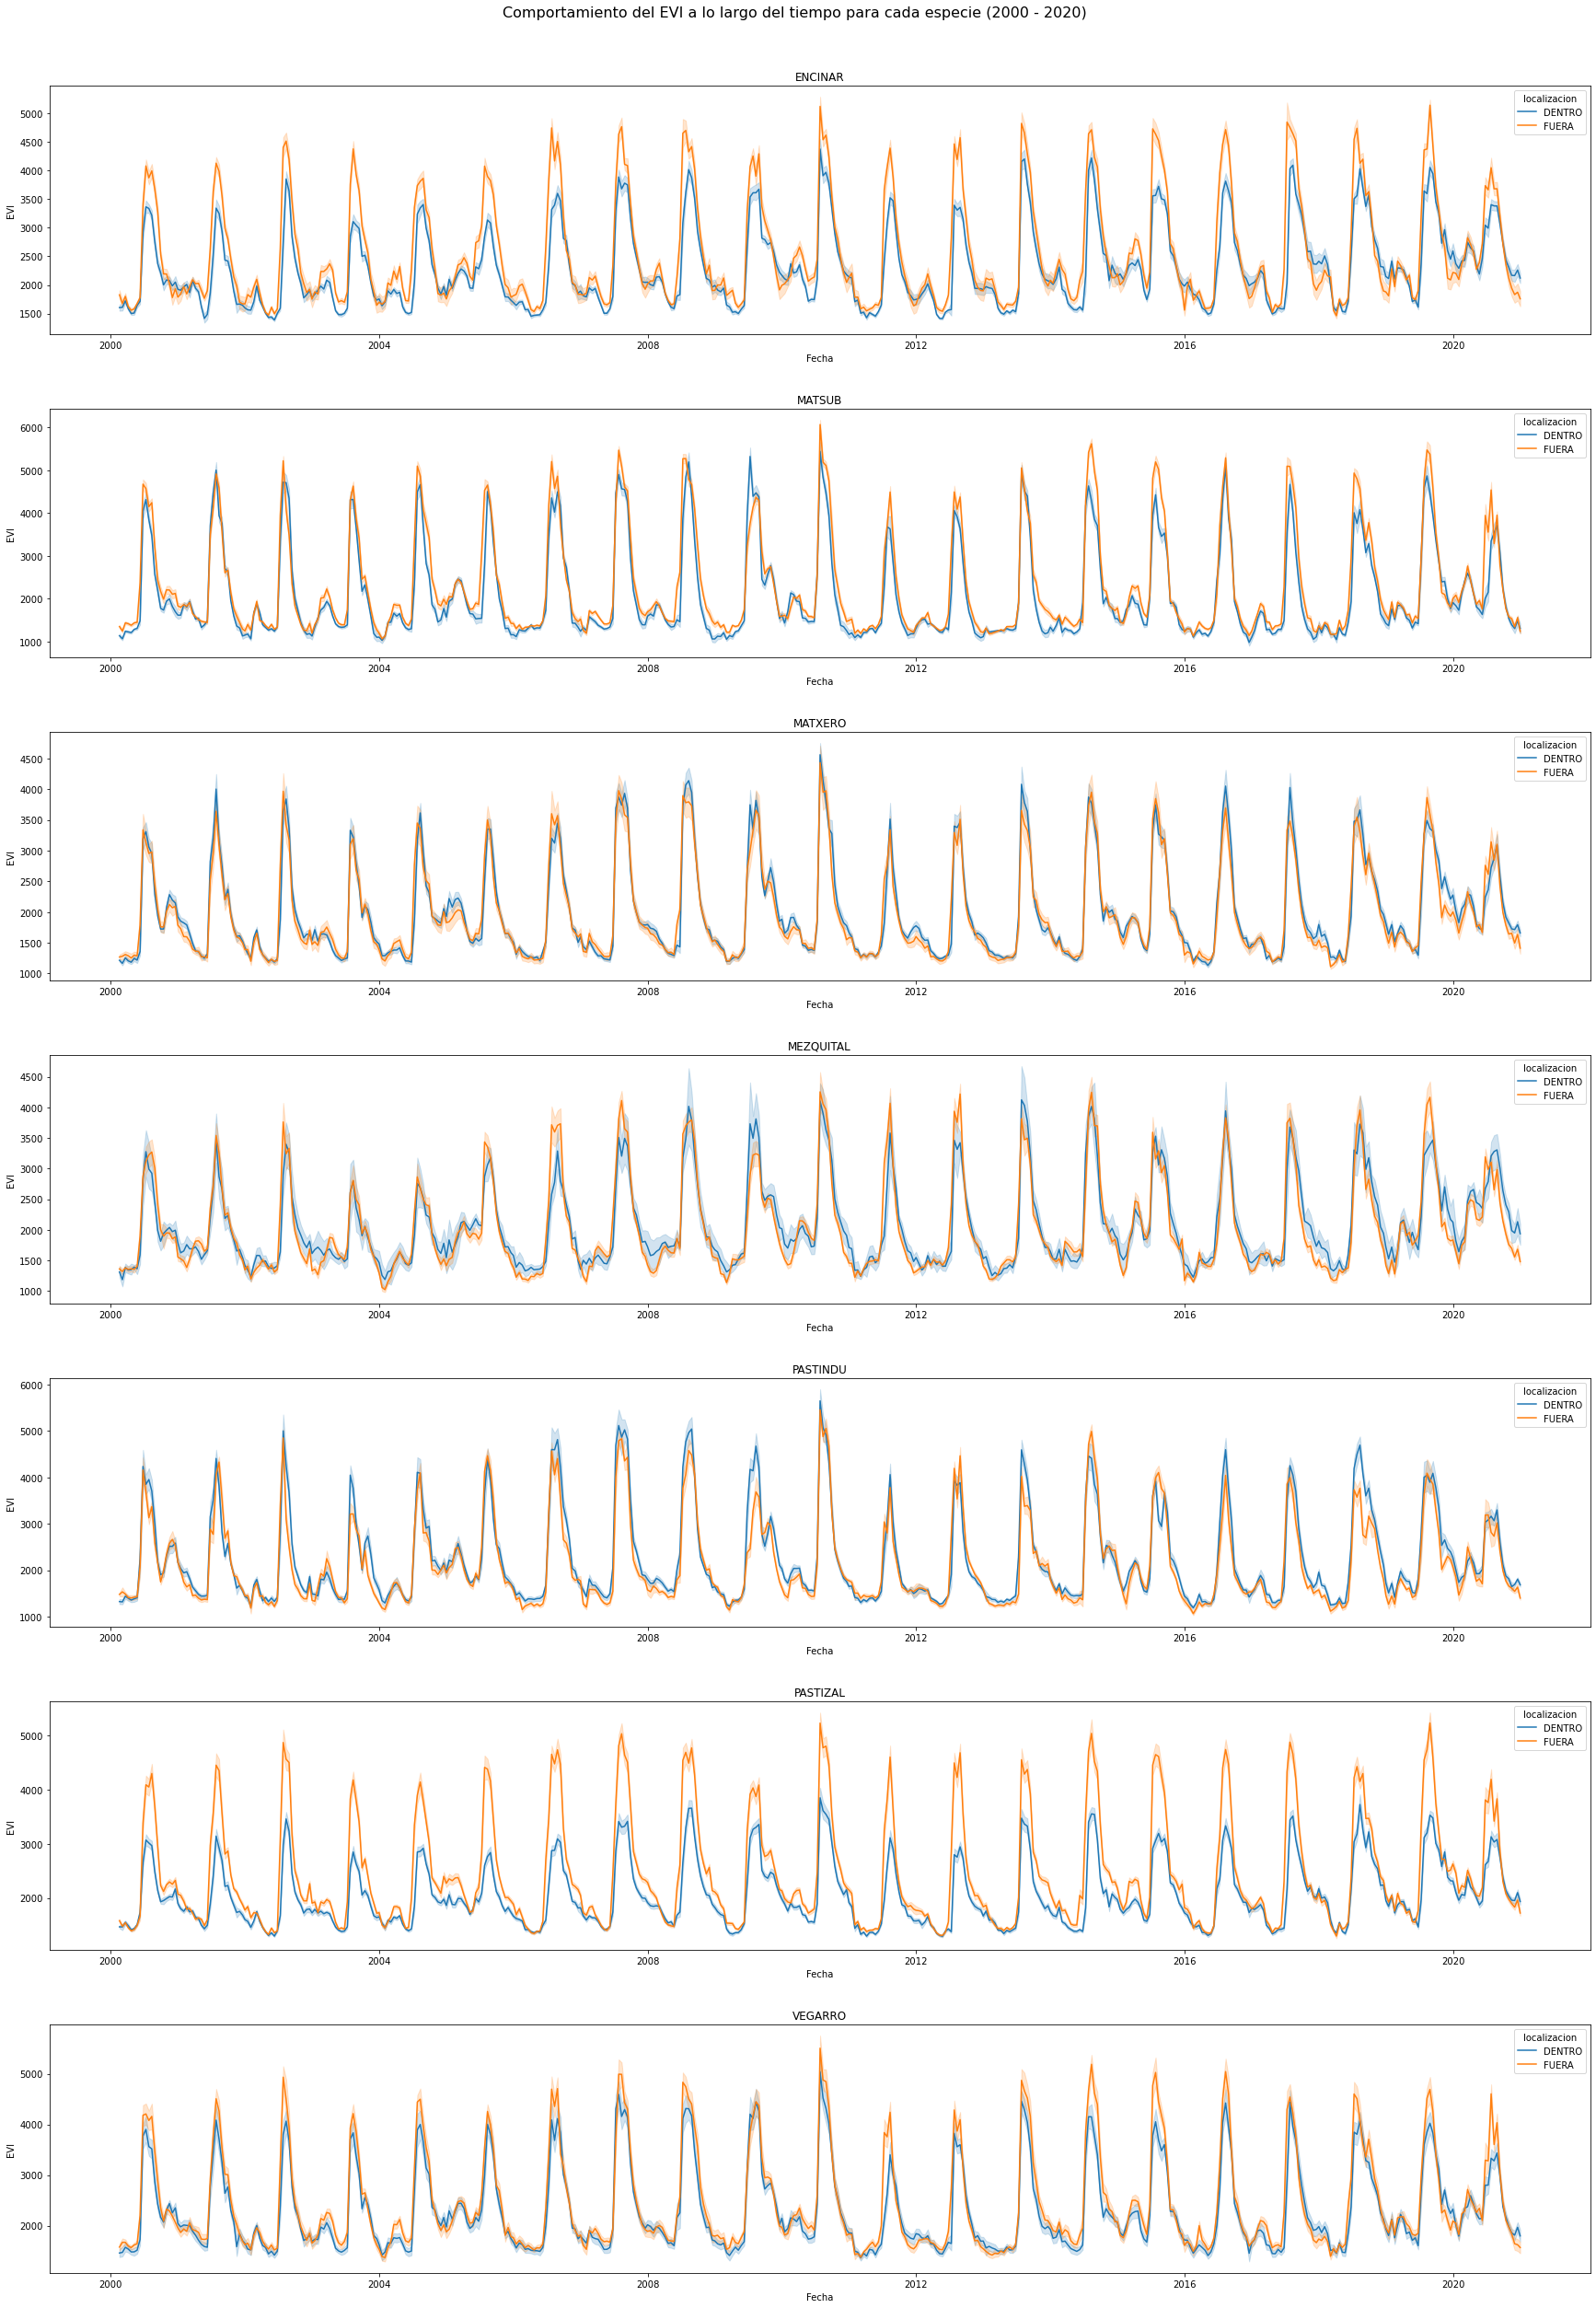

In [40]:
# Se crea una figura con tantos renglones como especies existan y se configura
# el límite superior y el espaciado entre renglones
fig, axs = plt.subplots(n_especies,1,figsize=(30, 40))
plt.subplots_adjust(top=.95, hspace=.3)
# Se añade un título a la figura
fig.suptitle('Comportamiento del EVI a lo largo del tiempo para cada especie (2000 - 2020)', fontsize=16)

# Se graficará cada especie en un renglón diferente
for i in range(n_especies):
    # Se toma la especie en cuestión
    esp = especies[i]
    # Se toman todas las lecturas de EVI de la especie en cuestión
    datos = df[(df.especie==esp) & (df.metrica=='EVI') ]
    # Se grafica la serie de tiempo promediando los valores de EVI
    sns.lineplot(x="fecha", y="valor",
             hue="localizacion", 
             data=datos,ax=axs[i])
    
    # Se le pone un título al renglón y sus correspondientes etiquetas en los ejes x e y
    axs[i].set_title(esp)
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('EVI')

#### EVI en temporadas húmedas

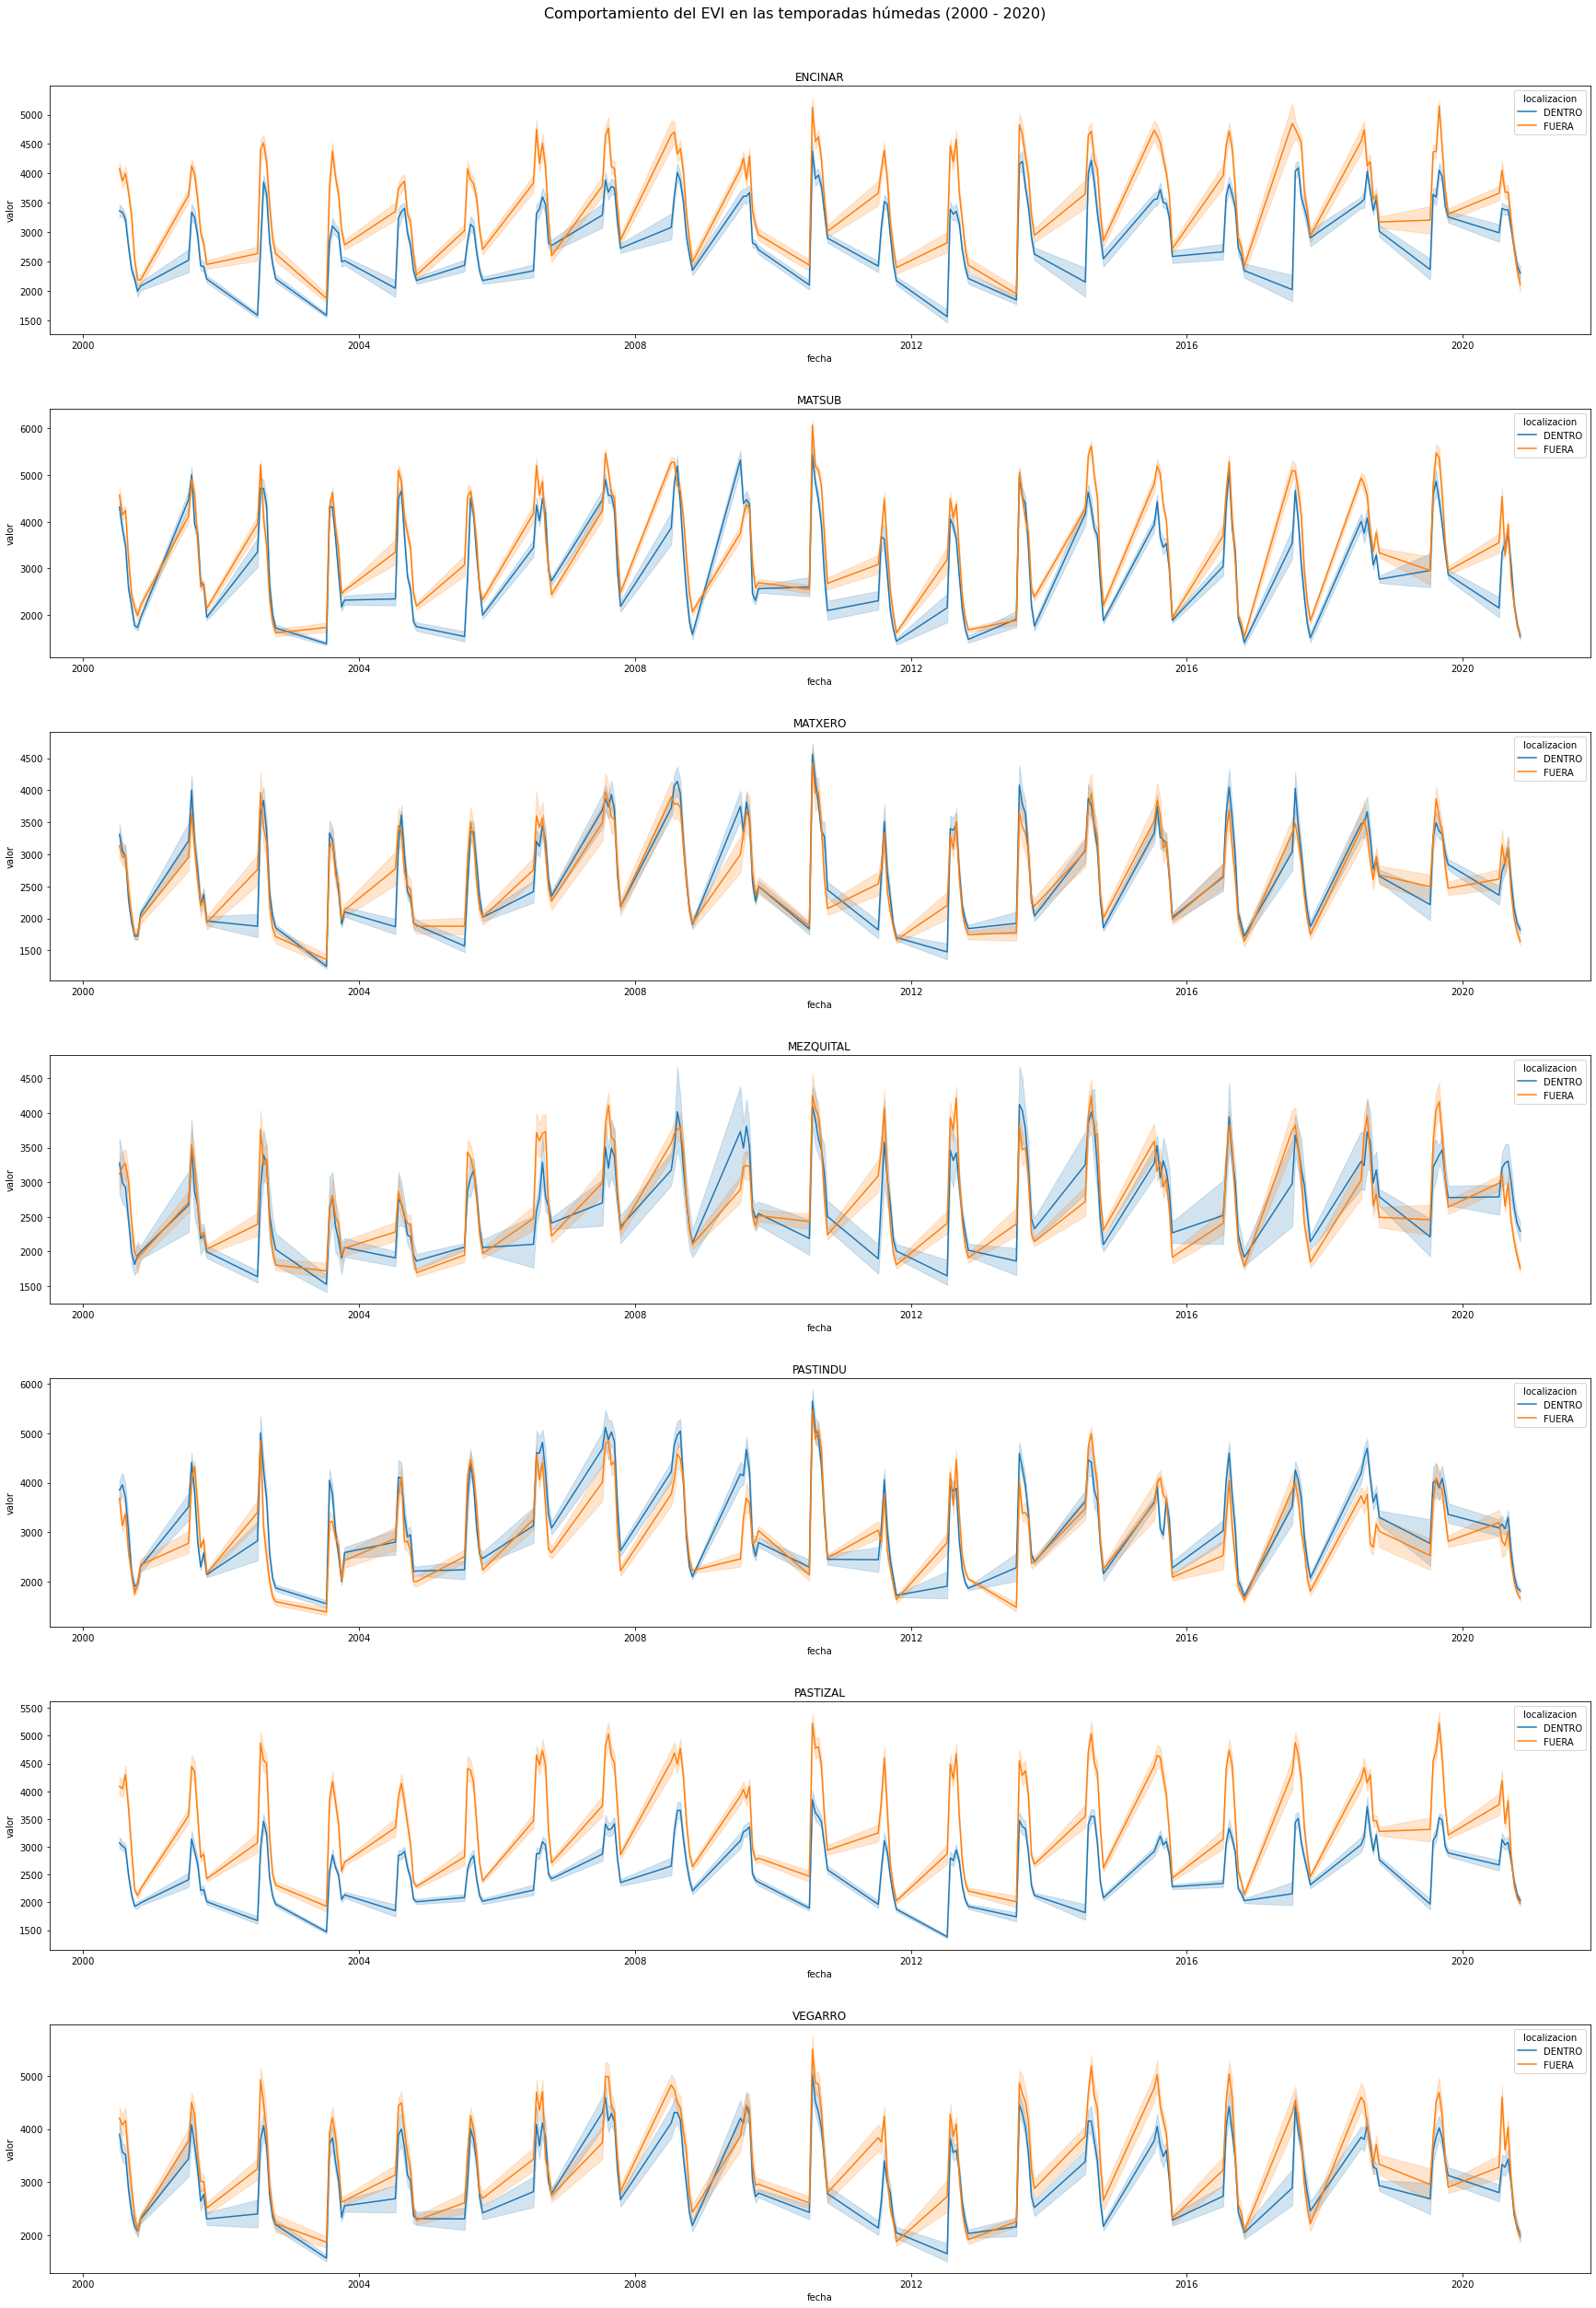

In [41]:
# Se crea una figura con tantos renglones como especies existan y se configura
# el límite superior y el espaciado entre renglones
fig, axs = plt.subplots(n_especies,1,figsize=(30, 40))
plt.subplots_adjust(top=.95, hspace=.3)
# Se añade un título a la figura
fig.suptitle('Comportamiento del EVI en las temporadas húmedas (2000 - 2020)', fontsize=16)

# Se graficará cada especie en un renglón diferente
for i in range(n_especies):
    # Se toma la especie en cuestión
    esp = especies[i]
    # Se toman todas las lecturas de EVI de la especie en cuestión en temporadas húmedas
    datos = temps_hum[(temps_hum.especie==esp) & (temps_hum.metrica=='EVI')]
    # Se grafica la serie de tiempo promediando los valores de EVI
    sns.lineplot(x=datos.fecha, y=datos.valor, hue=datos.localizacion, ax=axs[i])
    # Se le pone un título al renglón
    axs[i].set_title(esp)

#### NDVI general

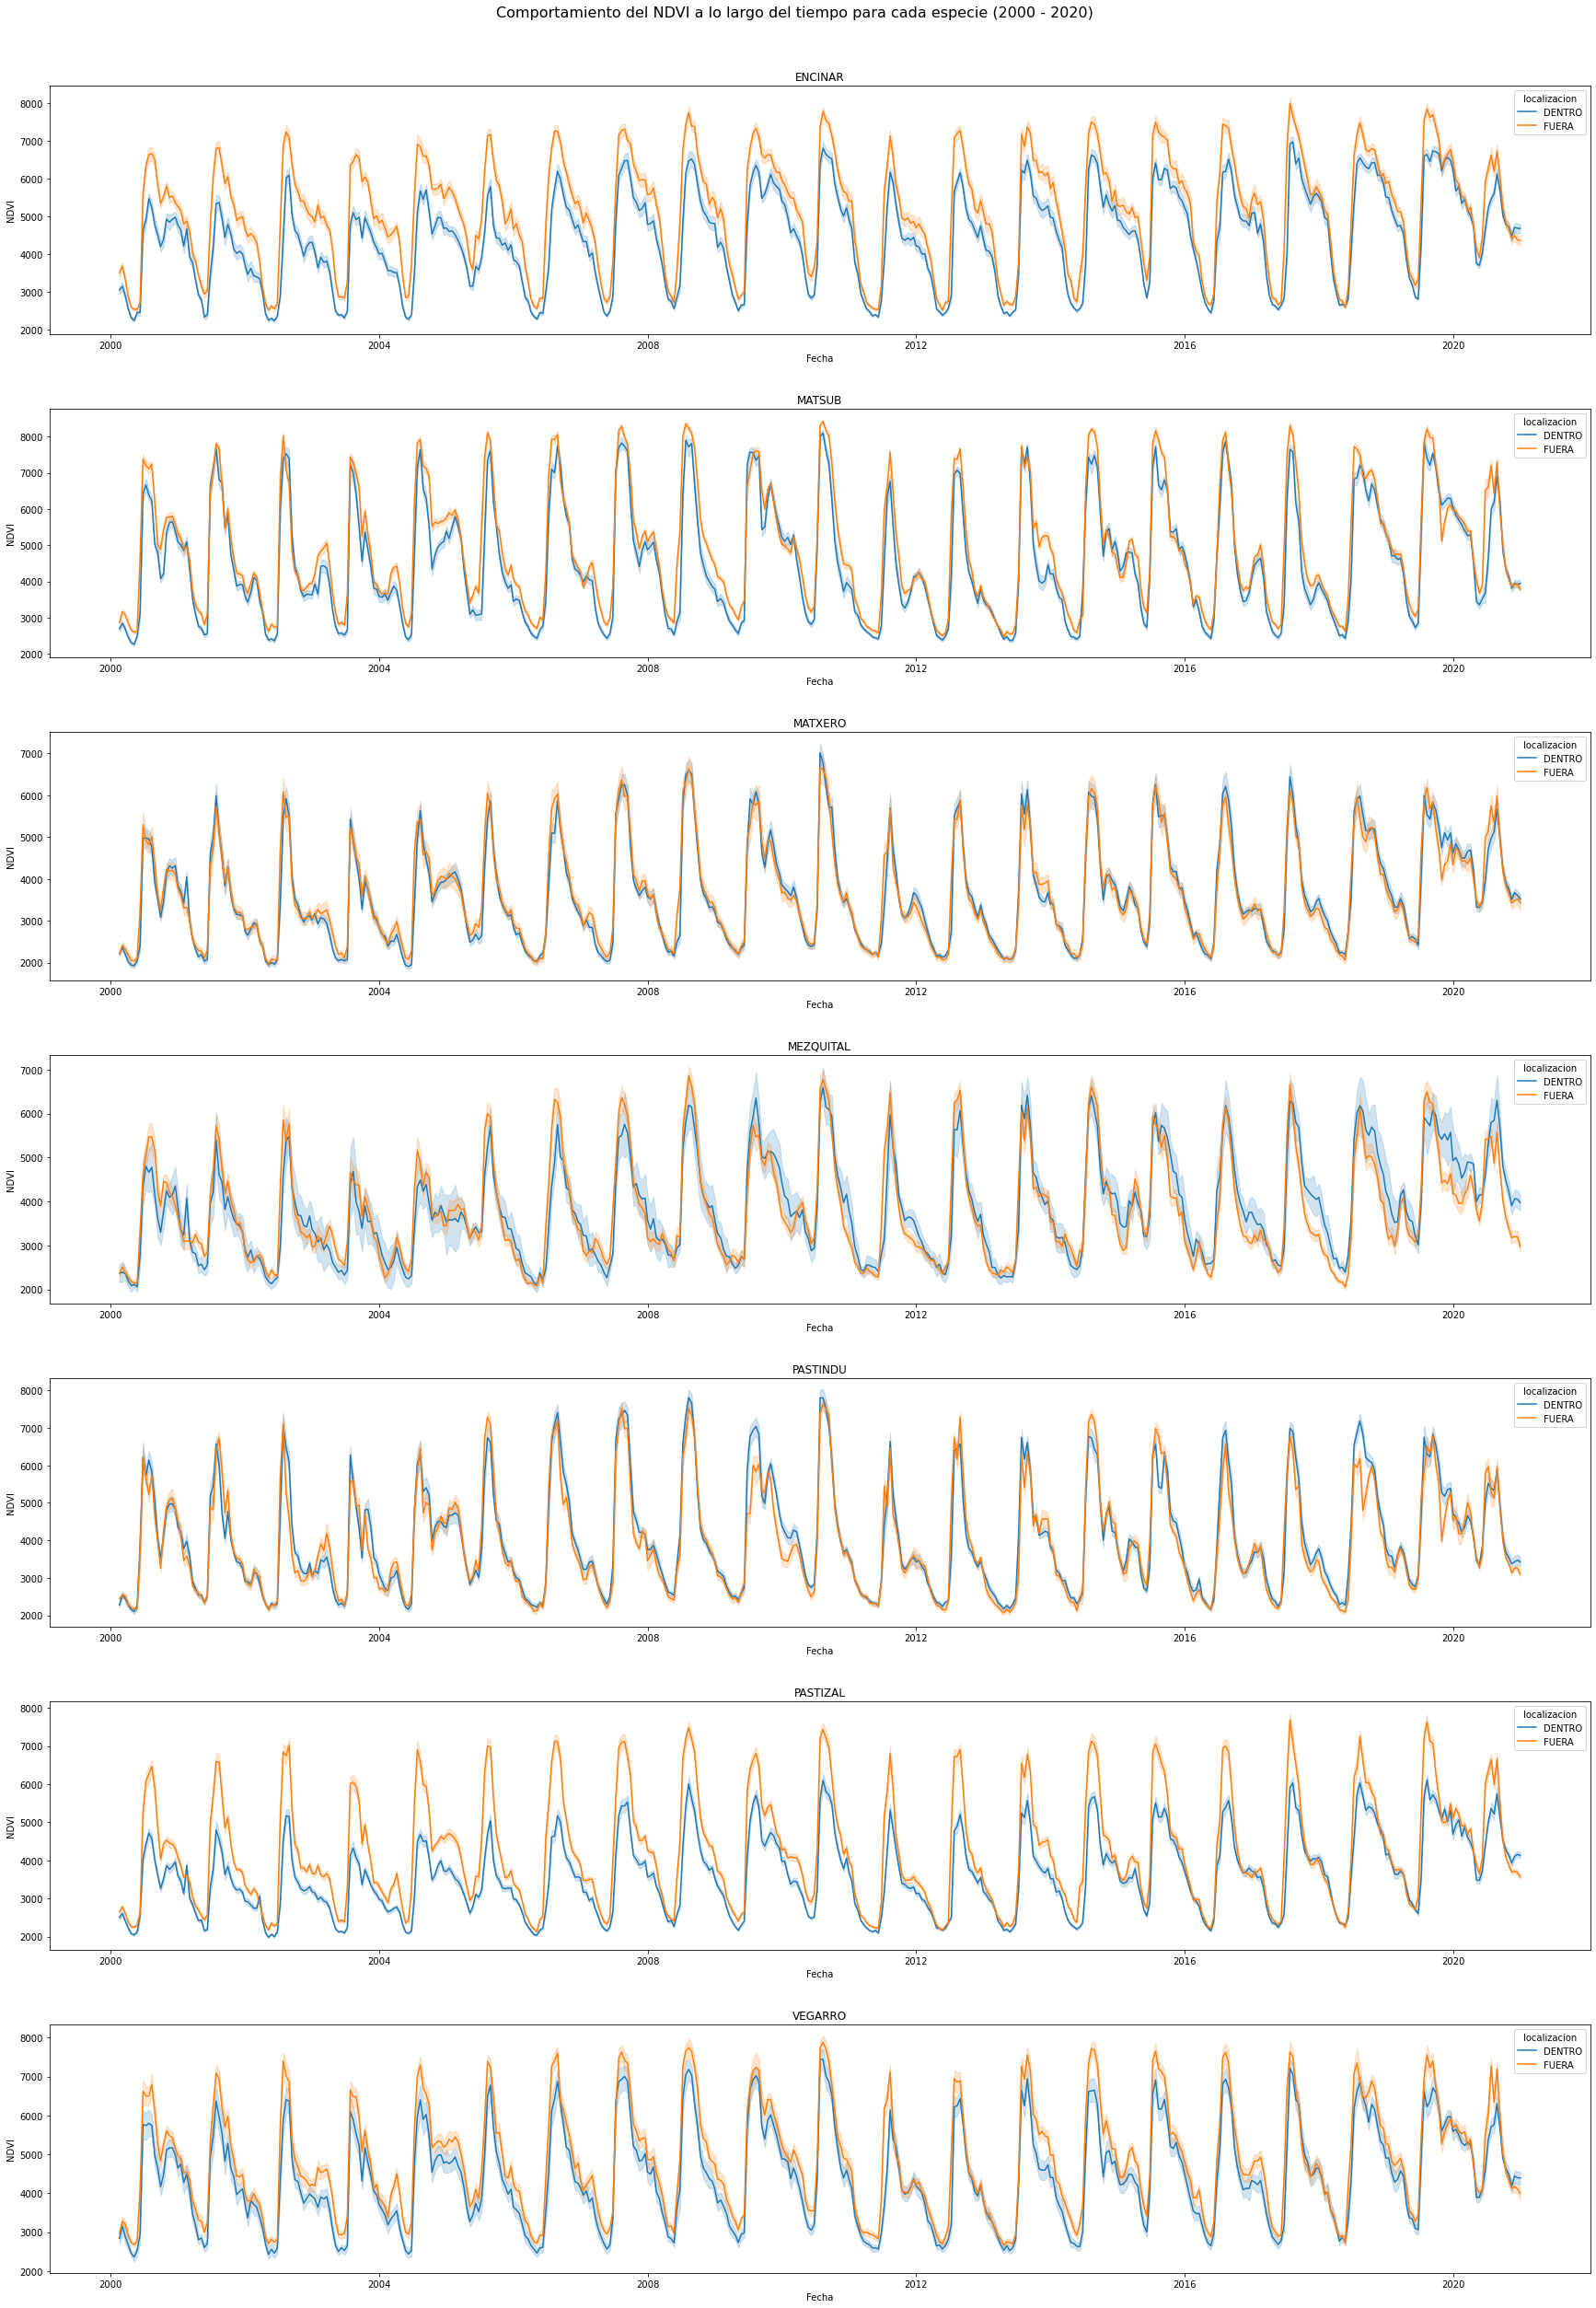

In [42]:
# Se crea una figura con tantos renglones como especies existan y se configura
# el límite superior y el espaciado entre renglones
fig, axs = plt.subplots(n_especies,1,figsize=(30, 40))
plt.subplots_adjust(top=.95, hspace=.3)
# Se añade un título a la figura
fig.suptitle('Comportamiento del NDVI a lo largo del tiempo para cada especie (2000 - 2020)', fontsize=16)

# Se graficará cada especie en un renglón diferente
for i in range(n_especies):
    # Se toma la especie en cuestión
    esp = especies[i]
    # Se toman todas las lecturas de NDVI de la especie en cuestión
    datos = df[(df.especie==esp) & (df.metrica=='NDVI')]
    # Se grafica la serie de tiempo promediando los valores de EVI
    sns.lineplot(x="fecha", y="valor",
             hue="localizacion", 
             data=datos,ax=axs[i])
    
    # Se le pone un título al renglón y sus correspondientes etiquetas en los ejes x e y
    axs[i].set_title(esp)
    axs[i].set_xlabel('Fecha')
    axs[i].set_ylabel('NDVI')

#### NDVI en temporadas húmedas

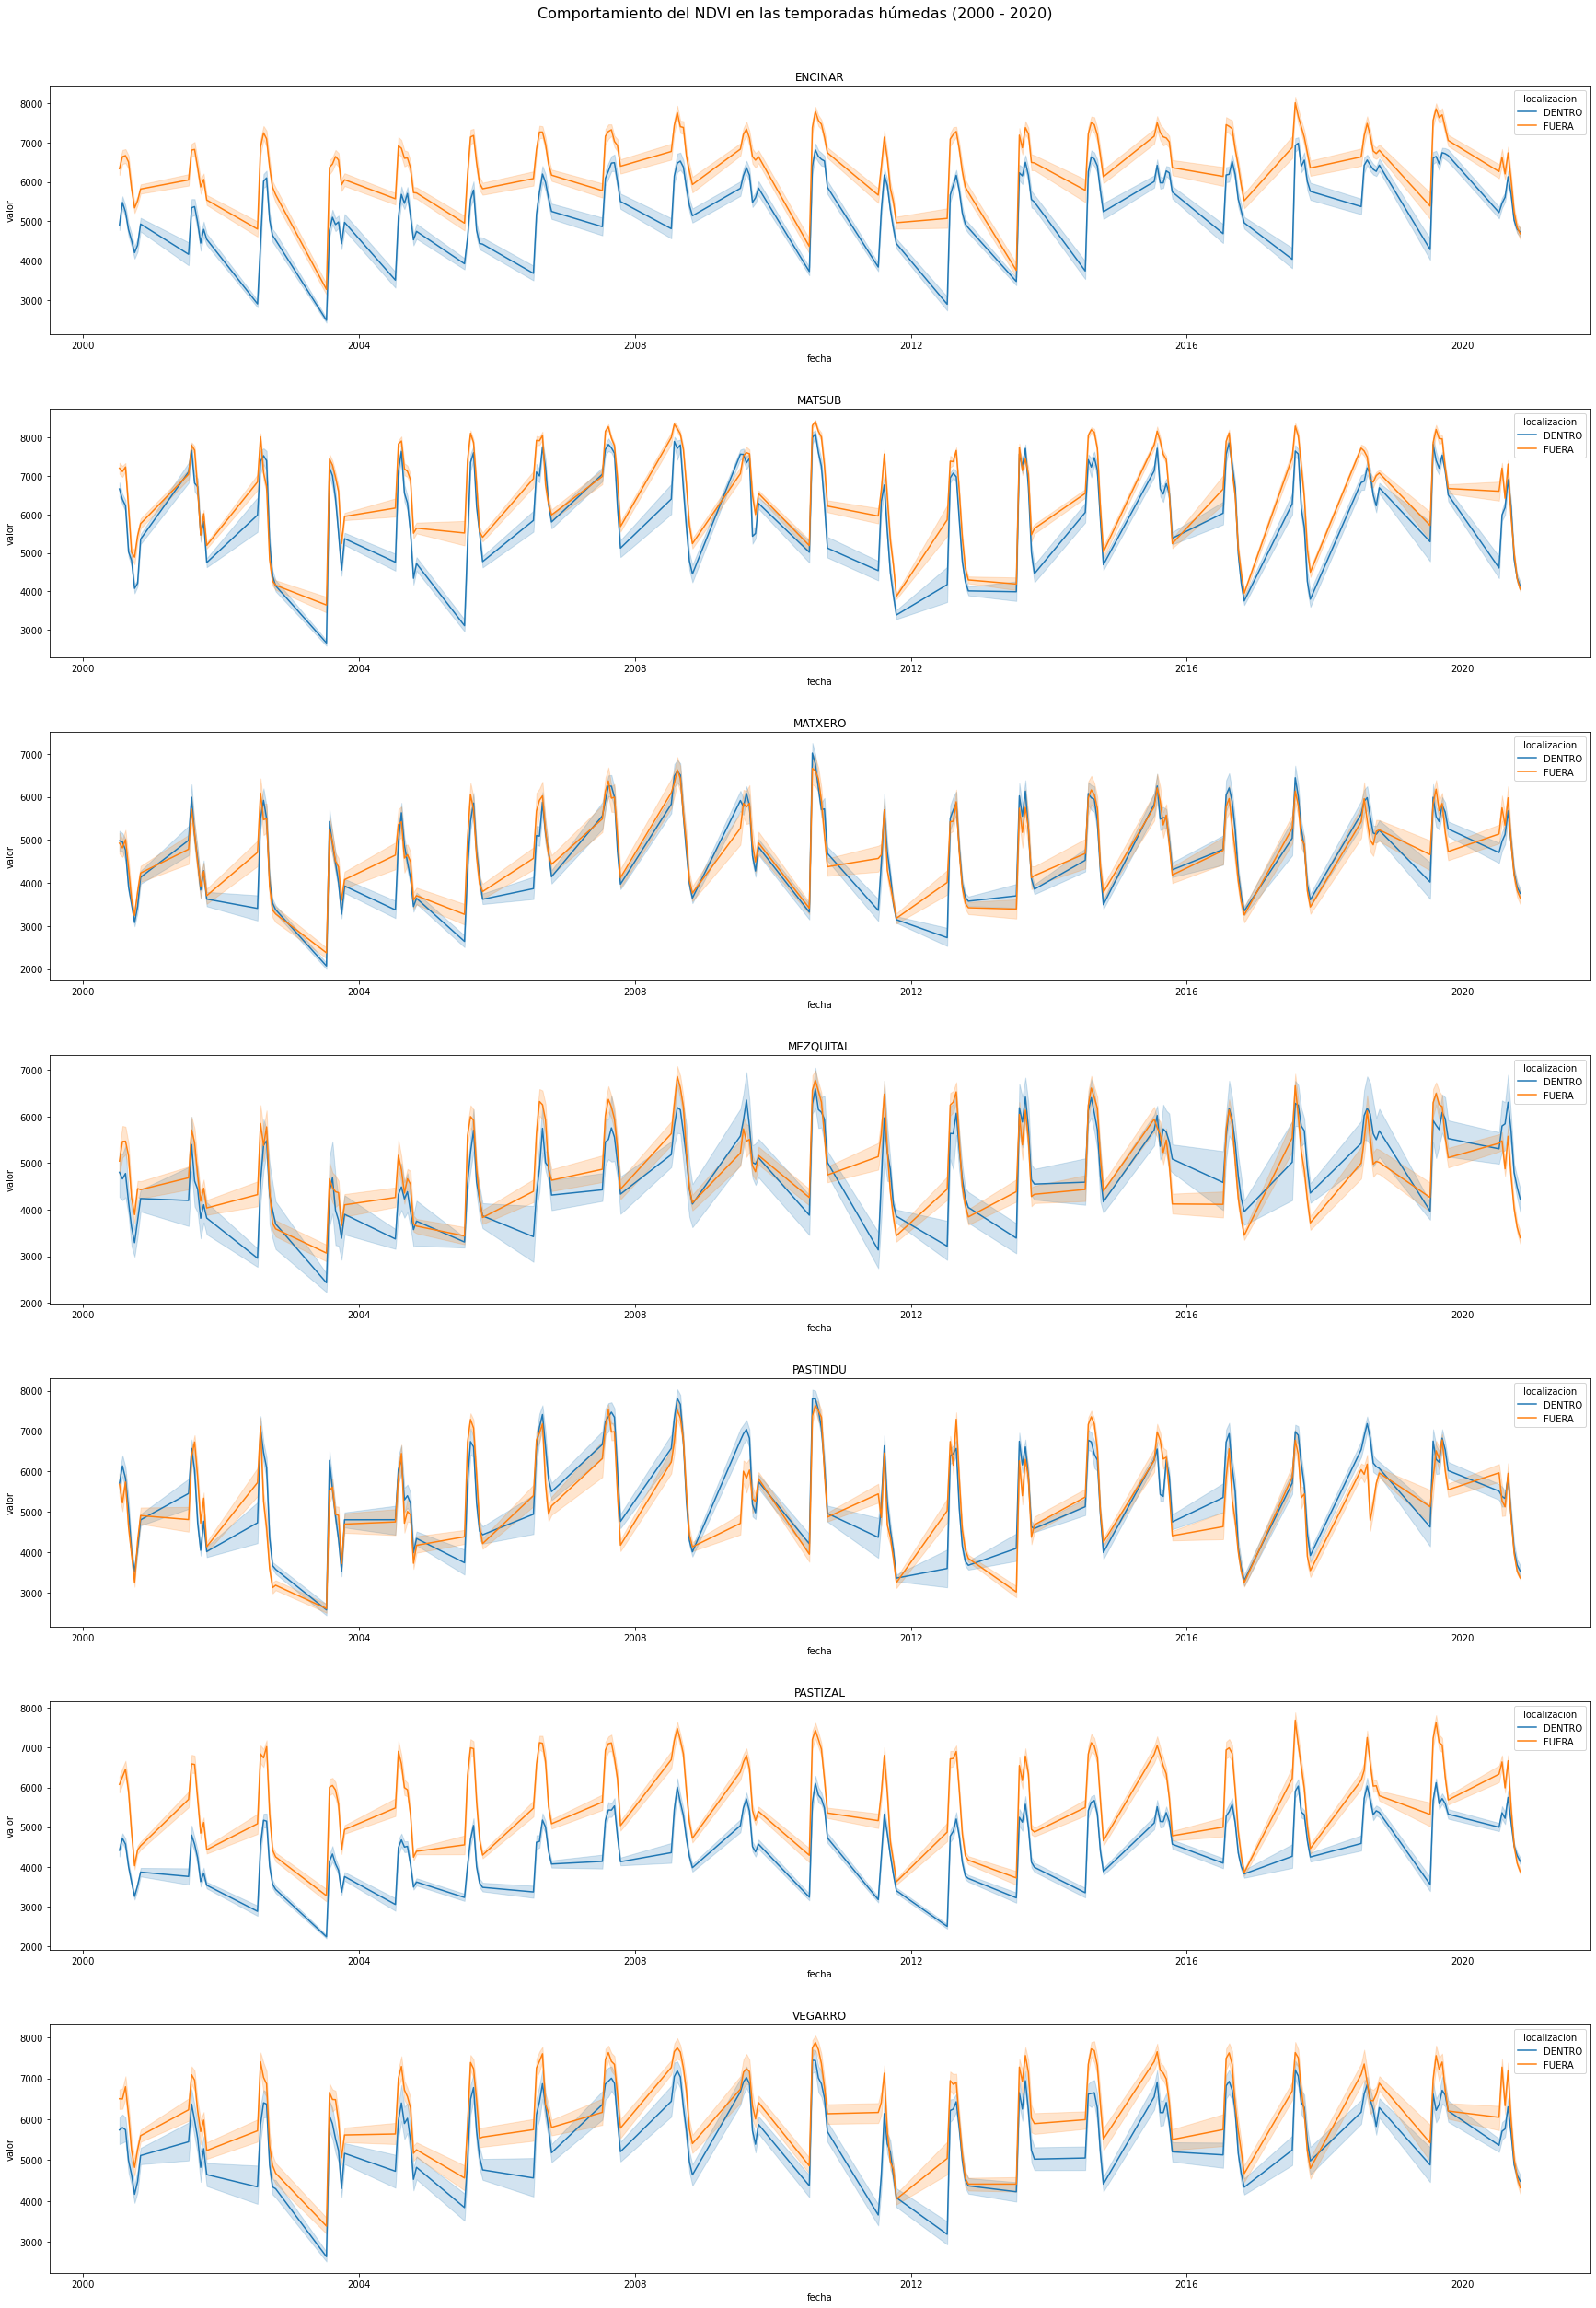

In [43]:
# Se crea una figura con tantos renglones como especies existan y se configura
# el límite superior y el espaciado entre renglones
fig, axs = plt.subplots(n_especies,1,figsize=(30, 40))
plt.subplots_adjust(top=.95, hspace=.3)
# Se añade un título a la figura
fig.suptitle('Comportamiento del NDVI en las temporadas húmedas (2000 - 2020)', fontsize=16)

# Se graficará cada especie en un renglón diferente
for i in range(n_especies):
    # Se toma la especie en cuestión
    esp = especies[i]
    # Se toman todas las lecturas de NDVI de la especie en cuestión en temporadas húmedas
    datos = temps_hum[(temps_hum.especie==esp) & (temps_hum.metrica=='NDVI')]
    # Se grafica la serie de tiempo promediando los valores de NDVI
    sns.lineplot(x=datos.fecha, y=datos.valor, hue=datos.localizacion, ax=axs[i])
    # Se le pone un título al renglón
    axs[i].set_title(esp)

## Preguntas

* ¿Existen rangos de EVI/NDVI "normales" para cada especie? Nos podría ser de ayuda para identificar outliers.
* ¿El porcentaje de outliers identificados es despreciable?
* ¿El promedio es representativo al momento de comparar las series de tiempo?
* ¿Existen regiones (pixeles) específicos en donde las condiciones sean lo suficientemente diferentes como para estudiarlas por separado? Tal vez un algoritmo de aprendizaje no supervisado podría ayudarnos a identificar estas regiones especiales.

In [44]:
df.to_csv('EVI_NDVI.zip', index=False,
          compression=dict(method='zip',archive_name='EVI_NDVI.csv'))